**QUESTION-1 Use the taxi trip dataset to find clusters of locations that might belong to a particular cluster having similar kinds of trip features. Use DBSCAN algo for this. Show the locations belonging to each cluster over a map. Perform the analysis of trips belonging to the same clusters and point out the distinguishing features and insights. Also, divide a day in 1-hour slot and show a time of day based analysis of each cluster**

**TAKING ONLY FIRST 1 LAKH DATA FROM THE PARQUET FILE AND SAVING IT.**

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Loading  the parquet file
p_path = r'/content/drive/MyDrive/yellow_tripdata_2023-01.parquet'
p_df = pd.read_parquet(p_path, engine='pyarrow')

# Extracting the first one lakh  rows from the paraquet file.
subset_parquet = p_df.head(100000)

# Save the subset of parequet of 1 lakh rows to a new file to perform further operation
subset_parquet = p_df.head(100000)
subset_parquet_path = r'/content/drive/MyDrive/yellow_tripdata_subset.parquet'
subset_parquet.to_parquet(subset_parquet_path, engine='pyarrow', index=False)

# Reading the subset file in  a DataFrame
subset_parquet_df_read = pd.read_parquet(subset_parquet_path, engine='auto')

# Displaying the subset paraquet file.
print(subset_parquet_df_read.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


**SELECTING UNIQUE LOCATIONS FROM THE DATA**

In [19]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Extracting  relevant columns for clustering from dataframe.
features_of_trip = subset_parquet_df_read[['PULocationID', 'DOLocationID']]

# Droping  rows having missing values.
trip_features = features_of_trip.dropna()
print(len(features_of_trip))

# Extracting  unique locations for taxitrip .
unique_trip_locations = set(features_of_trip['PULocationID']) | set(features_of_trip['DOLocationID'])

# Converting the unique location to a DataFrame with numerical features
location_df = pd.DataFrame(list(unique_trip_locations), columns=['ULocationID'])
#print(location_df)

# Assigning columns to the unique_locations into the subset parquet file.
subset_parquet_df_read['ULocationID'] = location_df

subset_parquet_df_read.head()



100000


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         14.30                   2.5         0.00   
1                    1.0         16.90                   2.5         0.00   
2                    1.0         34.90                   2.5         0.00   
3                    1.0         20.85                   0.0         1.25   
4                    1.0         19.68                   2.5         0.00   

   ULocationID  
0          1.0  
1          2.0  
2          3.0  
3          4.0  
4          5.0

**CALCULATION TIME DURATION OF EACH TRIP**

In [20]:
import pandas as pd

# Converting pickup and dropoff datetime columns of the dataframe to datetime data type
subset_parquet_df_read['tpep_pickup_datetime'] = pd.to_datetime(subset_parquet_df_read['tpep_pickup_datetime'])
subset_parquet_df_read['tpep_dropoff_datetime'] = pd.to_datetime(subset_parquet_df_read['tpep_dropoff_datetime'])

# Calculating the duration of each trip in minutes and assigning trip_duration_minutes into the subset paraquet dataframe.
subset_parquet_df_read['trip_duration_minutes'] = (subset_parquet_df_read['tpep_dropoff_datetime'] - subset_parquet_df_read['tpep_pickup_datetime']).dt.total_seconds() / 60

# Displaying the result of trip_duration_minutes
#print(subset_parquet_df_read[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration_minutes']])

subset_parquet_df_read.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...   1.00      0.5        0.00           0.0   
1             1  ...   1.00      0.5        4.00           0.0   
2             1  ...   1.00      0.5       15.00           0.0   
3             1  ...   7.25      0.5        0.00           0.0   
4             1  ...   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         14.30                   2.5         0.00   
1                    1.0         16.90                   2.5         0.00   
2                    1.0         34.90                   2.5         0.00   
3                    1.0         20.85                   0.0         1.25   
4                    1.0         19.68                   2.5         0.00   

   ULocationID  trip_duration_minutes  
0          1.0               8.433333  
1          2.0               6.316667  
2          3.0              12.750000  
3          4.0               9.616667  
4          5.0              10.833333  

[5 rows x 21 columns]

**EXTRACTING RELEVANT FEATURES TO PERFORM DBSCAN CLUSTERING**

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

# Extracting  relevant columns for making  clusters
features_trip1 = subset_parquet_df_read[['trip_distance', 'fare_amount', 'trip_duration_minutes']]

# Droping any rows having missing values
trip_features1 = features_trip1.dropna()

# Standardizing  the choosen features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trip_features1_scaled= scaler.fit_transform(trip_features1)

# Applying DBSCAN clustering with scaled features.
dbscan = DBSCAN(eps=0.005, min_samples=235, metric='euclidean')
clusters = dbscan.fit_predict(trip_features1_scaled)


**ASSIGN ULOCATIONID'S (ZONES) TO THE CLUSTERS FORMED.**

In [22]:
import pandas as pd
import numpy as np

# Assigning zones(unique_locationIDs) to the clusters formed by DBSCAN.
subset_parquet_df_read['Cluster'] = clusters
print(subset_parquet_df_read.groupby('Cluster')['ULocationID'].unique())



Cluster
-1     [8.0, 9.0, 10.0, 12.0, 13.0, 14.0, 15.0, 17.0,...
 0                  [1.0, 21.0, 90.0, 217.0, 262.0, nan]
 1     [2.0, 30.0, 40.0, 58.0, 77.0, 85.0, 94.0, 163....
 2                                      [3.0, 74.0, nan]
 3     [4.0, 7.0, 63.0, 79.0, 147.0, 151.0, 195.0, 21...
 4     [5.0, 11.0, 24.0, 76.0, 88.0, 96.0, 102.0, 148...
 5                       [6.0, 113.0, 150.0, 260.0, nan]
 6     [16.0, 47.0, 165.0, 184.0, 205.0, 244.0, 255.0...
 7     [19.0, 23.0, 86.0, 106.0, 108.0, 118.0, 119.0,...
 8           [29.0, 36.0, 50.0, 78.0, 140.0, 188.0, nan]
 9     [41.0, 73.0, 101.0, 128.0, 135.0, 136.0, 141.0...
 10    [44.0, 46.0, 130.0, 137.0, 146.0, 162.0, 261.0...
 11    [28.0, 45.0, 56.0, 64.0, 156.0, 181.0, 192.0, ...
 12    [59.0, 95.0, 187.0, 194.0, 222.0, 231.0, 232.0...
 13    [69.0, 81.0, 114.0, 115.0, 126.0, 149.0, 166.0...
 14                     [72.0, 161.0, 167.0, 207.0, nan]
 15                    [120.0, 170.0, 198.0, 253.0, nan]
 16                    

**IMPORTING SHAPEFILE TO SHOW LOCATIONS BELONGING TO EACH CLUSTERS ON MAP**

In [23]:
import pandas as pd
import geopandas as gpd
import numpy as np
from random import randint
import matplotlib.pyplot as plt

# Loading the shapefile of taxizones.
path_of_shapefile = "/content/drive/MyDrive/taxi_zones/taxi_zones.shp"
map_of_india = gpd.read_file(path_of_shapefile)

**MAPPING CITIES TO CLUSTERS FORMED**

In [24]:
# Merging the cluster labels with the map data based on the unique location IDs.
clusters_of_merged_data = map_of_india.merge(subset_parquet_df_read[['ULocationID', 'Cluster']], left_on='LocationID', right_on='ULocationID')

# Obtaining the unique location IDs(with the city-name) in each cluster
city_mapping = clusters_of_merged_data .groupby('Cluster')['zone'].unique()

# Print the cluster mapping
print(city_mapping)


Cluster
-1     [Astoria Park, Auburndale, Baisley Park, Batte...
 0     [Newark Airport, Bensonhurst East, Flatiron, S...
 1     [Jamaica Bay, Broad Channel, Carroll Gardens, ...
 2          [Allerton/Pelham Gardens, East Harlem North]
 3     [Alphabet City, Astoria, Cypress Hills, East V...
 4     [Arden Heights, Bath Beach, Bloomingdale, East...
 5     [Arrochar/Fort Wadsworth, Greenwich Village No...
 6     [Bayside, Claremont/Bathgate, Midwood, Pelham ...
 7     [Bellerose, Bloomfield/Emerson Hill, Far Rocka...
 8     [Brighton Beach, Bushwick North, Clinton West,...
 9     [Central Harlem, East Flushing, Glen Oaks, Inw...
 10    [Charleston/Tottenville, City Island, Jamaica,...
 11    [Briarwood/Jamaica Hills, Chinatown, Corona, D...
 12    [Crotona Park, Forest Hills, Port Richmond, Ra...
 13    [East Concourse/Concourse Village, Eastchester...
 14    [East Flatbush/Remsen Village, Midtown Center,...
 15    [Highbridge Park, Murray Hill, Ridgewood, Will...
 16                    

**COUNT OF LOCATION OF EACH CLUSTERS**

In [25]:
# Printing the number of  the unique ULocationIDs in each cluster
cluster_counts = subset_parquet_df_read.groupby('Cluster')['ULocationID'].nunique()
print("Number of clusters:", len(cluster_counts))
print(cluster_counts)


Number of clusters: 19
Cluster
-1     123
 0       5
 1      15
 2       2
 3       8
 4      11
 5       4
 6       7
 7      15
 8       6
 9      12
 10      7
 11      8
 12      8
 13     14
 14      4
 15      4
 16      1
 17      3
Name: ULocationID, dtype: int64


 **PART-1 SHOWING THE LOCATIONS BELONGING TO EACH CLUSTER OVER A MAP**

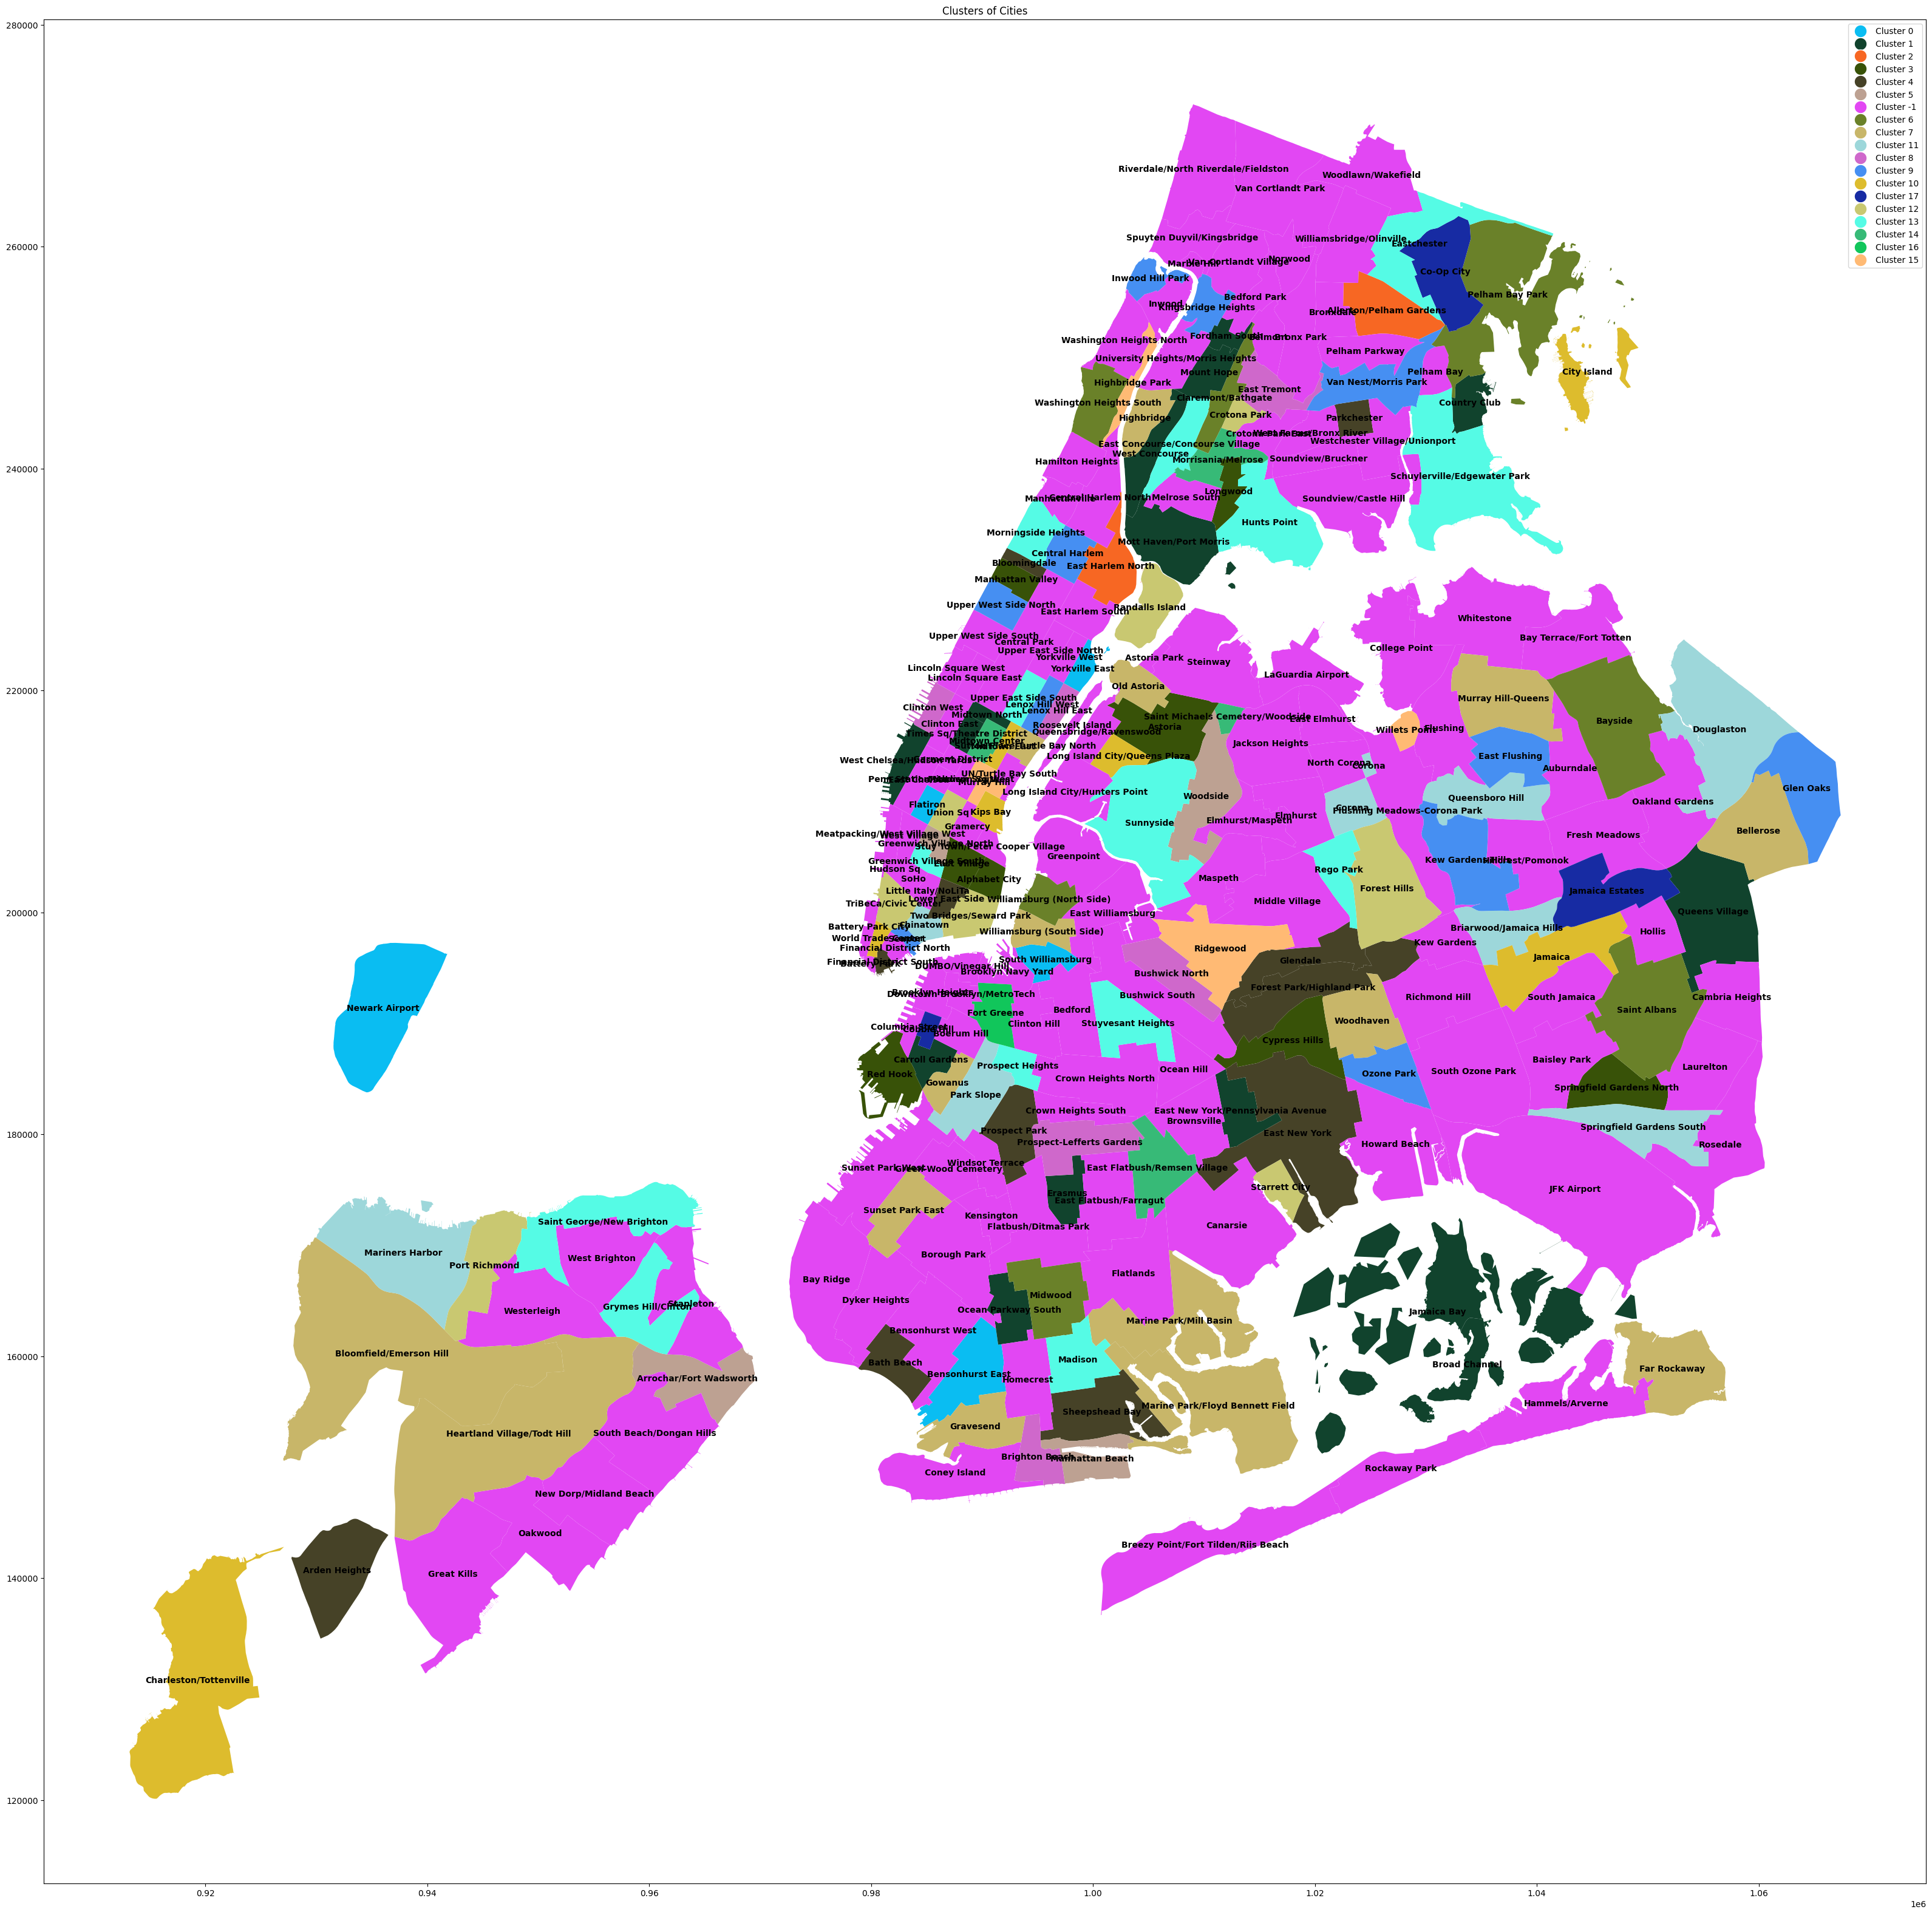

In [26]:
# Assign colors to the clusters formed by DBSCAN.
unique_clusters = clusters_of_merged_data['Cluster'].unique()
cluster_colors = {cluster: (randint(0, 255)/255, randint(0, 255)/255, randint(0, 255)/255) for cluster in unique_clusters}

# Plotting the map
fig, ax = plt.subplots(figsize=(40, 40))
for cluster, color in cluster_colors.items():
    clusters_of_merged_data[clusters_of_merged_data['Cluster'] == cluster].plot(ax=ax, color=color, label=f'Cluster {cluster}')

# Adding city names on the map
for x, y, label in zip(clusters_of_merged_data.geometry.centroid.x, clusters_of_merged_data.geometry.centroid.y, clusters_of_merged_data['zone']):
    ax.text(x, y, label, fontsize=10, ha='center',fontweight='bold', va='center')

# Adding legend to show color labels of clusters.
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=15, label=f'Cluster {cluster}') for cluster, color in cluster_colors.items()]
ax.legend(handles=handles, loc='upper right')

# Setting name of plot title
plt.title('Clusters of Cities')

# Displaying the plot on map
plt.show()


**PART-2
 Perform the analysis of trips belonging to the same clusters and point out the distinguishing features and insights.**

***ANALYSIS OF TRIPS BELONGING TO THE SAME CLUSTERS ***

**TRIP ANALYSIS OF EACH CLUSTERS USING LOCATIONID'S**

#  THE DISTINGUISHING FEATURES ---#




**RANGE OF FREQUENCIES OF FEATURES- PASSENGER_COUNT','TRIP_DISTANCE', 'FARE_AMOUNT', 'TRIP_DURATION_MINUTES FOR EACH CLUSTERS**

In [27]:
import pandas as pd

# Define the clusters
clusters = {
  -1: [8.0, 9.0, 10.0, 12.0, 13.0, 14.0, 15.0, 17.0, 18.0, 20.0, 22.0, 25.0, 26.0, 27.0, 31.0, 32.0, 33.0, 34.0, 35.0, 37.0, 38.0, 39.0, 42.0, 43.0, 48.0, 49.0, 53.0, 54.0, 55.0, 57.0, 60.0, 61.0, 62.0, 65.0, 66.0, 67.0, 68.0, 70.0, 71.0, 75.0, 80.0, 82.0, 83.0, 87.0, 89.0, 91.0, 92.0, 93.0, 98.0, 100.0, 107.0, 109.0, 111.0, 112.0, 116.0, 117.0, 121.0, 122.0, 123.0, 124.0, 125.0, 127.0, 129.0, 132.0, 133.0, 134.0, 138.0, 139.0, 142.0, 143.0, 144.0, 145.0, 152.0, 153.0, 157.0, 158.0, 159.0, 160.0, 164.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 183.0, 185.0, 186.0, 193.0, 197.0, 200.0, 201.0, 202.0, 203.0, 211.0, 212.0, 213.0, 214.0, 215.0, 216.0, 220.0, 221.0, 223.0, 224.0, 228.0, 233.0, 235.0, 236.0, 239.0, 240.0, 241.0, 243.0, 245.0, 248.0, 249.0, 250.0, 251.0, 252.0, 254.0, 257.0, 259.0, 263.0, 264.0],
 0: [1.0, 262.0, 21.0, 217.0, 90.0],
1: [2.0, 163.0, 230.0, 40.0, 168.0, 169.0, 77.0, 178.0, 85.0, 246.0, 247.0, 94.0, 58.0, 30.0, 191.0],
 2: [74.0, 3.0],
 3: [195.0, 4.0, 7.0, 79.0, 147.0, 151.0, 218.0, 63.0],
 4: [96.0, 5.0, 102.0, 11.0, 76.0, 210.0, 148.0, 182.0, 24.0, 88.0, 190.0],
 5: [113.0, 150.0, 260.0, 6.0],
 6: [165.0, 205.0, 47.0, 16.0, 244.0, 184.0, 255.0],
 7: [256.0, 258.0, 227.0, 229.0, 106.0, 171.0, 108.0, 19.0, 119.0, 179.0, 86.0, 23.0, 118.0, 154.0, 155.0],
8: [36.0, 140.0, 78.0, 50.0, 188.0, 29.0],
 9: [128.0, 101.0, 135.0, 136.0, 73.0, 41.0, 265.0, 141.0, 238.0, 209.0, 242.0, 180.0],
10: [130.0, 162.0, 261.0, 137.0, 44.0, 46.0, 146.0],
 11: [64.0, 192.0, 28.0, 45.0, 181.0, 56.0, 219.0, 156.0],
 12: [194.0, 231.0, 232.0, 234.0, 187.0, 59.0, 222.0, 95.0],
 13: [225.0, 226.0, 196.0, 69.0, 166.0, 237.0, 206.0, 208.0, 81.0, 114.0, 115.0, 149.0, 189.0, 126.0],
 14: [72.0, 161.0, 207.0, 167.0],
 15: [120.0, 170.0, 253.0, 198.0],
 16: [97.0],
17: [51.0, 52.0, 131.0]
}

# Initializing  dictionaries to store min and max values for each feature in each cluster
min_max_values = {feature: {} for feature in ['passenger_count','trip_distance', 'fare_amount', 'trip_duration_minutes']}

for cluster, location_ids in clusters.items():
    cluster_data = subset_parquet_df_read[subset_parquet_df_read['ULocationID'].isin(location_ids)]
    for feature in ['passenger_count','trip_distance', 'fare_amount', 'trip_duration_minutes']:
        min_value = cluster_data.groupby('ULocationID')[feature].min().min()
        min_location = cluster_data.groupby('ULocationID')[feature].idxmin().iloc[0]
        max_value = cluster_data.groupby('ULocationID')[feature].max().max()
        max_location = cluster_data.groupby('ULocationID')[feature].idxmax().iloc[0]
        min_max_values[feature][cluster] = {'min': (min_location, min_value), 'max': (max_location, max_value)}



**Obtaining Information of each features belonging to each Cluster to derive insights for complete analysis in DBSCAN Clusters**

In [28]:
r_features = ['passenger_count', 'trip_distance', 'fare_amount', 'trip_duration_minutes']

# Perform the analysis for each cluster
for cluster, location_ids in clusters.items():
    print(f"Cluster {cluster}:")
    cluster_data = subset_parquet_df_read[subset_parquet_df_read['PULocationID'].isin(location_ids)]
    for feature in r_features:
        f_values = cluster_data[feature]
        f_mean = f_values.mean()
        f_std = f_values.std()
        f_min = f_values.min()
        f_max = f_values.max()

        # Retrieving the names of cities  from shapefile
        min_location_id = cluster_data.loc[cluster_data[feature].idxmin(), 'PULocationID']
        max_location_id = cluster_data.loc[cluster_data[feature].idxmax(), 'PULocationID']

        min_city_name = map_of_india .loc[map_of_india ['LocationID'] == min_location_id, 'zone'].iloc[0] if not map_of_india .loc[map_of_india ['LocationID'] == min_location_id, 'zone'].empty else "City not found"
        max_city_name = map_of_india .loc[map_of_india ['LocationID'] == max_location_id, 'zone'].iloc[0] if not map_of_india .loc[map_of_india ['LocationID'] == max_location_id, 'zone'].empty else "City not found"

        print(f"Feature: {feature}")
        print(f"Mean: {f_mean}, City Name (Mean): {min_city_name}")
        print(f"Standard Deviation: {f_std}")
        print(f"Minimum Value: {f_min}, City Name (Min): {min_city_name}")
        print(f"Maximum Value: {f_max}, City Name (Max): {max_city_name}")
        print("="*50)
    print("\n" + "="*50 + "\n")


Cluster -1:
Feature: passenger_count
Mean: 1.5396653972223802, City Name (Mean): LaGuardia Airport
Standard Deviation: 1.0208678558496727
Minimum Value: 0.0, City Name (Min): LaGuardia Airport
Maximum Value: 6.0, City Name (Max): West Village
Feature: trip_distance
Mean: 5.507700790086966, City Name (Mean): UN/Turtle Bay South
Standard Deviation: 6.264133968667075
Minimum Value: 0.0, City Name (Min): UN/Turtle Bay South
Maximum Value: 114.27, City Name (Max): Flushing Meadows-Corona Park
Feature: fare_amount
Mean: 25.65300384622672, City Name (Mean): Penn Station/Madison Sq West
Standard Deviation: 24.18684063821795
Minimum Value: -270.32, City Name (Min): Penn Station/Madison Sq West
Maximum Value: 496.5, City Name (Max): JFK Airport
Feature: trip_duration_minutes
Mean: 18.324645534524464, City Name (Mean): Clinton East
Standard Deviation: 56.750123695466634
Minimum Value: 0.0, City Name (Min): Clinton East
Maximum Value: 2596.633333333333, City Name (Max): LaGuardia Airport


Cluster

**GRAPHICALLY - RANGE OF FREQUENCIES OF FEATURES- PASSENGER_COUNT','TRIP_DISTANCE', 'FARE_AMOUNT', 'TRIP_DURATION_MINUTES FOR EACH CLUSTERS**

Cluster -1:


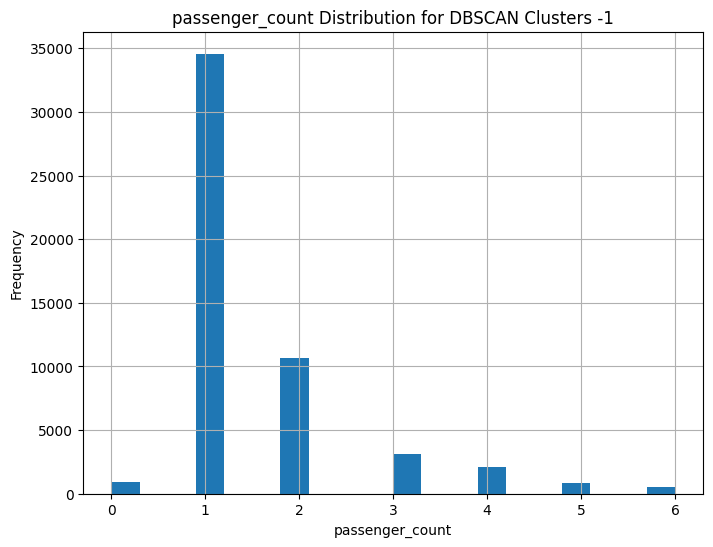

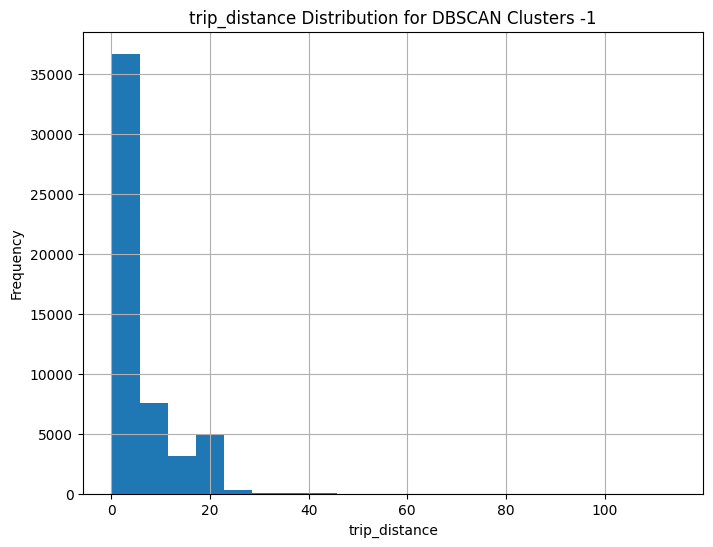

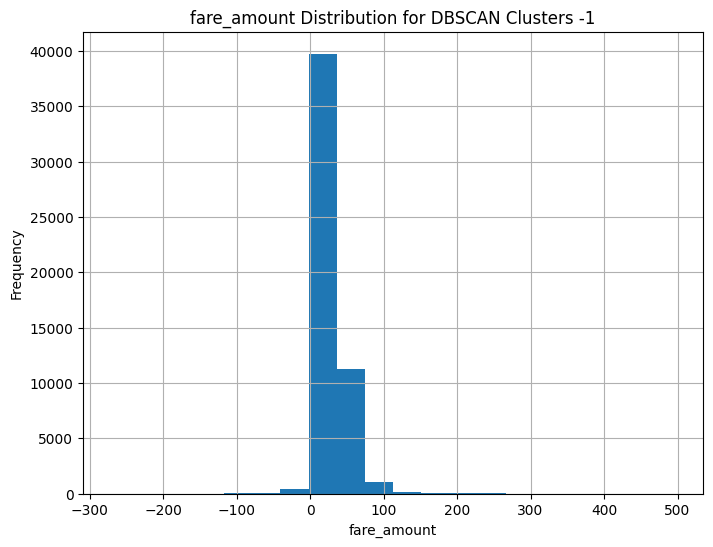

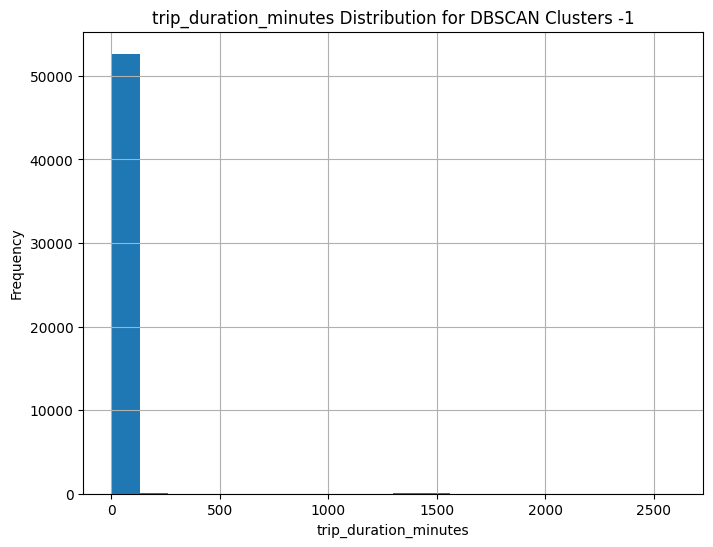



Cluster 0:


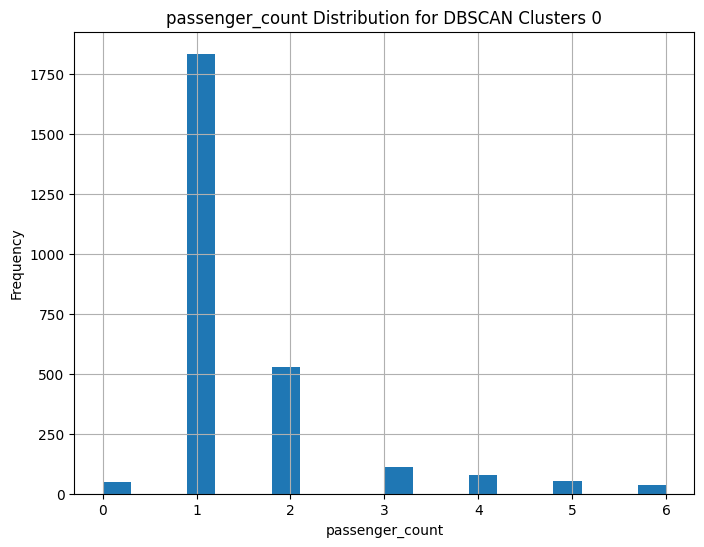

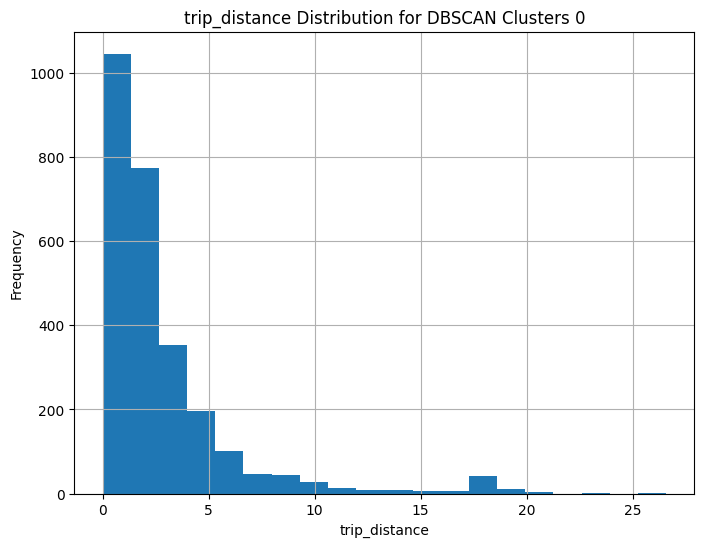

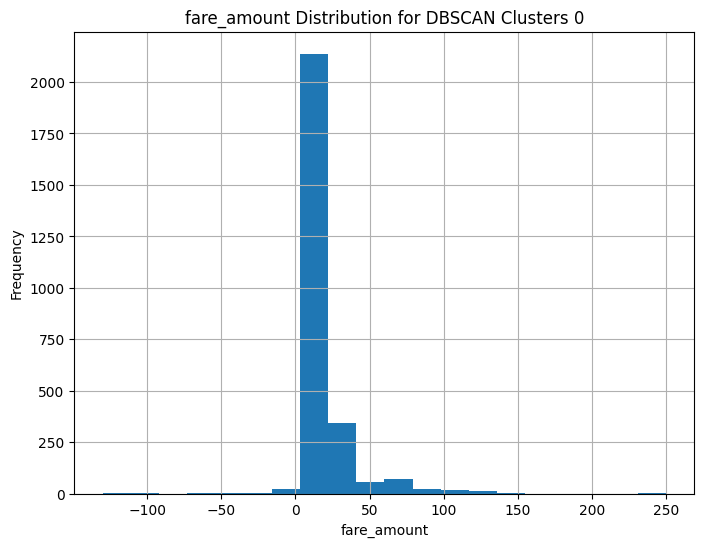

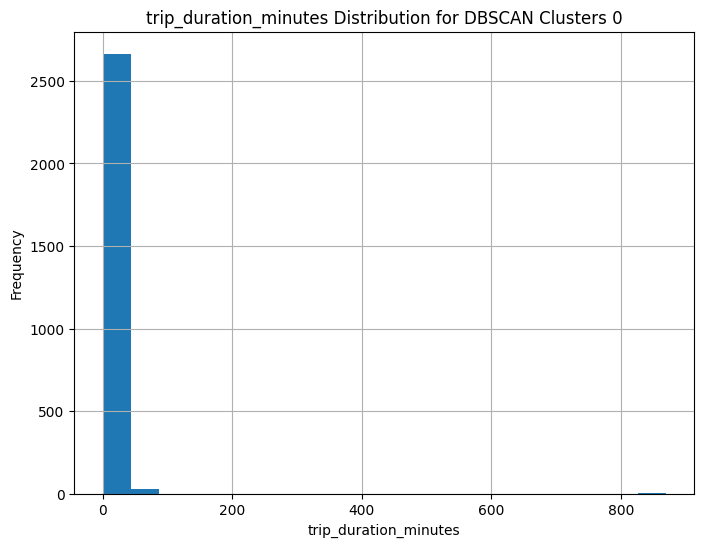



Cluster 1:


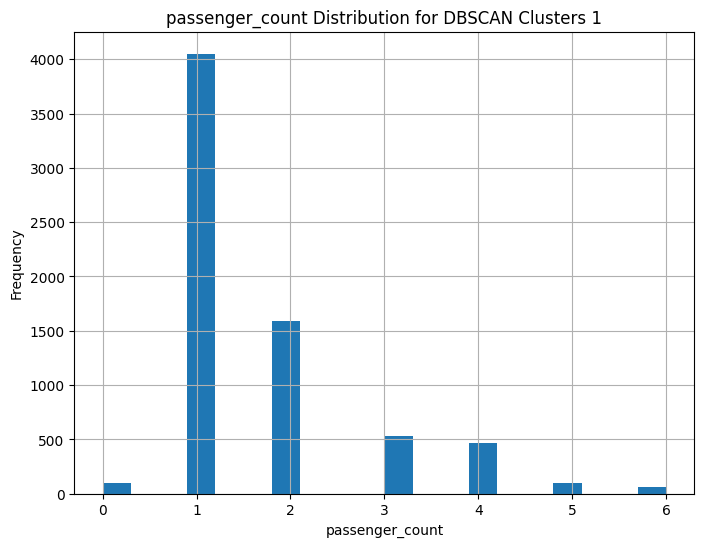

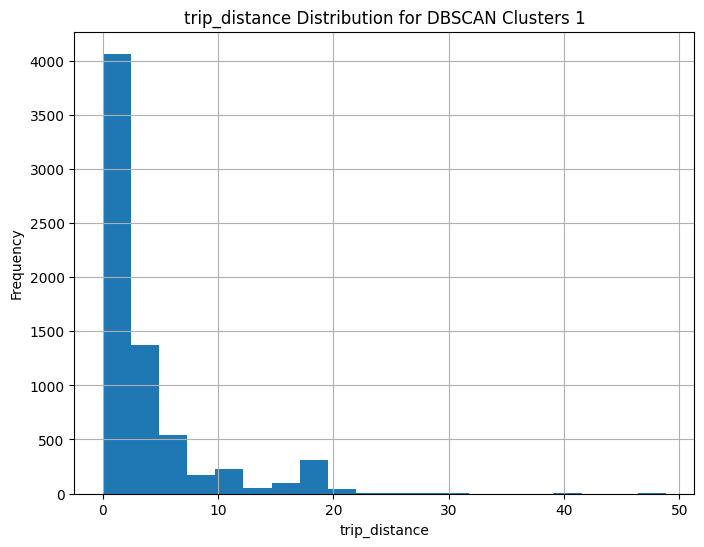

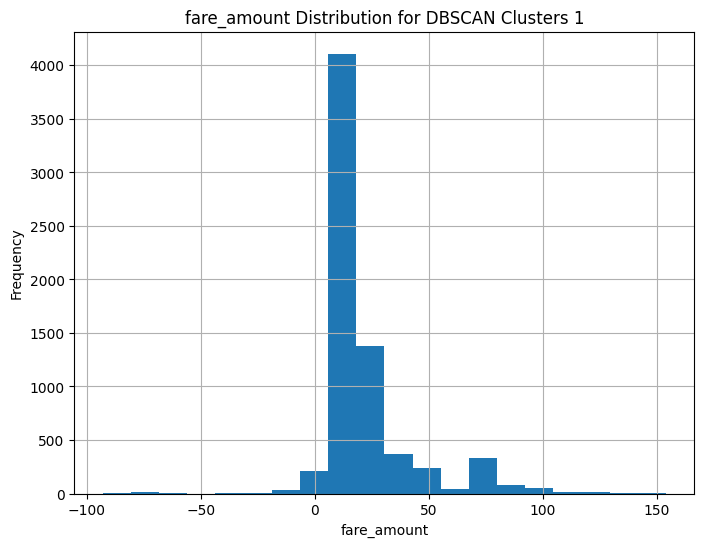

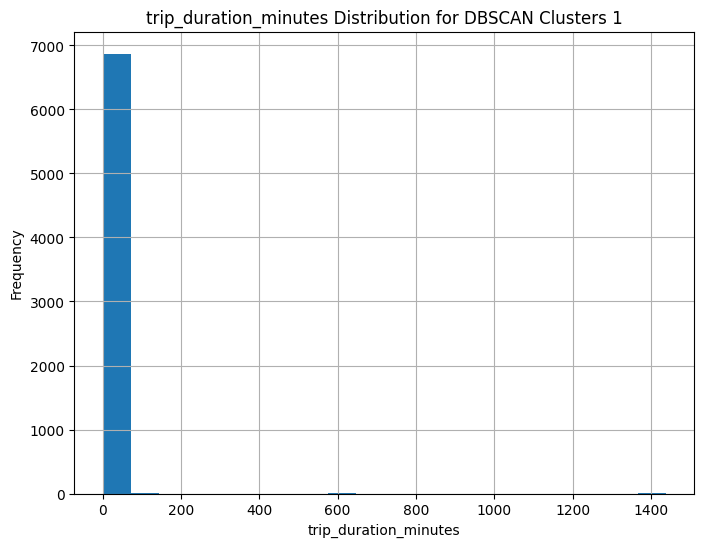



Cluster 2:


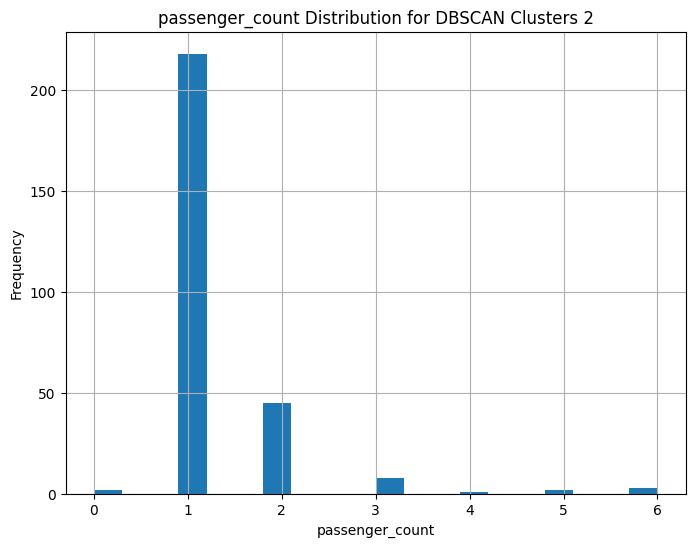

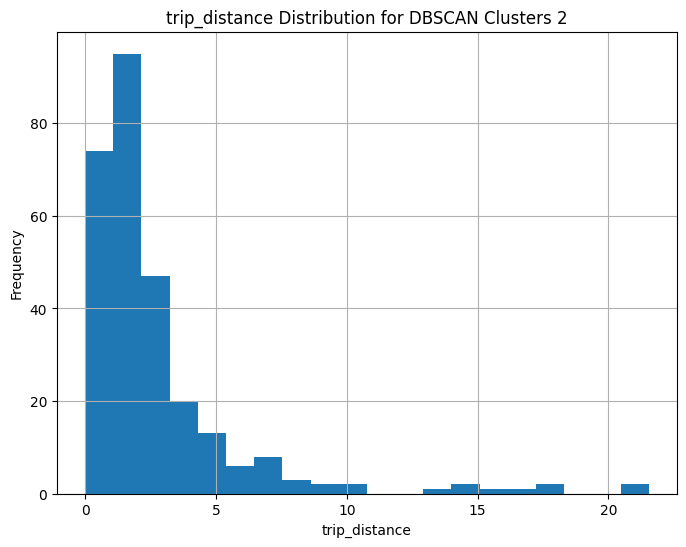

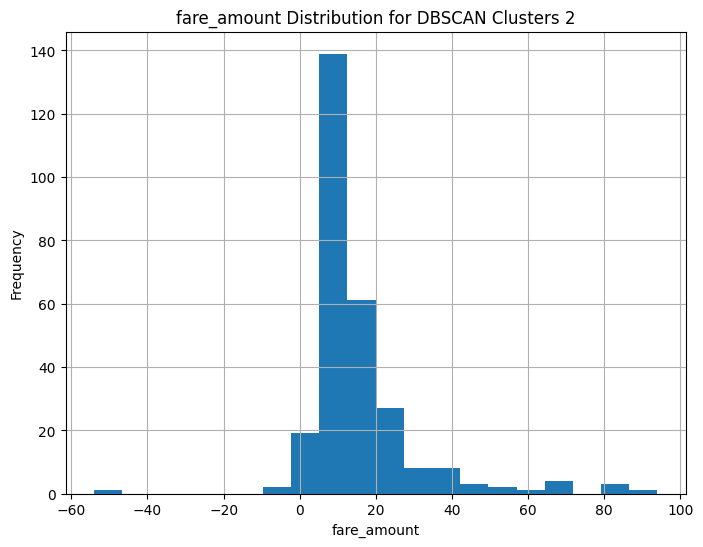

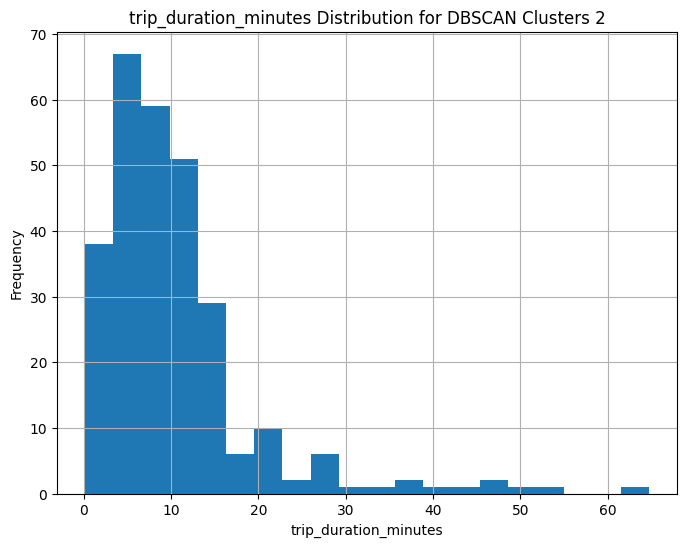



Cluster 3:


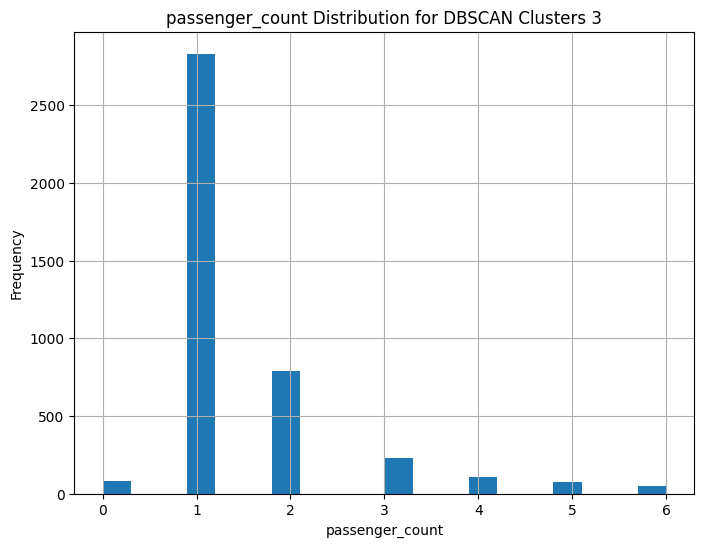

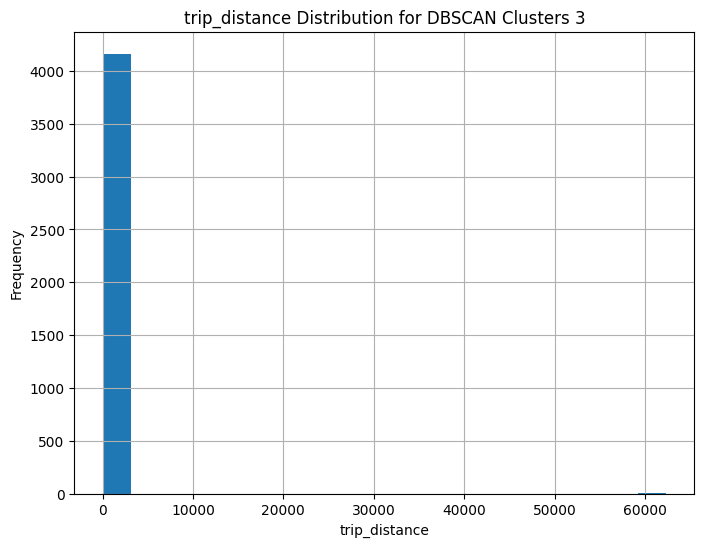

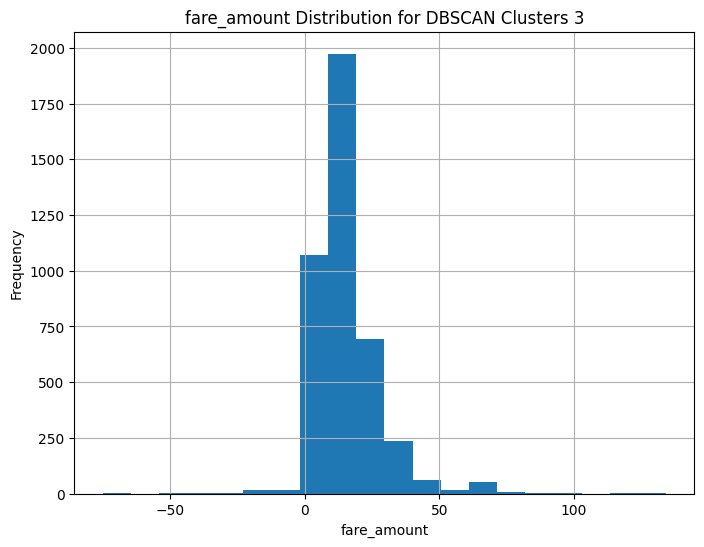

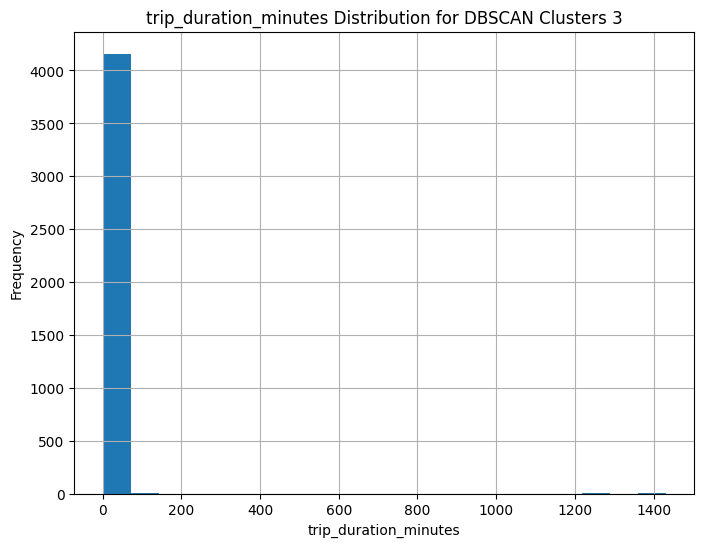



Cluster 4:


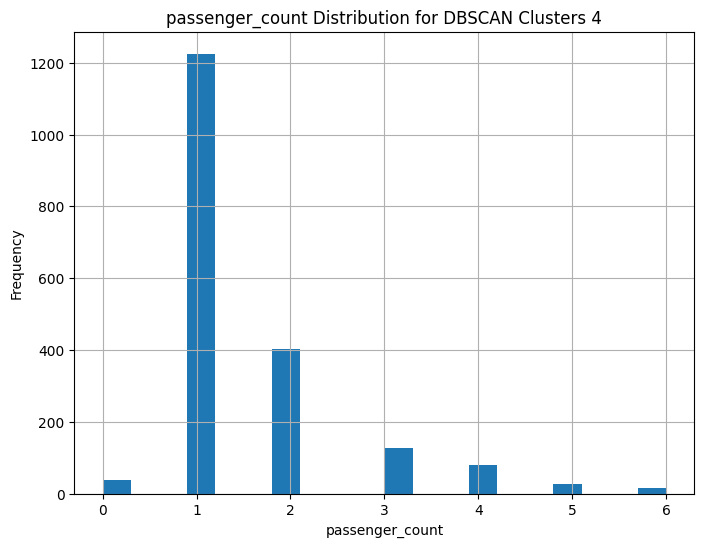

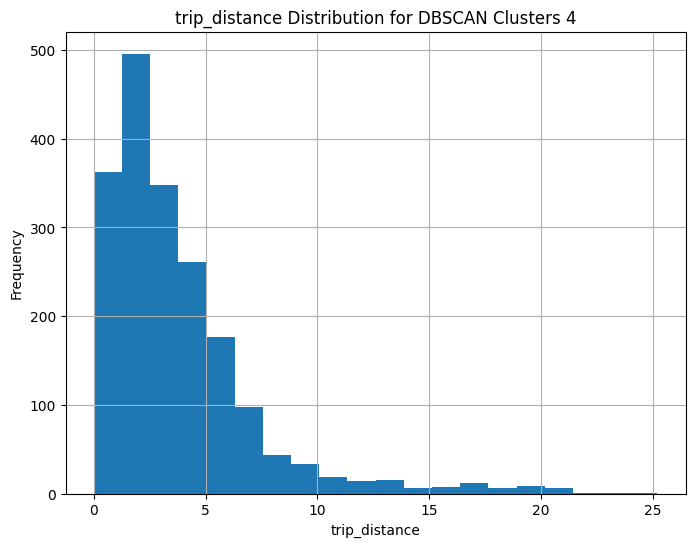

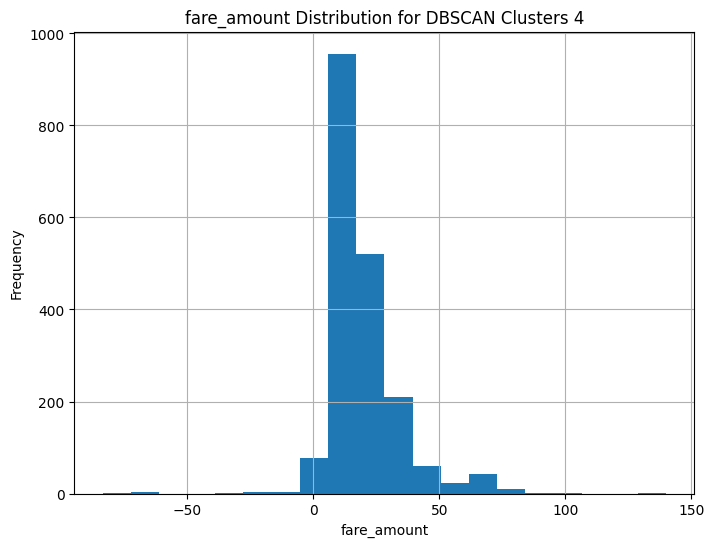

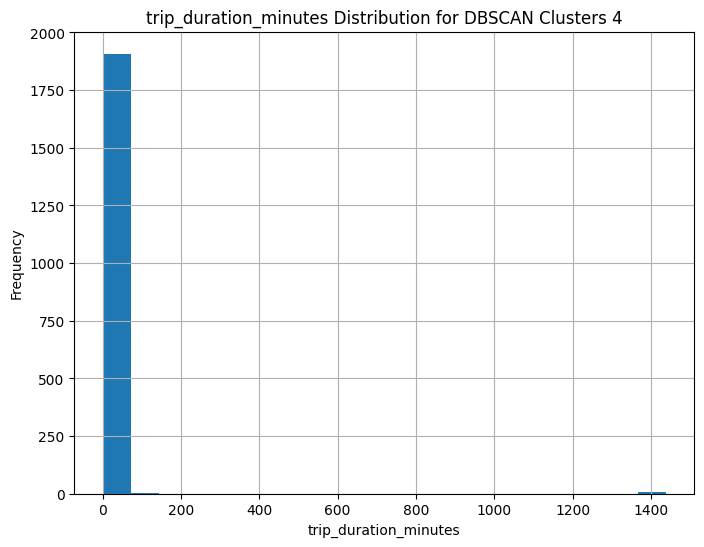



Cluster 5:


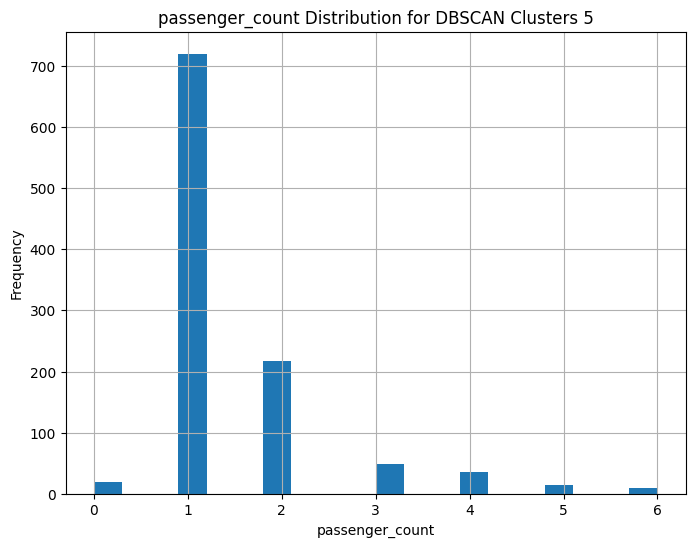

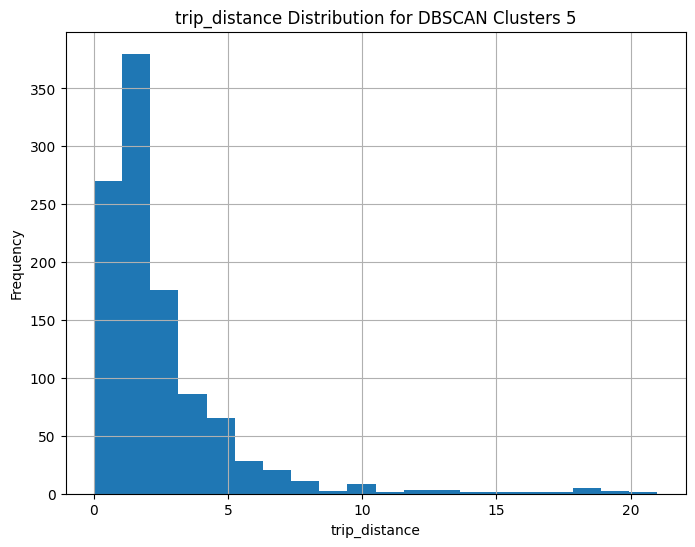

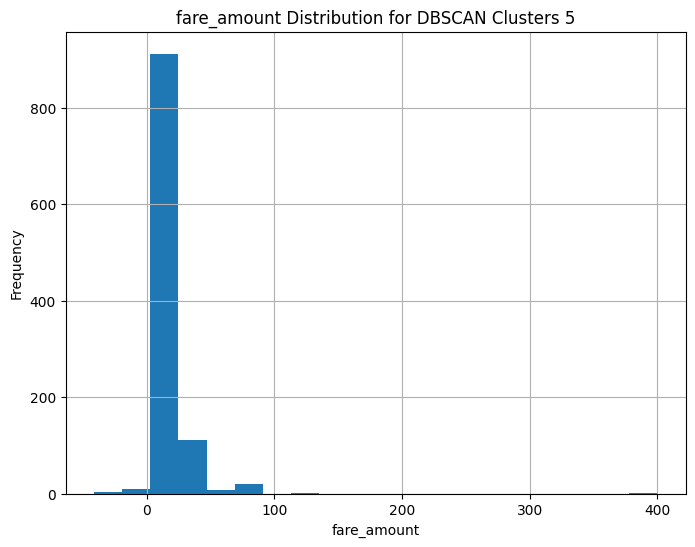

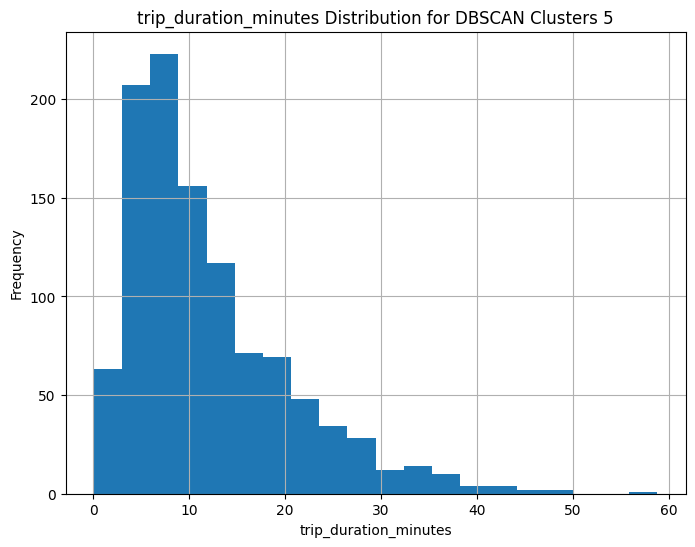



Cluster 6:


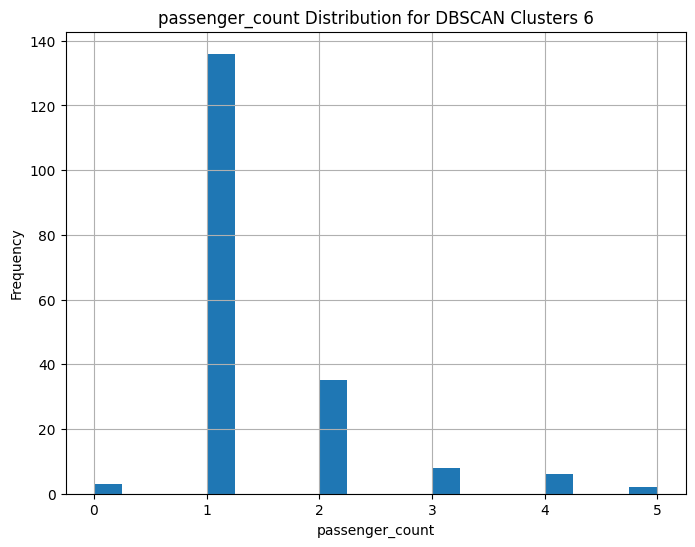

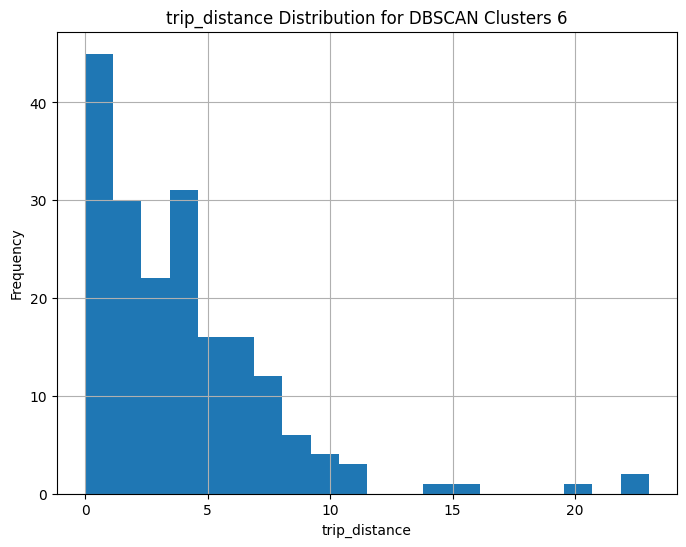

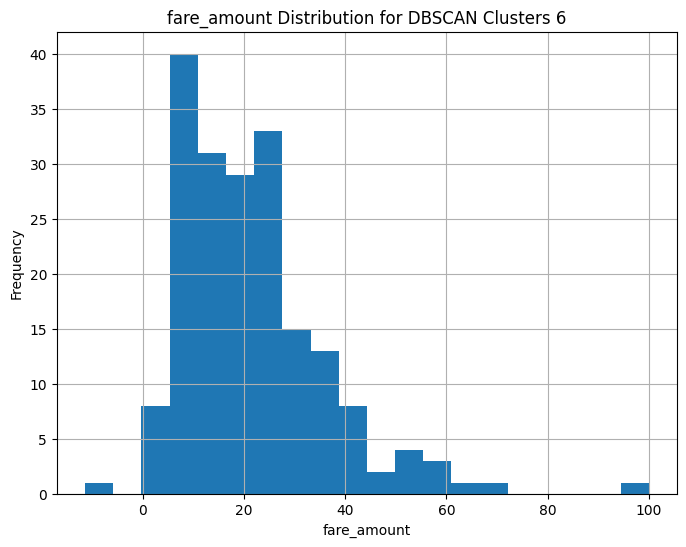

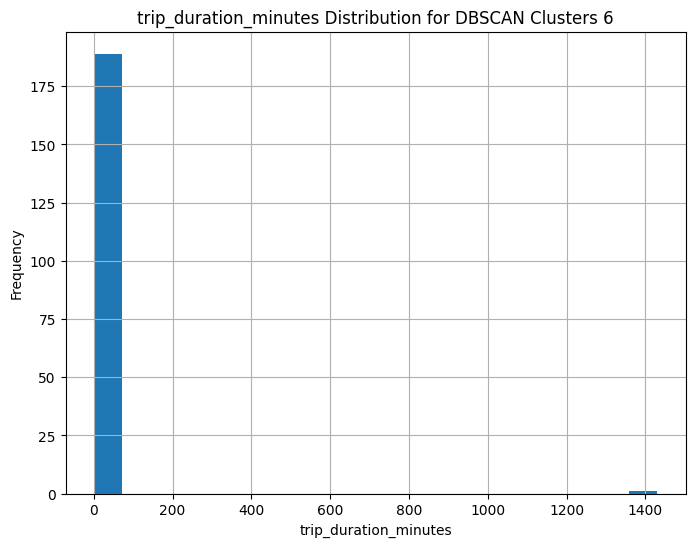



Cluster 7:


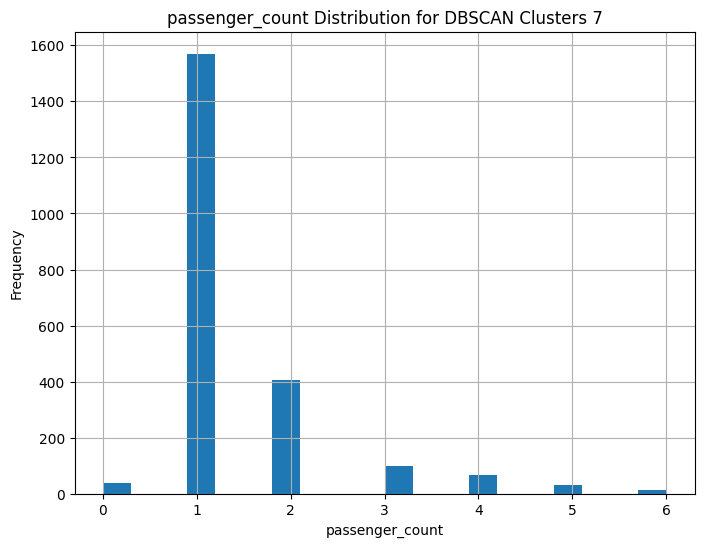

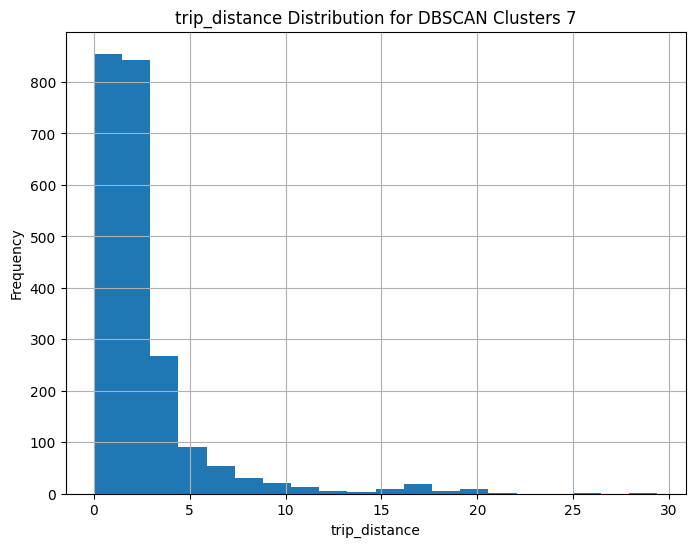

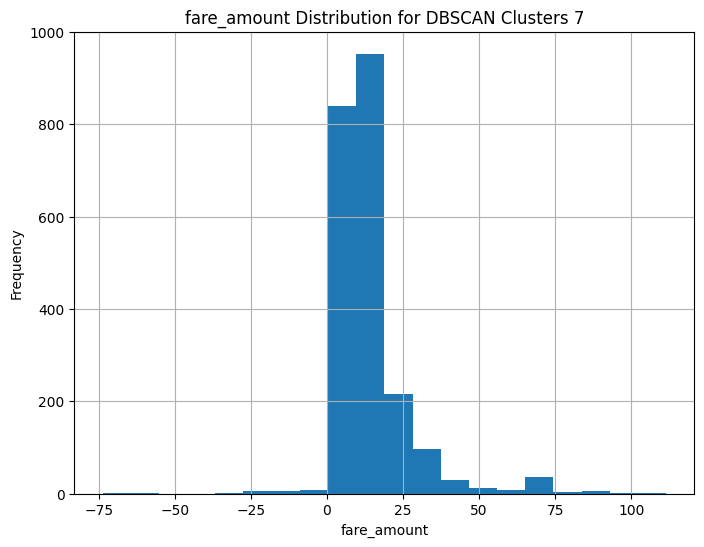

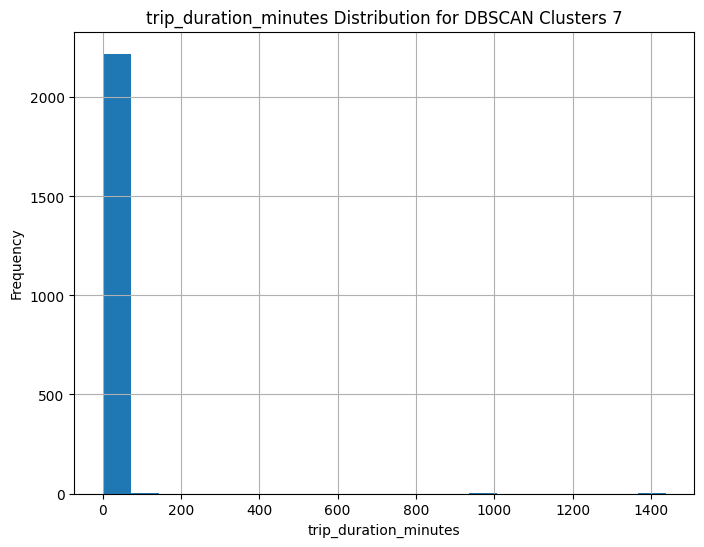



Cluster 8:


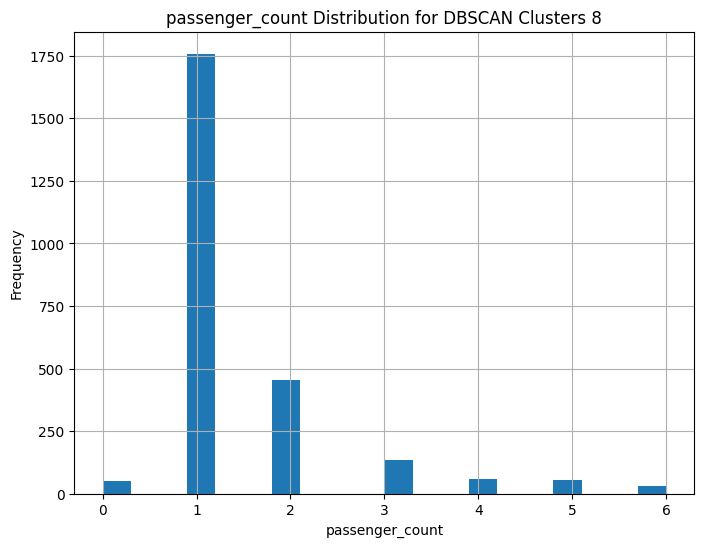

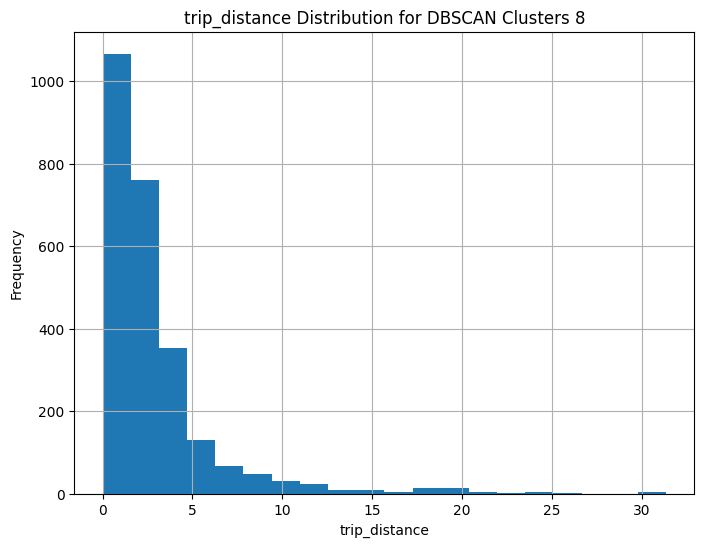

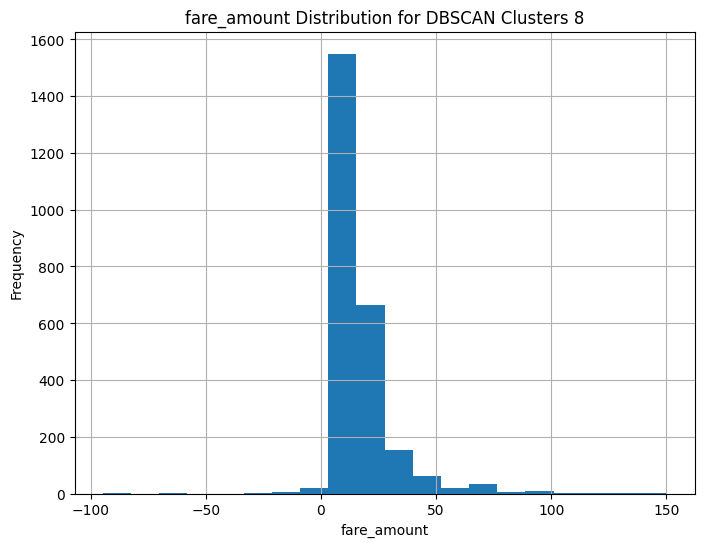

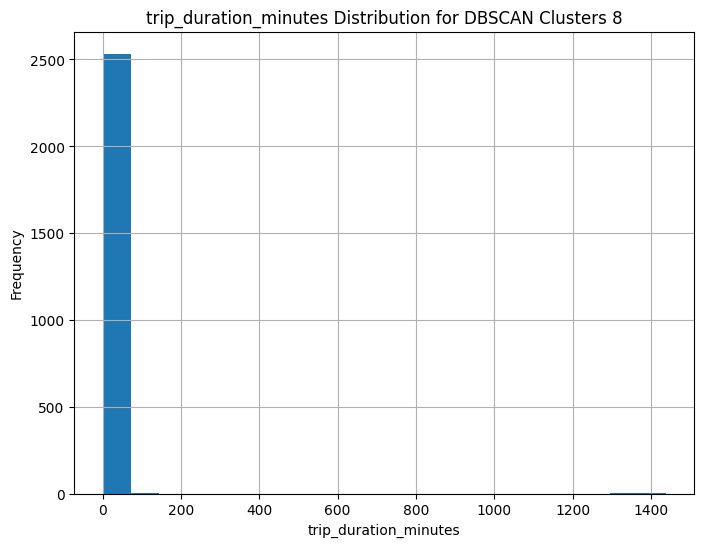



Cluster 9:


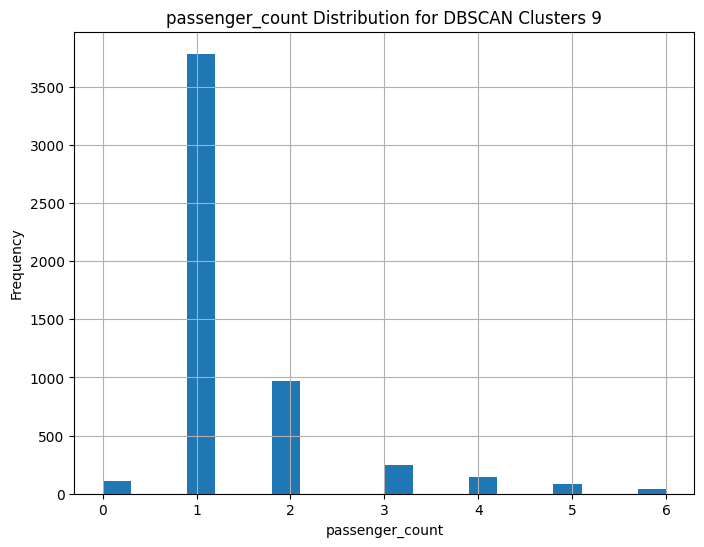

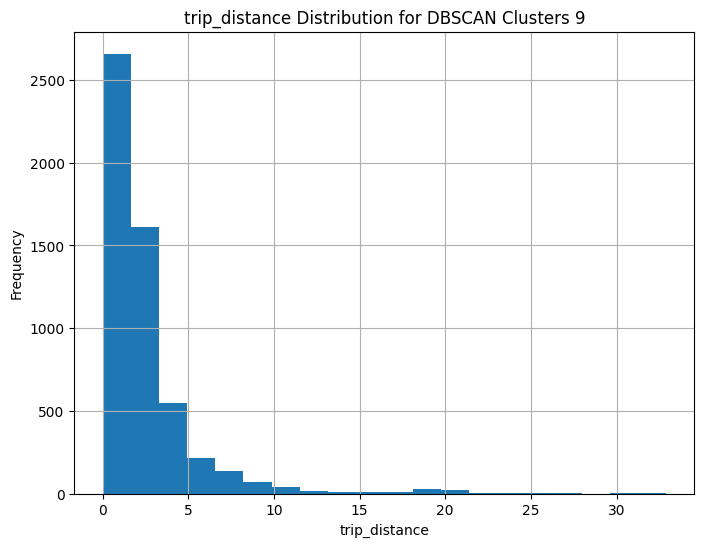

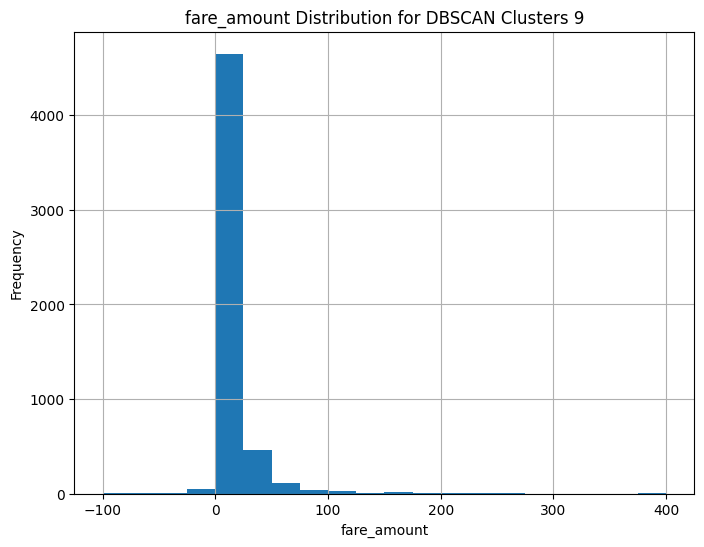

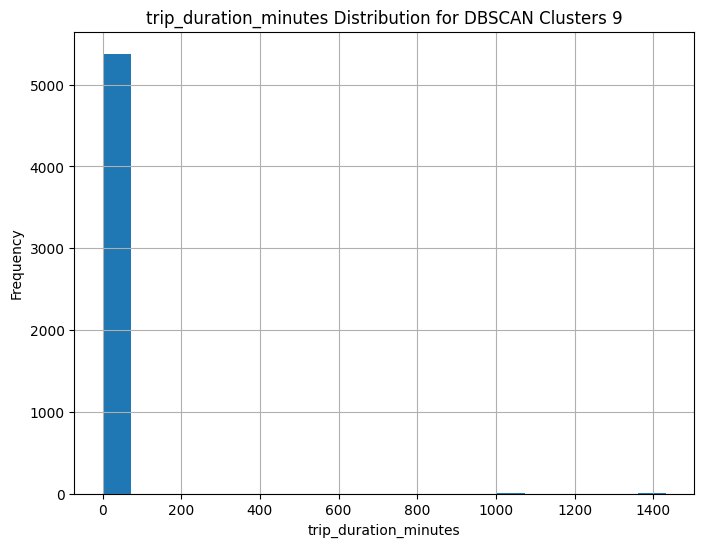



Cluster 10:


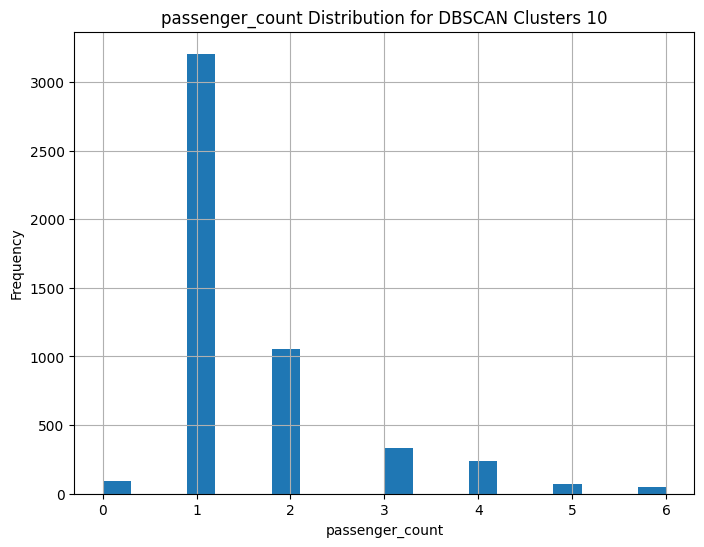

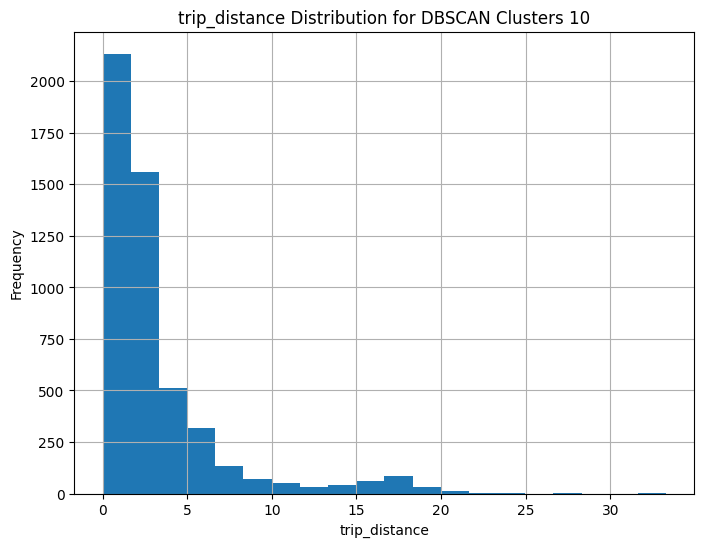

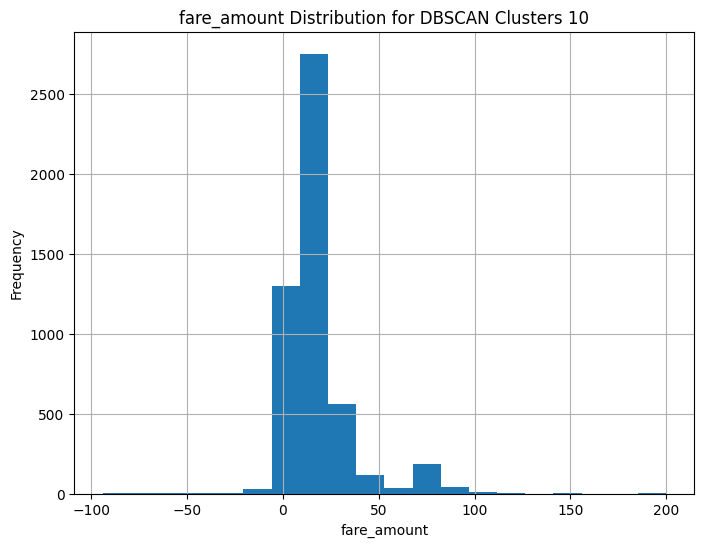

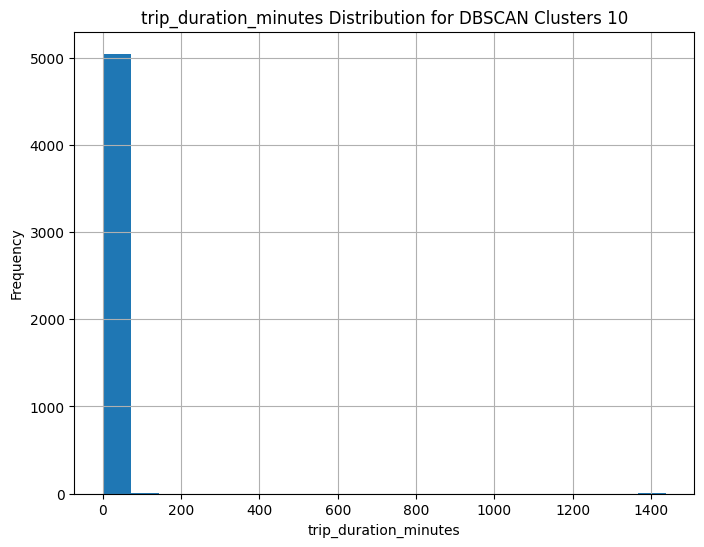



Cluster 11:


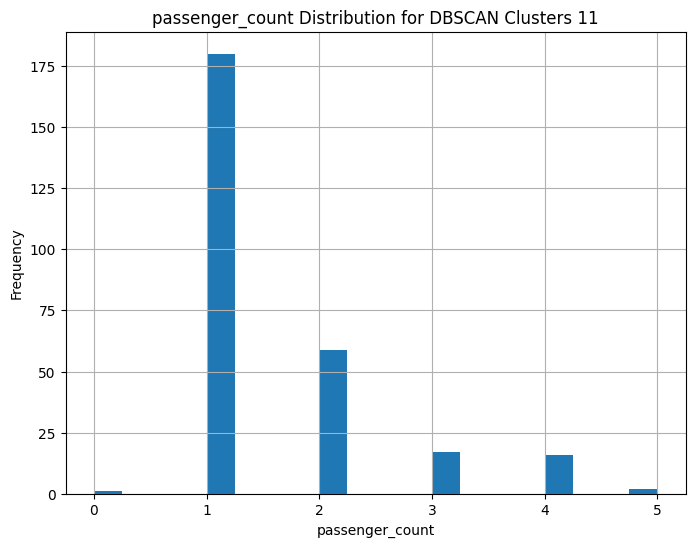

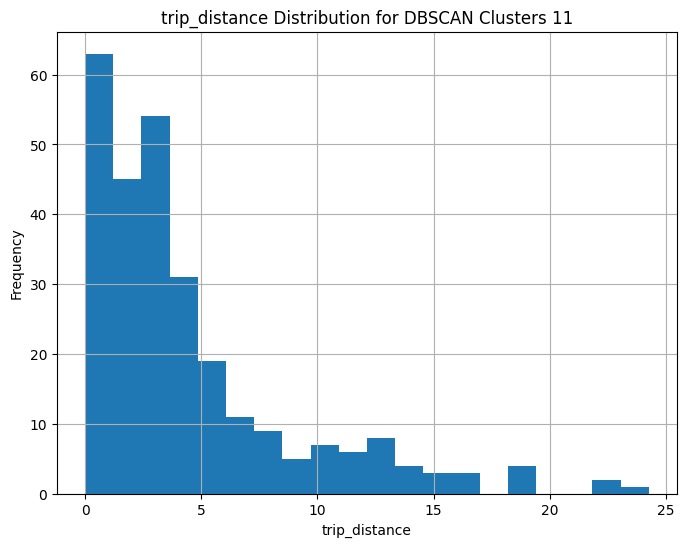

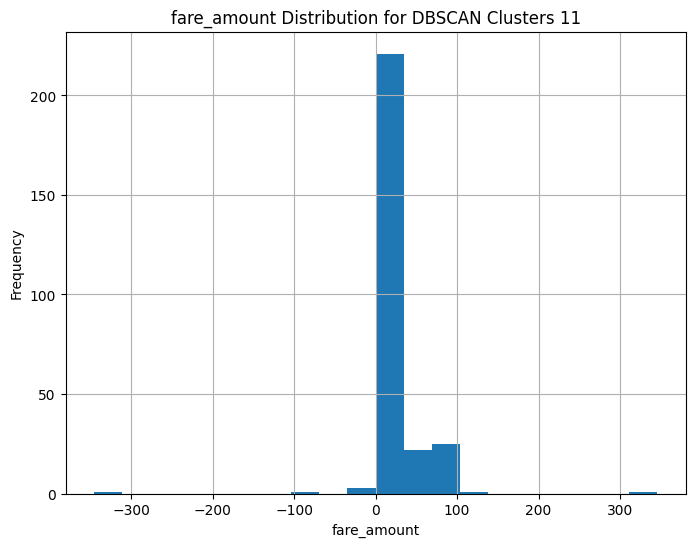

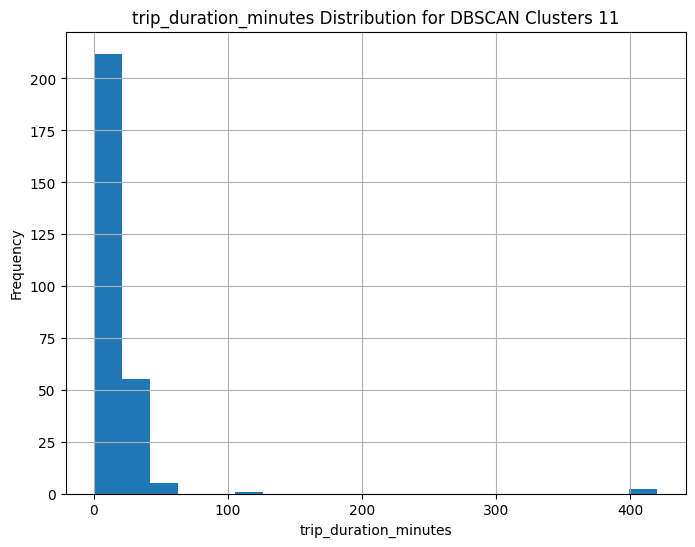



Cluster 12:


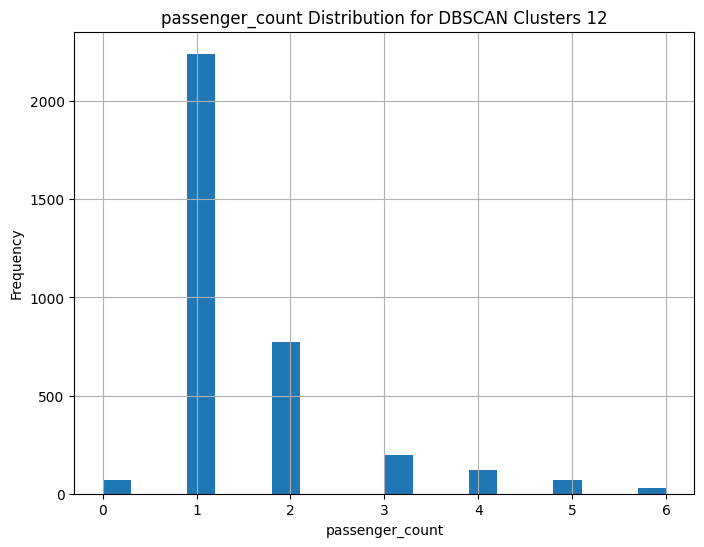

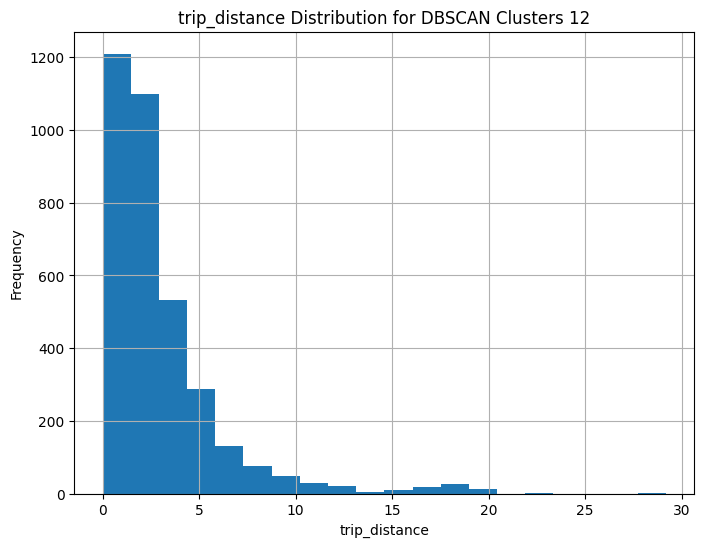

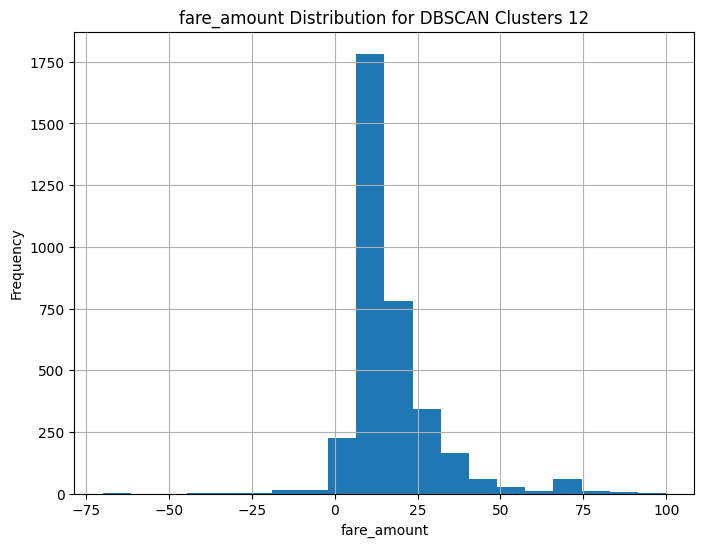

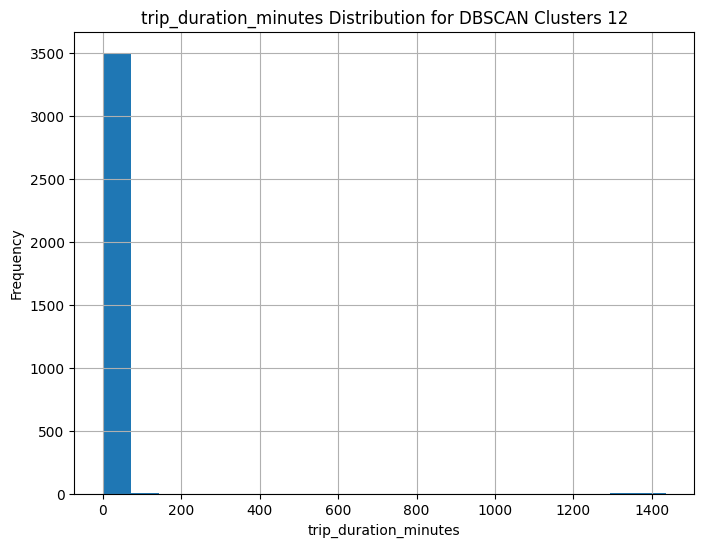



Cluster 13:


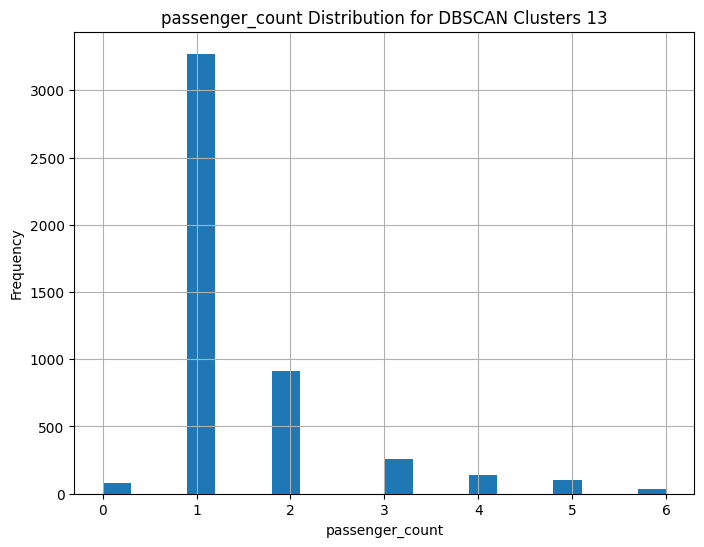

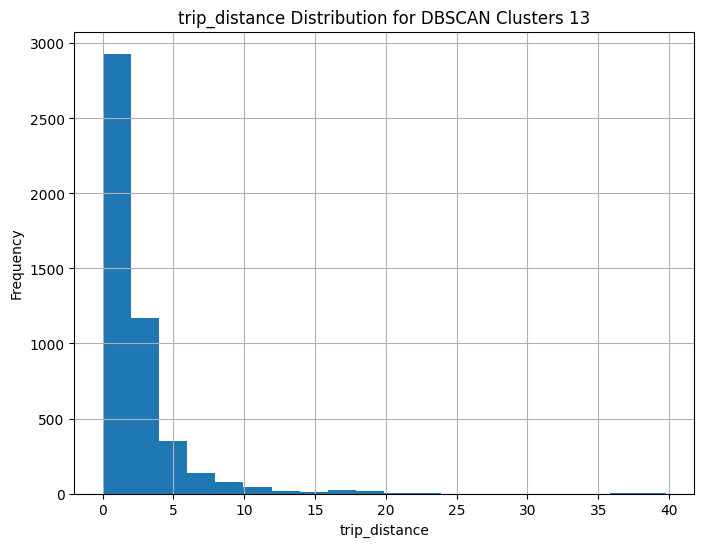

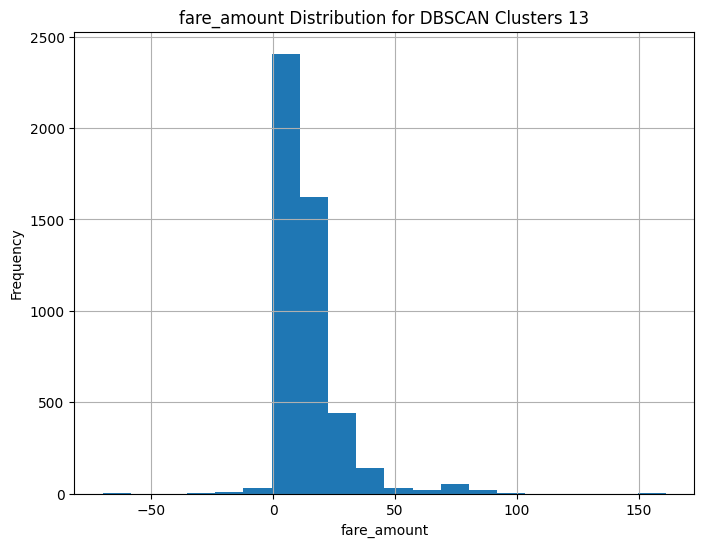

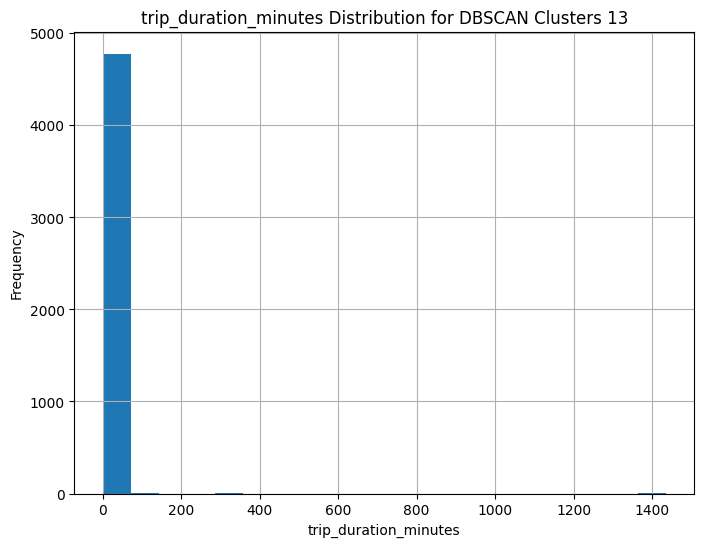



Cluster 14:


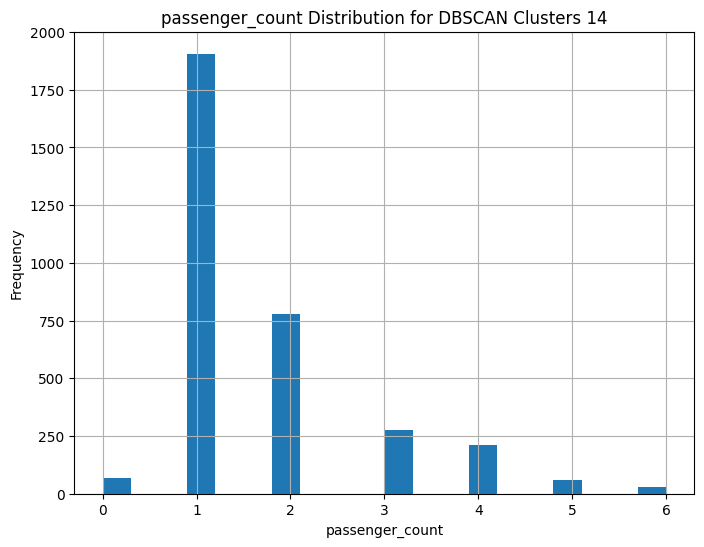

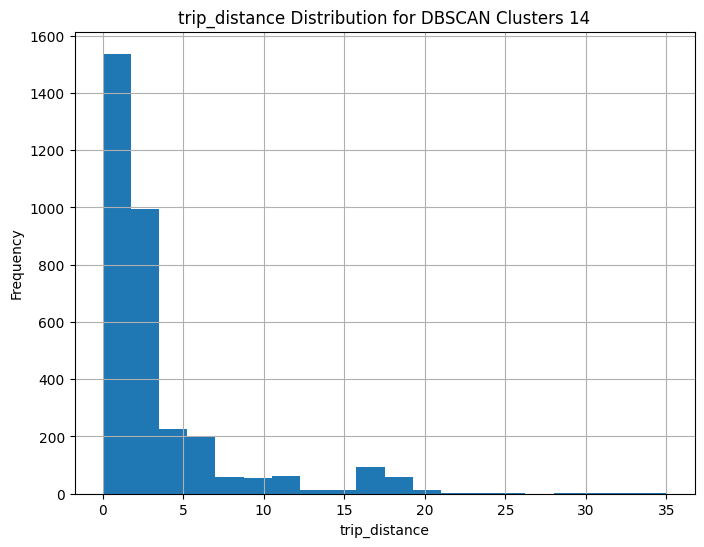

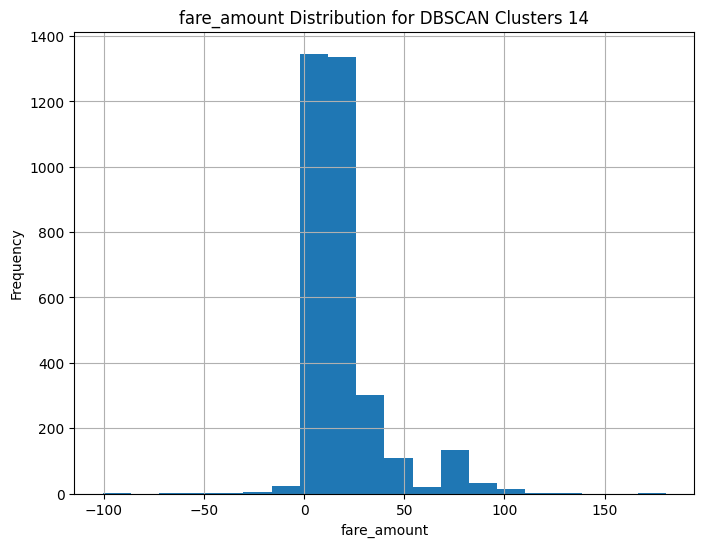

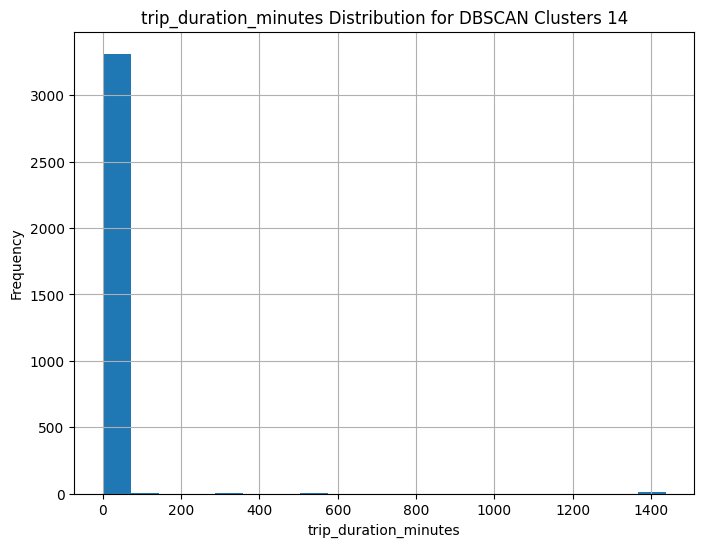



Cluster 15:


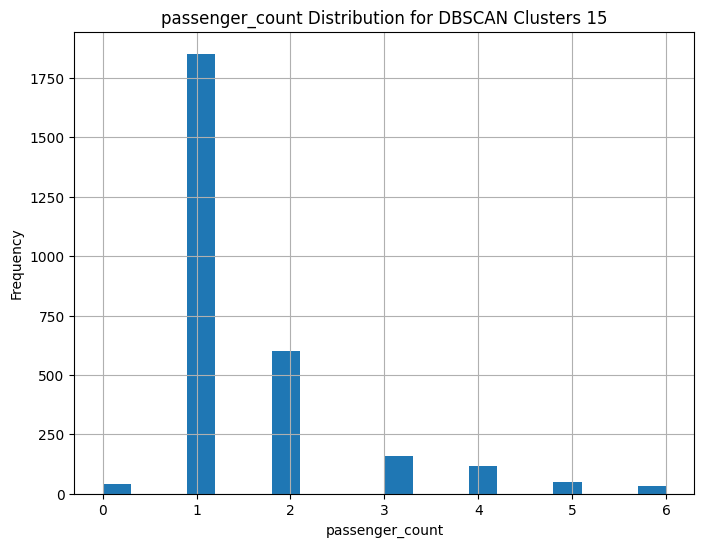

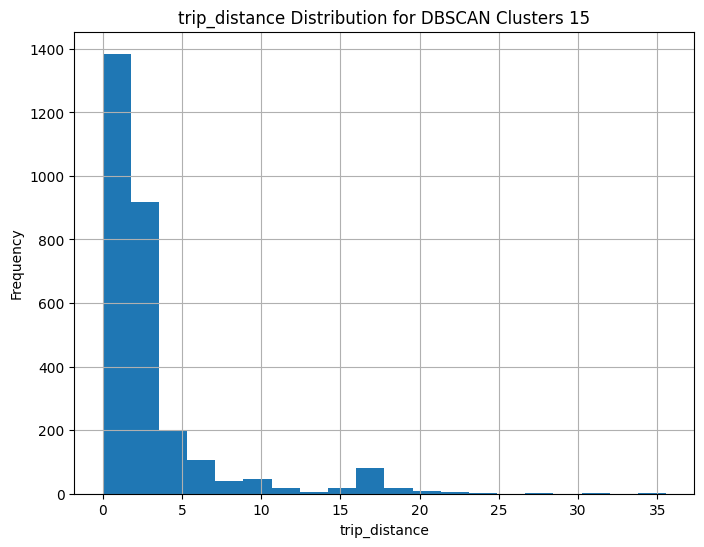

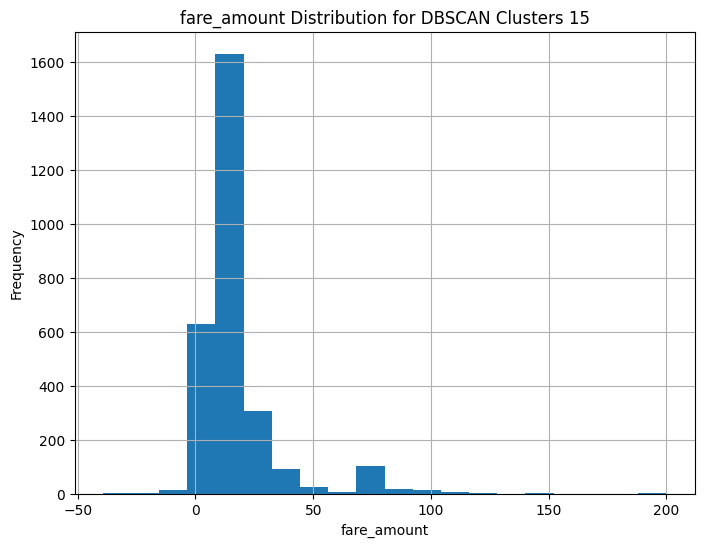

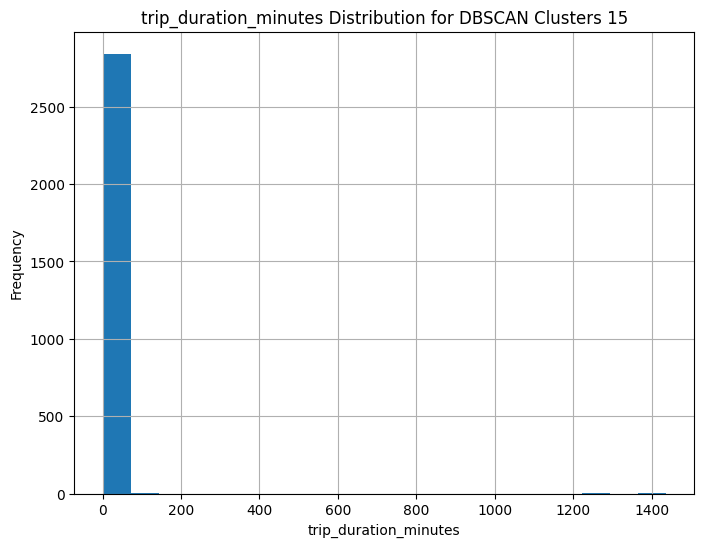



Cluster 16:


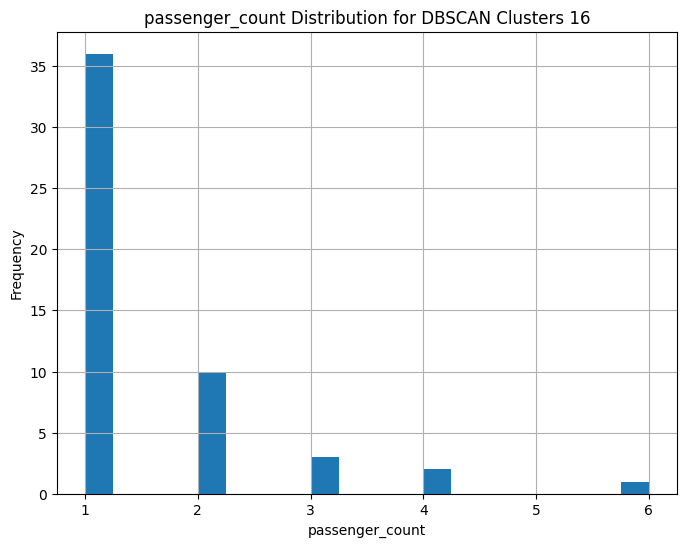

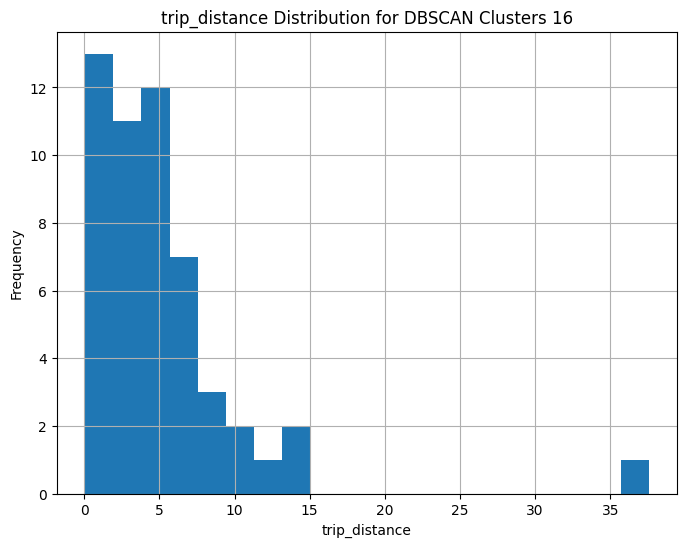

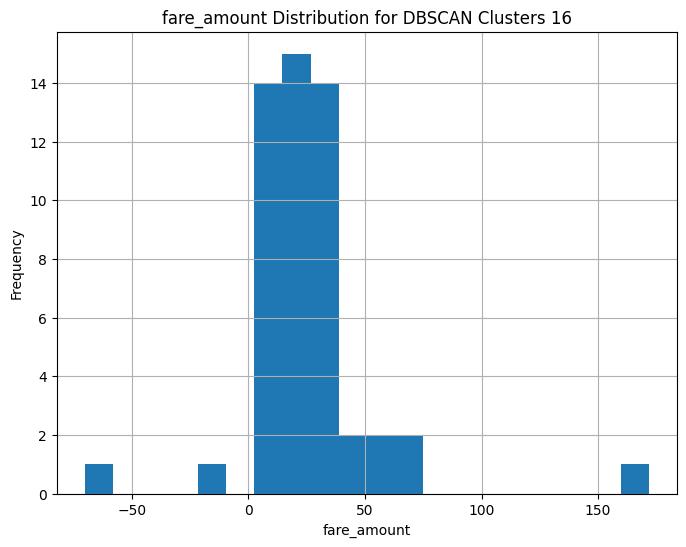

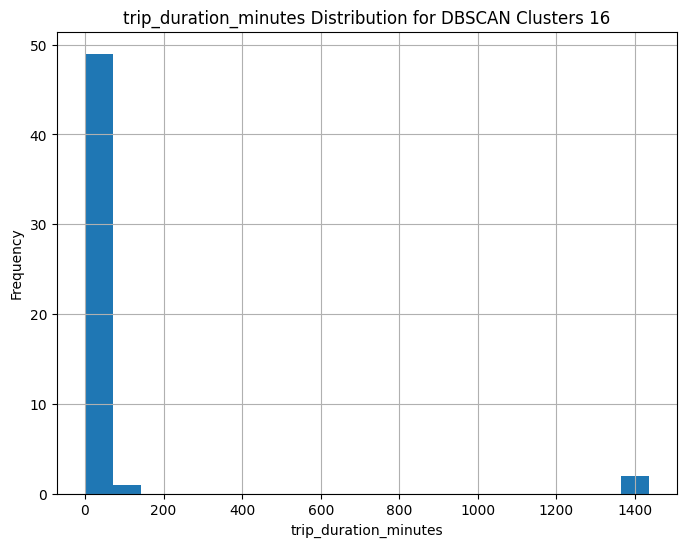



Cluster 17:


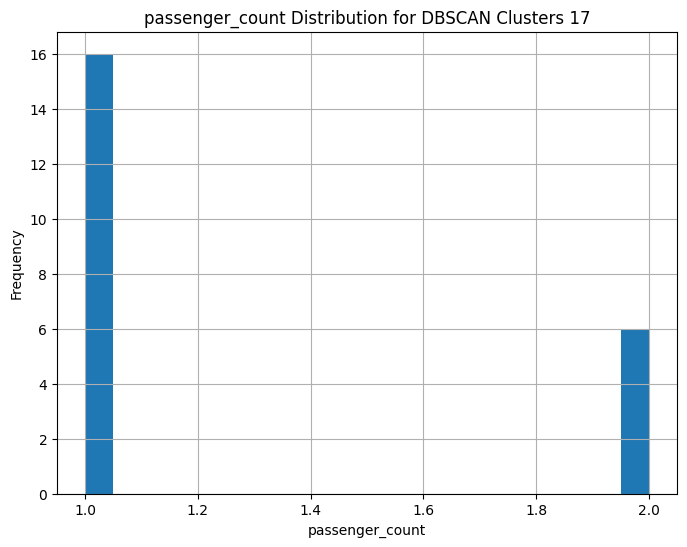

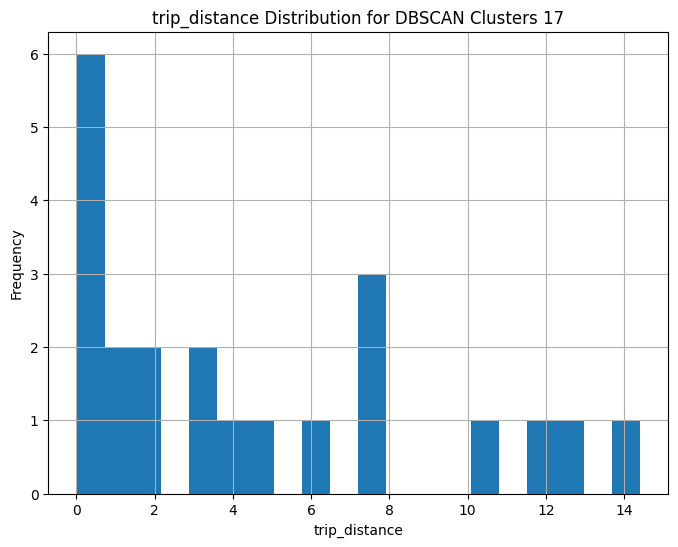

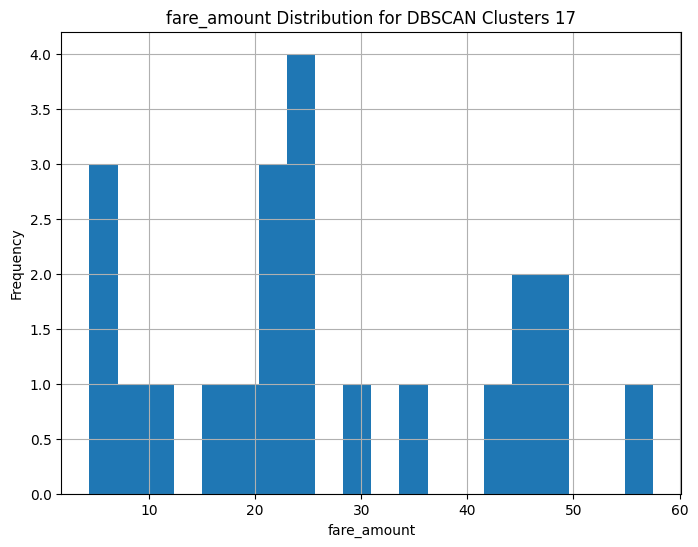

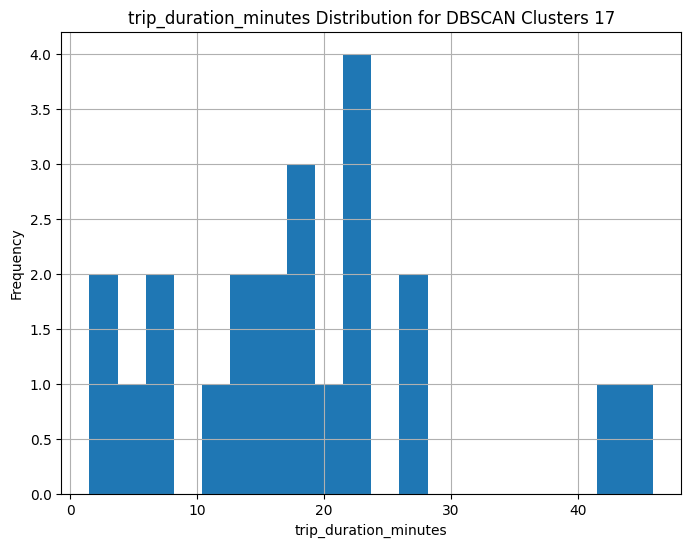

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
r_features = ['passenger_count','trip_distance', 'fare_amount', 'trip_duration_minutes']

# Perform the analysis for each cluster
for cluster, location_ids in clusters.items():
    print(f"Cluster {cluster}:")
    data = subset_parquet_df_read[subset_parquet_df_read['PULocationID'].isin(location_ids)]
    for feature in r_features:
        plt.figure(figsize=(8, 6))
        data[feature].hist(bins=20)
        plt.title(f'{feature} Distribution for DBSCAN Clusters {cluster}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    print("\n" + "="*50 + "\n")

**DISTINGUISHING FEATURES- EVALUATING MAXIMUM AND MINIMUM VALUES OF EACH FEATURES OF EACH CLUSTERS -------  **Obtaining highest and lowest of each features to derive insights for complete analysis in DBSCAN Clusters****

In [30]:
# Computing the minimum and maximum values for each feature in each cluster
for cluster, location_ids in clusters.items():
    cluster_data = subset_parquet_df_read[subset_parquet_df_read['ULocationID'].isin(location_ids)]
    for feature in ['passenger_count','trip_distance', 'fare_amount', 'trip_duration_minutes']:
        min_value = cluster_data[feature].min()
        min_location_id = cluster_data.loc[cluster_data[feature].idxmin(), 'ULocationID']
        max_value = cluster_data[feature].max()
        max_location_id = cluster_data.loc[cluster_data[feature].idxmax(), 'ULocationID']
        min_max_values[feature][cluster] = {'min': (min_location_id, min_value), 'max': (max_location_id, max_value)}

# Displaying the result.
for feature, values in min_max_values.items():
    print(f"Feature: {feature}")
    for cluster, min_max in values.items():
        min_location_id, min_value = min_max['min']
        max_location_id, max_value = min_max['max']
        print(f"Cluster {cluster}:")
        print(f"Minimum: Location ID: {min_location_id}, Value: {min_value}")
        print(f"Maximum: Location ID: {max_location_id}, Value: {max_value}")
        print("="*50)



Feature: passenger_count
Cluster -1:
Minimum: Location ID: 8.0, Value: 1.0
Maximum: Location ID: 212.0, Value: 6.0
Cluster 0:
Minimum: Location ID: 1.0, Value: 1.0
Maximum: Location ID: 90.0, Value: 2.0
Cluster 1:
Minimum: Location ID: 2.0, Value: 1.0
Maximum: Location ID: 40.0, Value: 2.0
Cluster 2:
Minimum: Location ID: 3.0, Value: 1.0
Maximum: Location ID: 3.0, Value: 1.0
Cluster 3:
Minimum: Location ID: 4.0, Value: 0.0
Maximum: Location ID: 147.0, Value: 2.0
Cluster 4:
Minimum: Location ID: 5.0, Value: 1.0
Maximum: Location ID: 182.0, Value: 4.0
Cluster 5:
Minimum: Location ID: 6.0, Value: 1.0
Maximum: Location ID: 6.0, Value: 1.0
Cluster 6:
Minimum: Location ID: 16.0, Value: 1.0
Maximum: Location ID: 47.0, Value: 2.0
Cluster 7:
Minimum: Location ID: 86.0, Value: 1.0
Maximum: Location ID: 23.0, Value: 4.0
Cluster 8:
Minimum: Location ID: 29.0, Value: 1.0
Maximum: Location ID: 36.0, Value: 2.0
Cluster 9:
Minimum: Location ID: 73.0, Value: 1.0
Maximum: Location ID: 41.0, Value: 5.0
C

**ANALYSIS OF TRIPS GRAPHICALLY --**

**--THE DISTINGUISHING FEATURES**


Feature: passenger_count
Cluster -1:
 Location ID of Minimum frequency : 8.0, Value: 1.0
 Location ID of Maximum frequency : 212.0, Value: 6.0


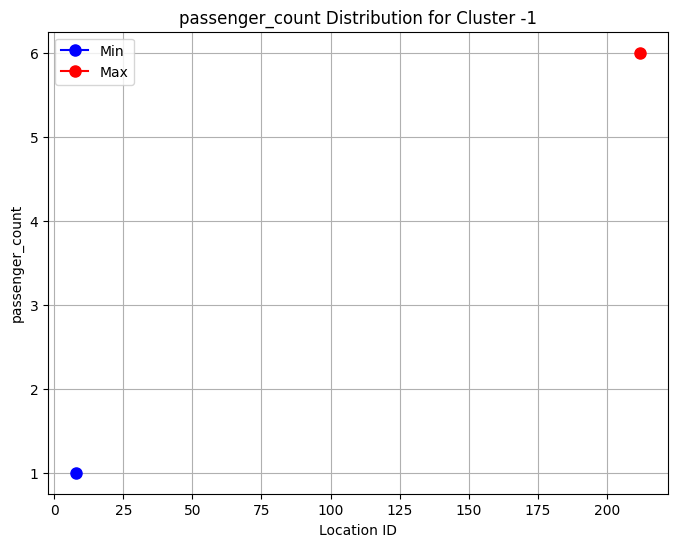

Cluster 0:
 Location ID of Minimum frequency : 1.0, Value: 1.0
 Location ID of Maximum frequency : 90.0, Value: 2.0


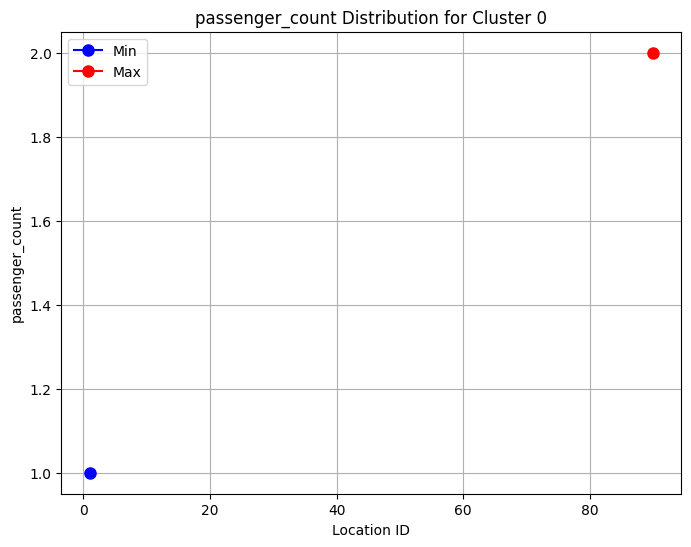

Cluster 1:
 Location ID of Minimum frequency : 2.0, Value: 1.0
 Location ID of Maximum frequency : 40.0, Value: 2.0


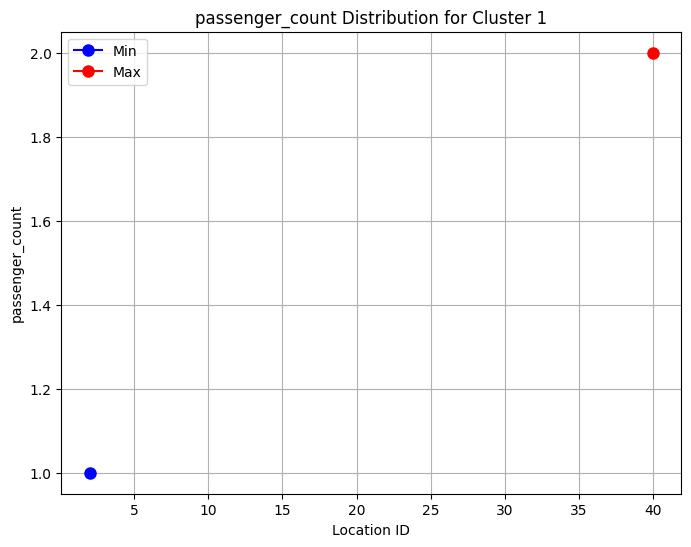

Cluster 2:
 Location ID of Minimum frequency : 3.0, Value: 1.0
 Location ID of Maximum frequency : 3.0, Value: 1.0


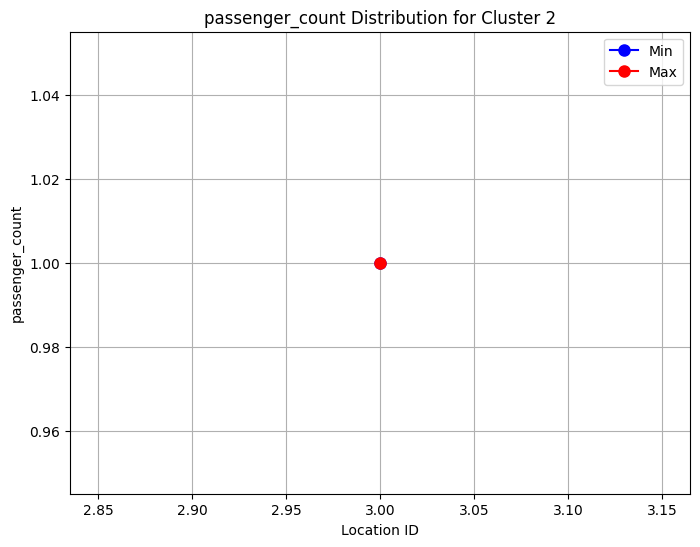

Cluster 3:
 Location ID of Minimum frequency : 4.0, Value: 0.0
 Location ID of Maximum frequency : 147.0, Value: 2.0


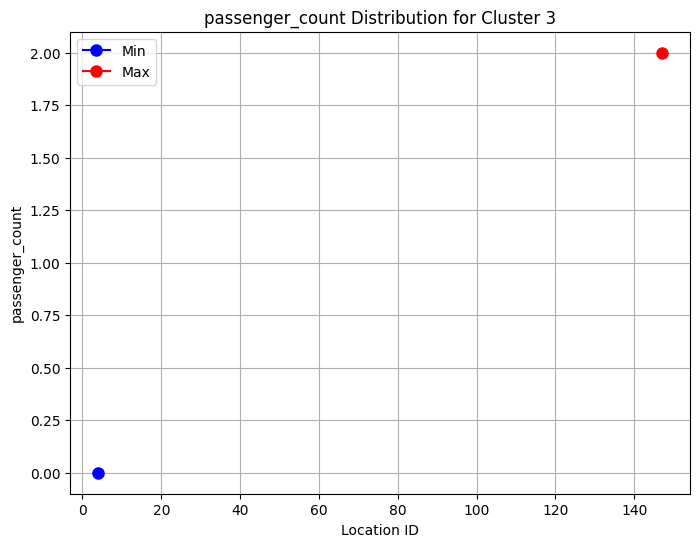

Cluster 4:
 Location ID of Minimum frequency : 5.0, Value: 1.0
 Location ID of Maximum frequency : 182.0, Value: 4.0


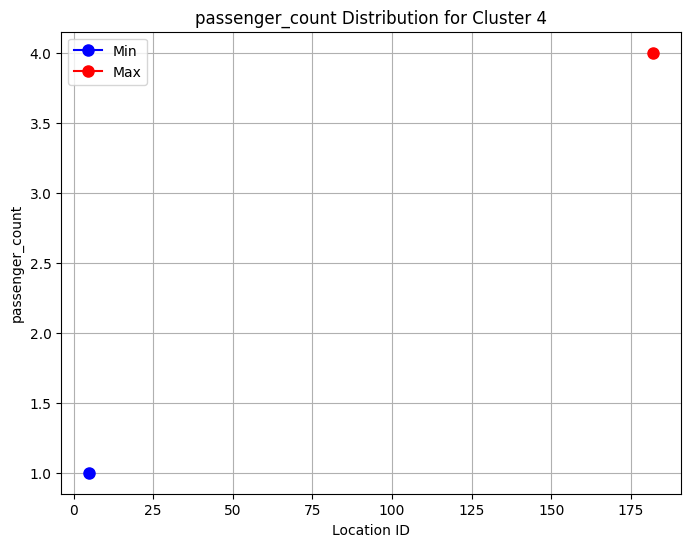

Cluster 5:
 Location ID of Minimum frequency : 6.0, Value: 1.0
 Location ID of Maximum frequency : 6.0, Value: 1.0


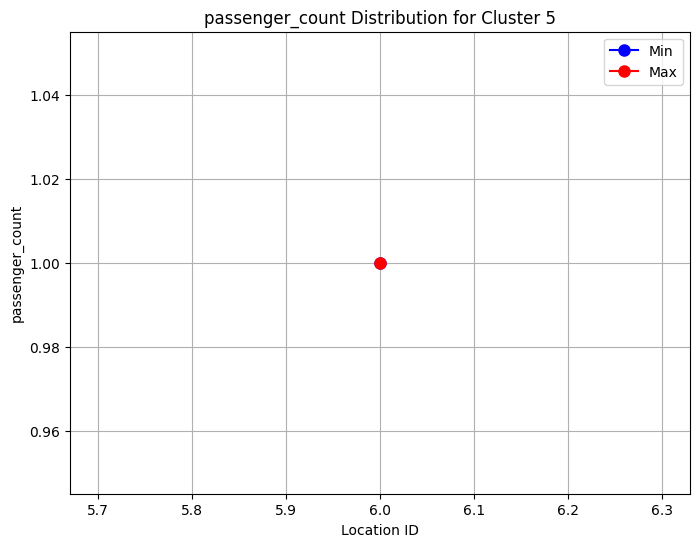

Cluster 6:
 Location ID of Minimum frequency : 16.0, Value: 1.0
 Location ID of Maximum frequency : 47.0, Value: 2.0


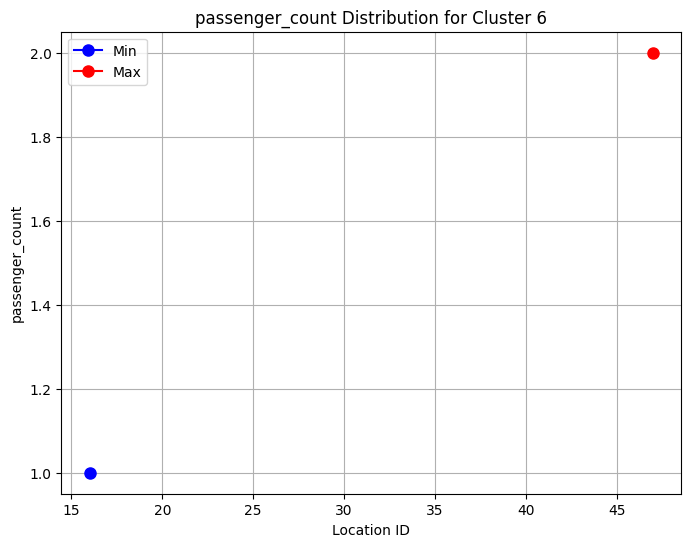

Cluster 7:
 Location ID of Minimum frequency : 86.0, Value: 1.0
 Location ID of Maximum frequency : 23.0, Value: 4.0


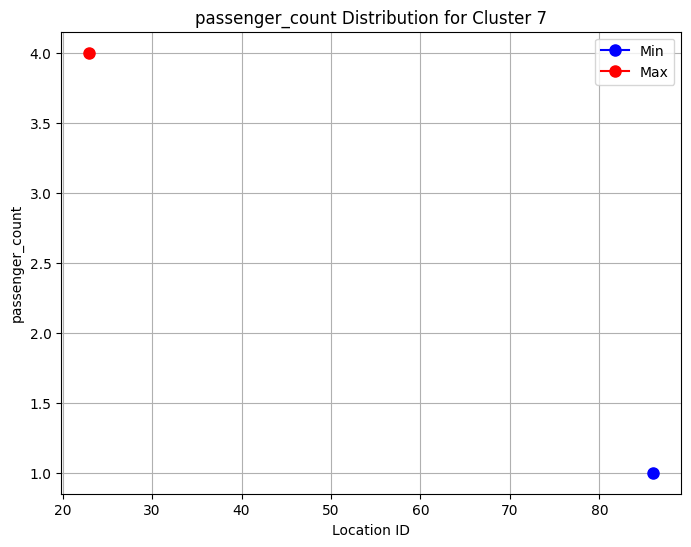

Cluster 8:
 Location ID of Minimum frequency : 29.0, Value: 1.0
 Location ID of Maximum frequency : 36.0, Value: 2.0


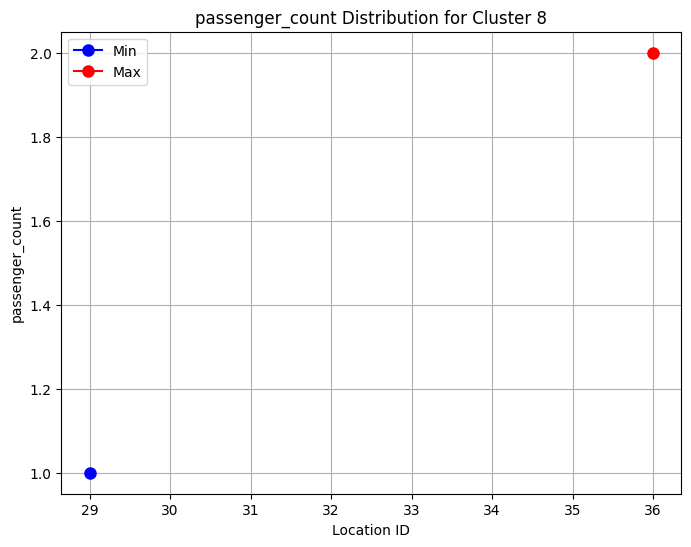

Cluster 9:
 Location ID of Minimum frequency : 73.0, Value: 1.0
 Location ID of Maximum frequency : 41.0, Value: 5.0


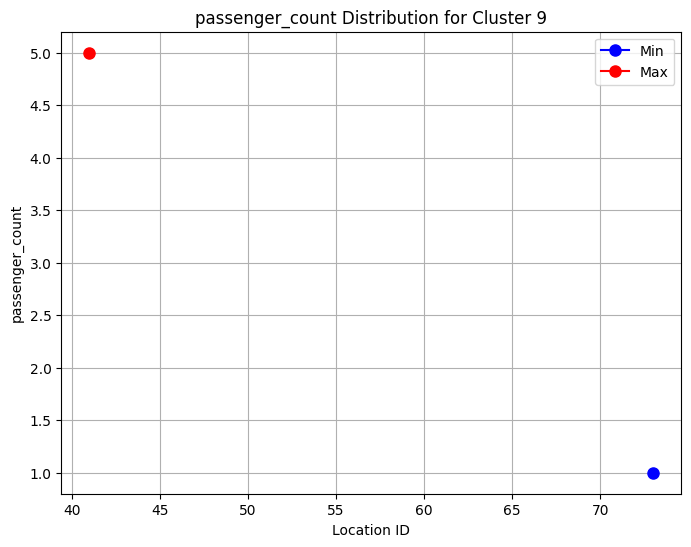

Cluster 10:
 Location ID of Minimum frequency : 44.0, Value: 1.0
 Location ID of Maximum frequency : 146.0, Value: 2.0


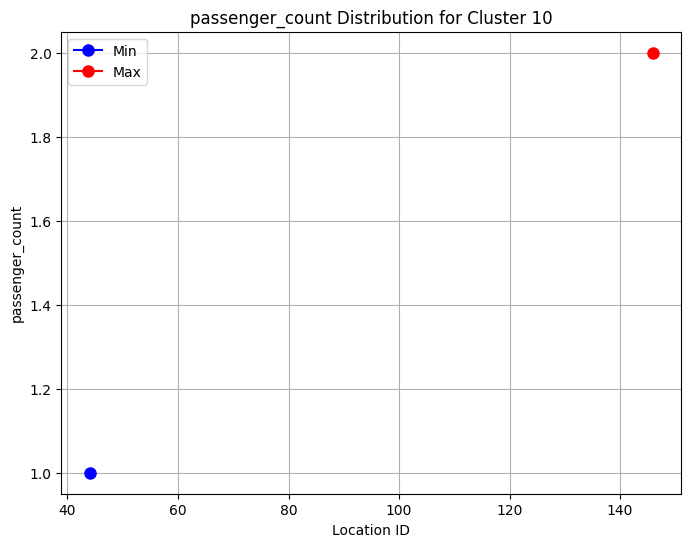

Cluster 11:
 Location ID of Minimum frequency : 45.0, Value: 1.0
 Location ID of Maximum frequency : 28.0, Value: 2.0


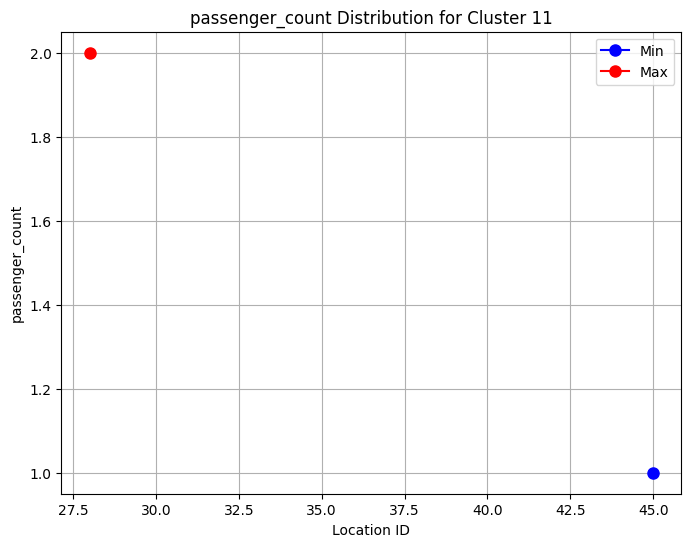

Cluster 12:
 Location ID of Minimum frequency : 59.0, Value: 1.0
 Location ID of Maximum frequency : 194.0, Value: 4.0


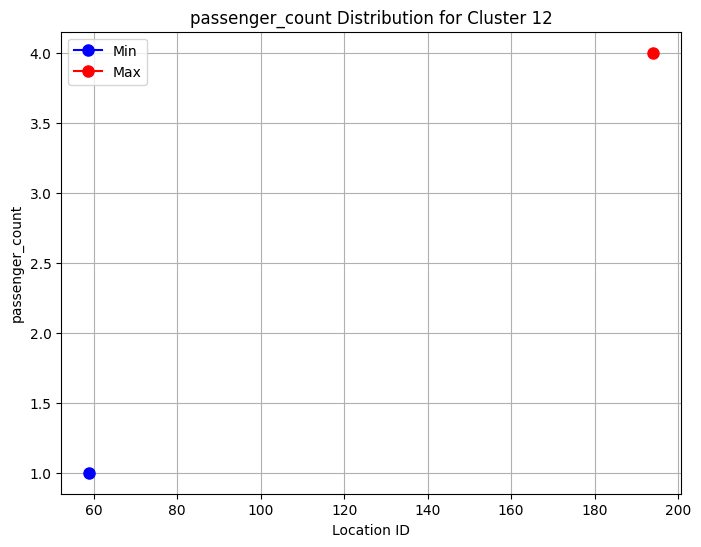

Cluster 13:
 Location ID of Minimum frequency : 69.0, Value: 1.0
 Location ID of Maximum frequency : 225.0, Value: 2.0


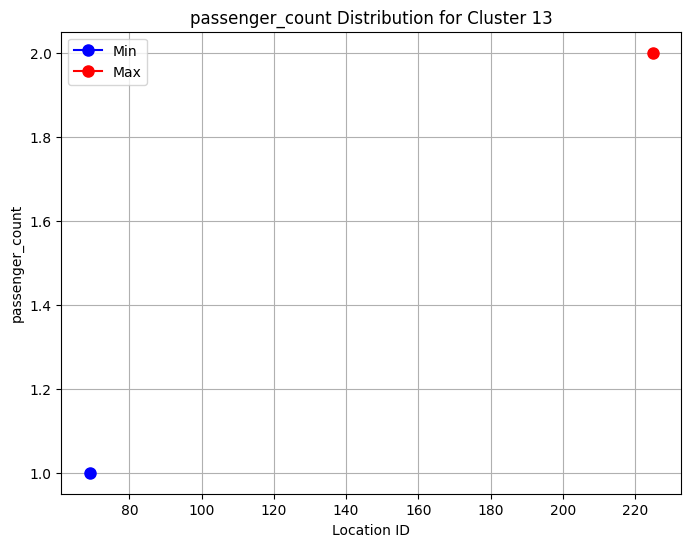

Cluster 14:
 Location ID of Minimum frequency : 161.0, Value: 1.0
 Location ID of Maximum frequency : 72.0, Value: 2.0


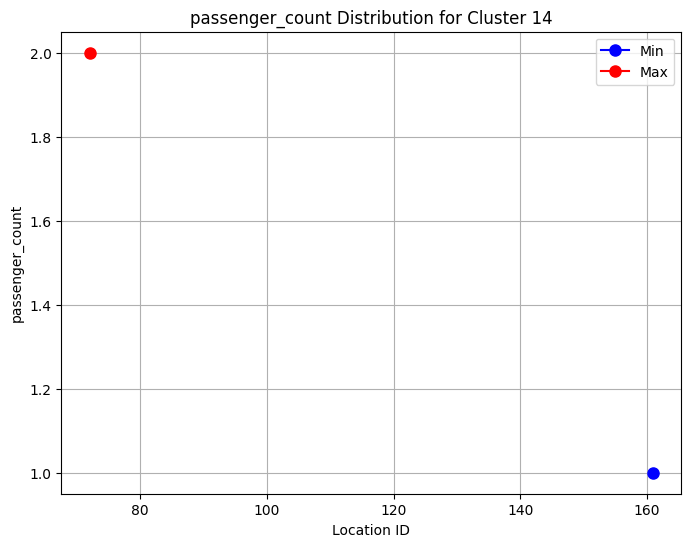

Cluster 15:
 Location ID of Minimum frequency : 170.0, Value: 1.0
 Location ID of Maximum frequency : 198.0, Value: 3.0


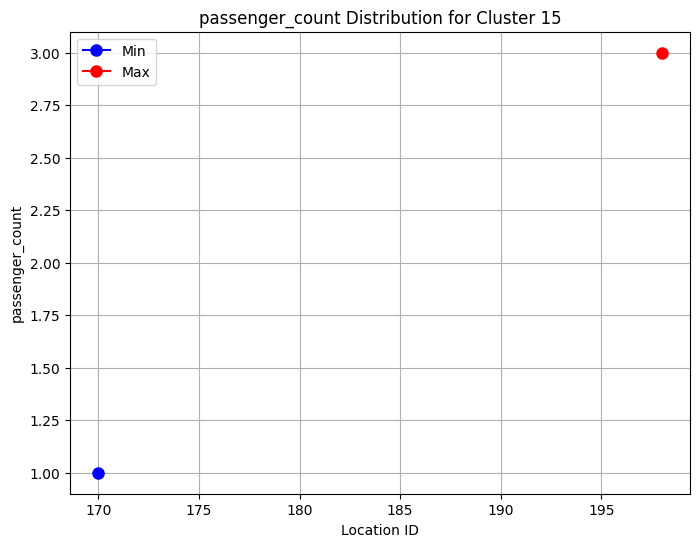

Cluster 16:
 Location ID of Minimum frequency : 97.0, Value: 1.0
 Location ID of Maximum frequency : 97.0, Value: 1.0


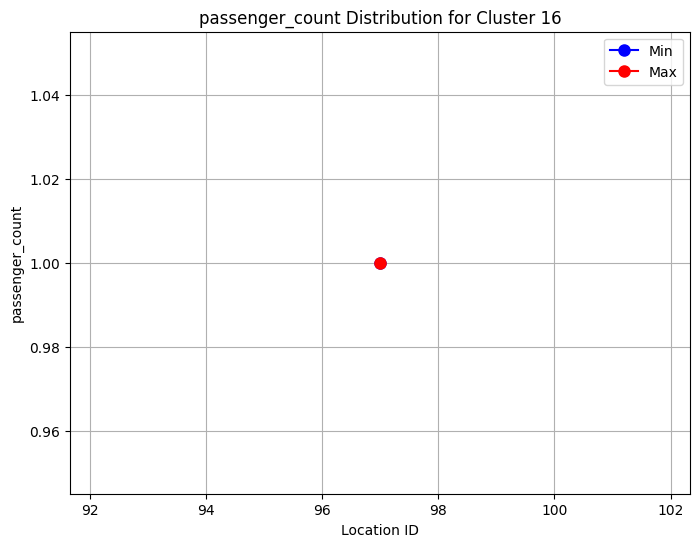

Cluster 17:
 Location ID of Minimum frequency : 51.0, Value: 1.0
 Location ID of Maximum frequency : 52.0, Value: 2.0


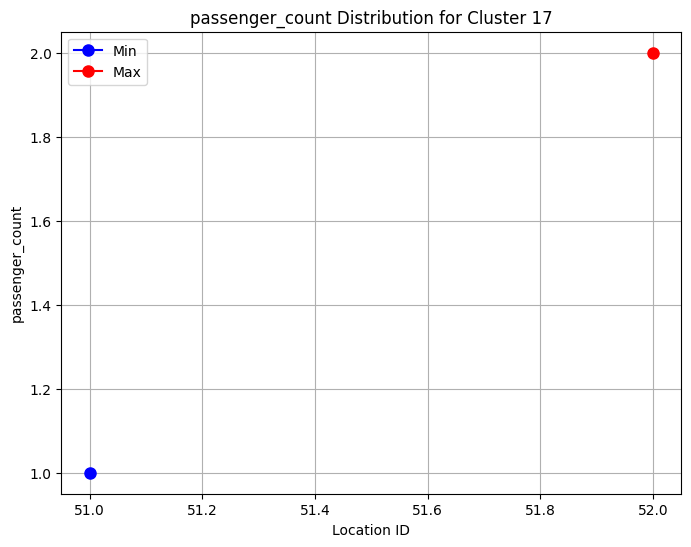

Feature: trip_distance
Cluster -1:
 Location ID of Minimum frequency : 62.0, Value: 0.03
 Location ID of Maximum frequency : 176.0, Value: 20.37


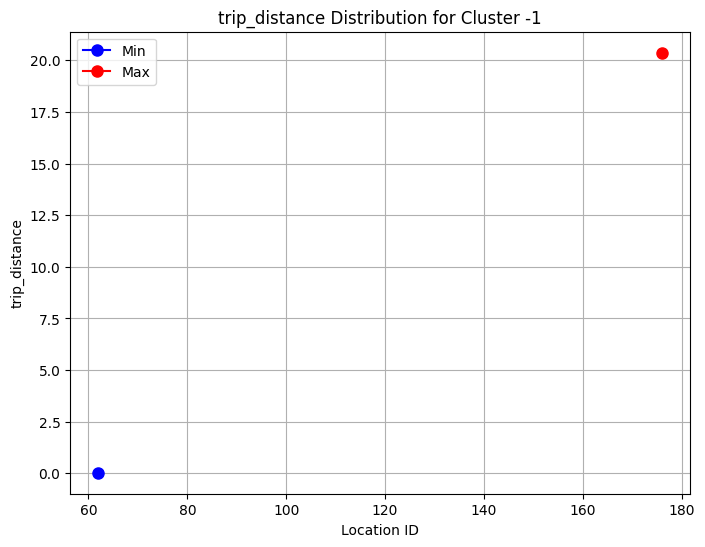

Cluster 0:
 Location ID of Minimum frequency : 1.0, Value: 0.97
 Location ID of Maximum frequency : 262.0, Value: 1.6


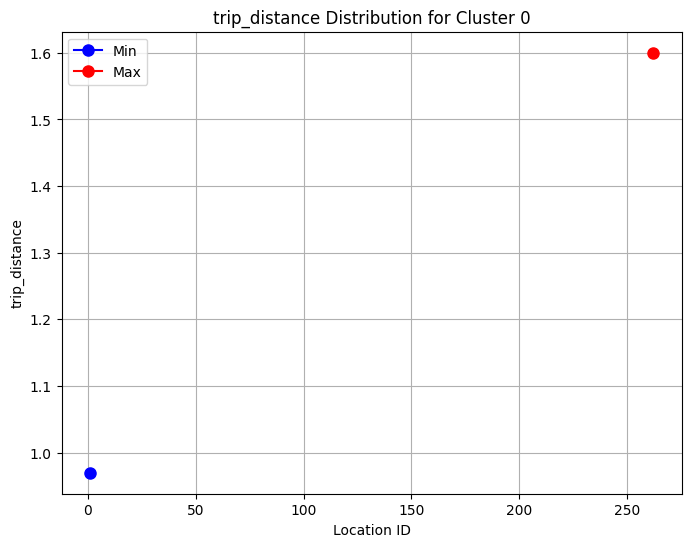

Cluster 1:
 Location ID of Minimum frequency : 85.0, Value: 0.64
 Location ID of Maximum frequency : 94.0, Value: 1.4


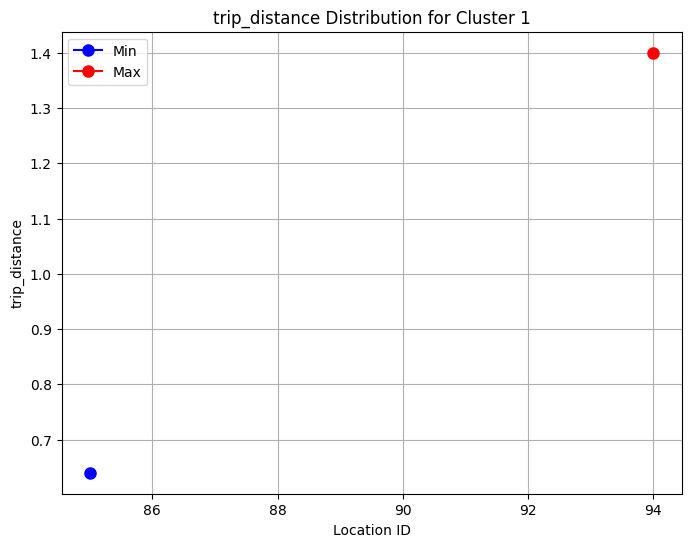

Cluster 2:
 Location ID of Minimum frequency : 3.0, Value: 2.51
 Location ID of Maximum frequency : 74.0, Value: 2.79


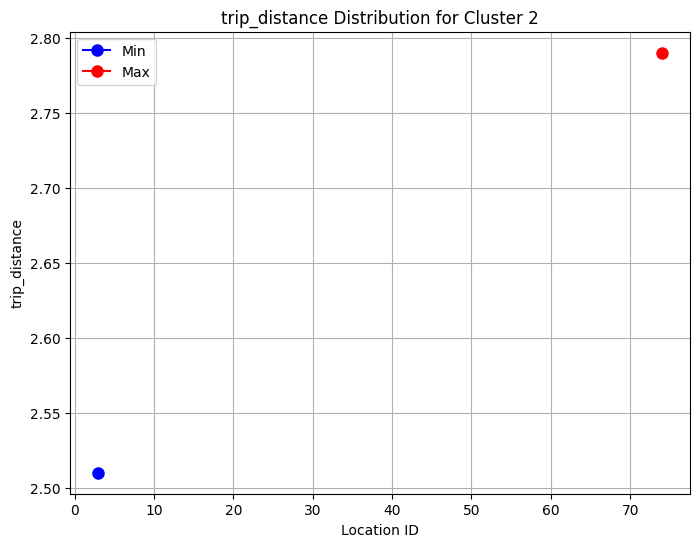

Cluster 3:
 Location ID of Minimum frequency : 63.0, Value: 1.38
 Location ID of Maximum frequency : 195.0, Value: 2.28


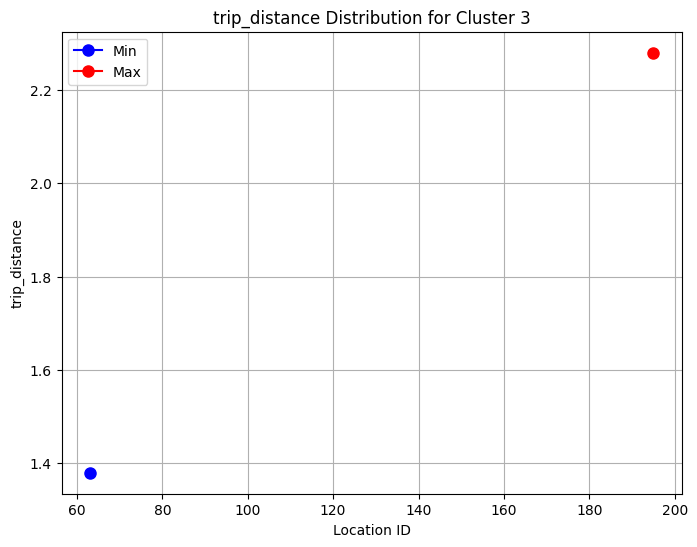

Cluster 4:
 Location ID of Minimum frequency : 190.0, Value: 1.4
 Location ID of Maximum frequency : 210.0, Value: 2.15


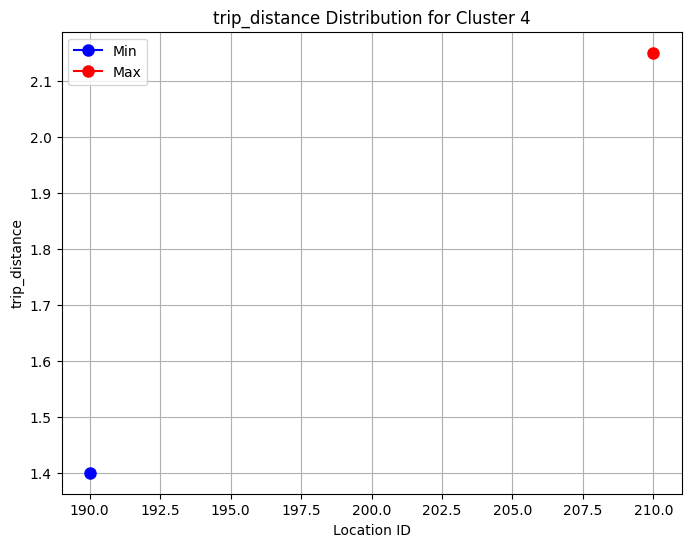

Cluster 5:
 Location ID of Minimum frequency : 113.0, Value: 1.75
 Location ID of Maximum frequency : 260.0, Value: 2.0


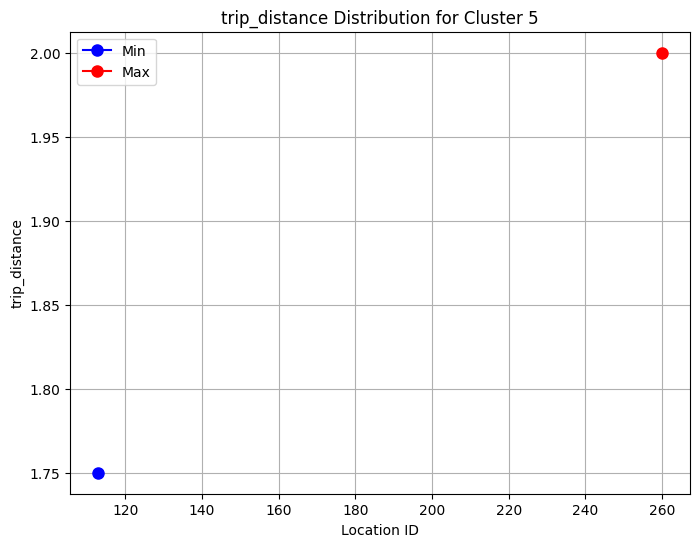

Cluster 6:
 Location ID of Minimum frequency : 165.0, Value: 1.32
 Location ID of Maximum frequency : 255.0, Value: 1.73


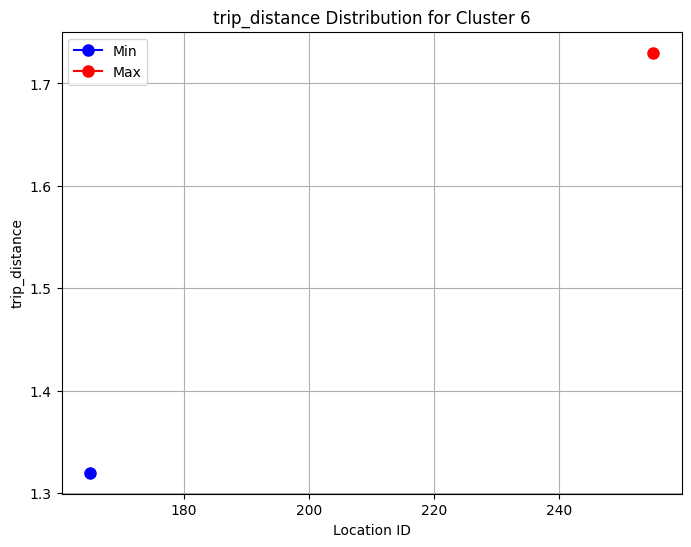

Cluster 7:
 Location ID of Minimum frequency : 23.0, Value: 0.8
 Location ID of Maximum frequency : 229.0, Value: 1.58


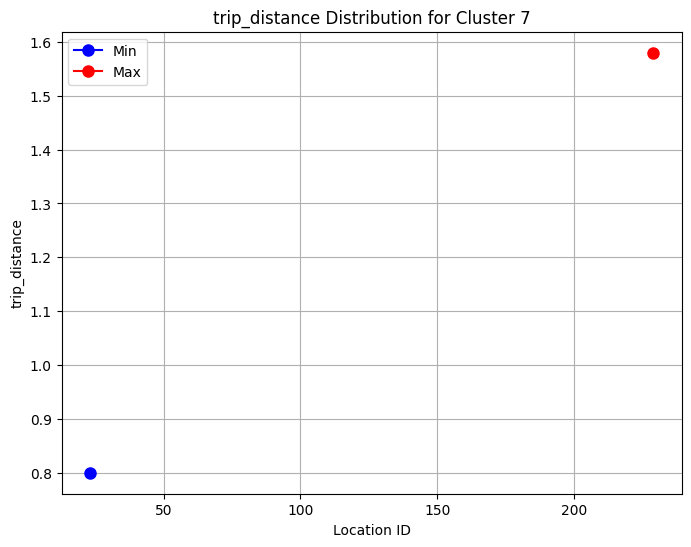

Cluster 8:
 Location ID of Minimum frequency : 50.0, Value: 0.2
 Location ID of Maximum frequency : 29.0, Value: 0.7


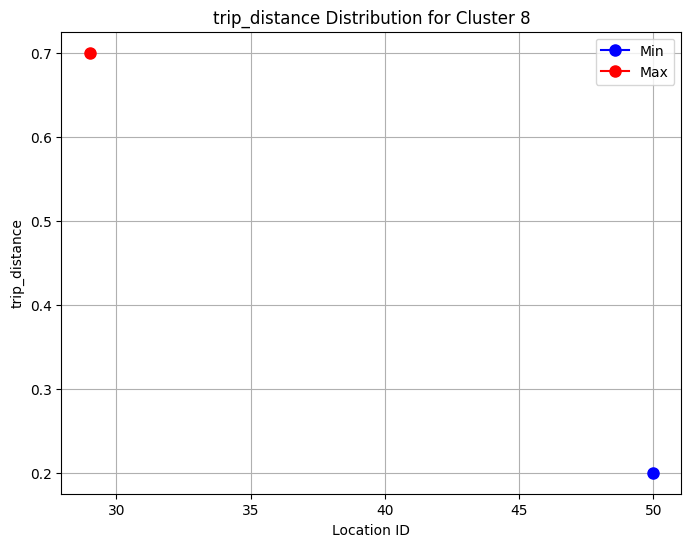

Cluster 9:
 Location ID of Minimum frequency : 141.0, Value: 1.21
 Location ID of Maximum frequency : 128.0, Value: 1.91


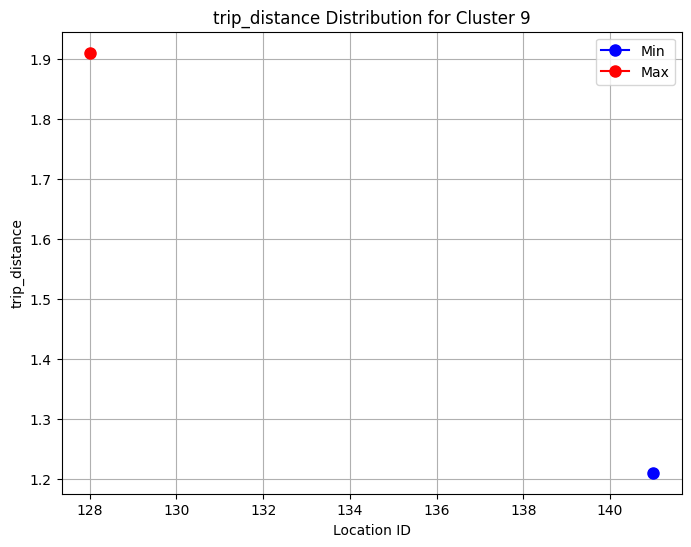

Cluster 10:
 Location ID of Minimum frequency : 146.0, Value: 0.44
 Location ID of Maximum frequency : 46.0, Value: 0.82


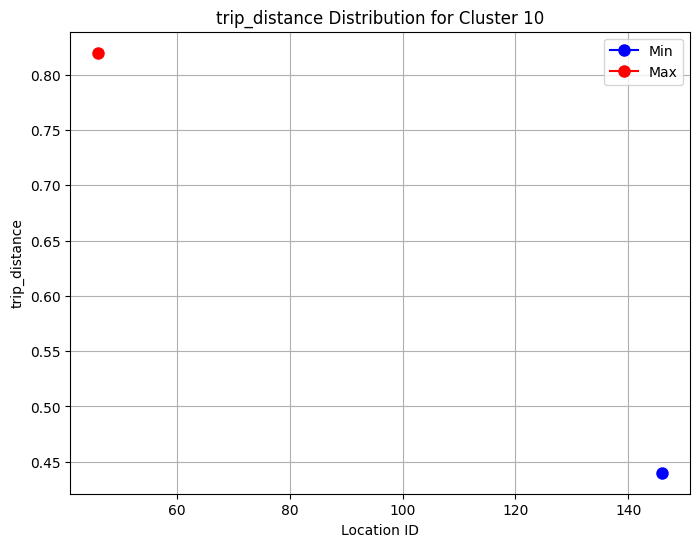

Cluster 11:
 Location ID of Minimum frequency : 64.0, Value: 2.04
 Location ID of Maximum frequency : 192.0, Value: 2.7


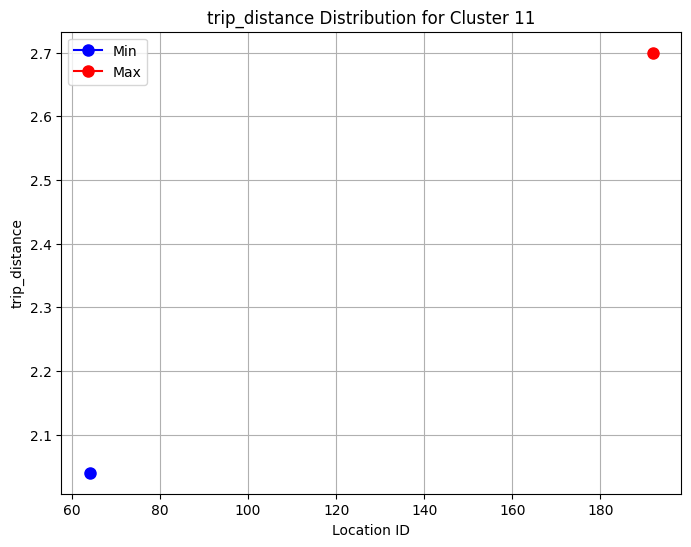

Cluster 12:
 Location ID of Minimum frequency : 232.0, Value: 0.69
 Location ID of Maximum frequency : 231.0, Value: 1.12


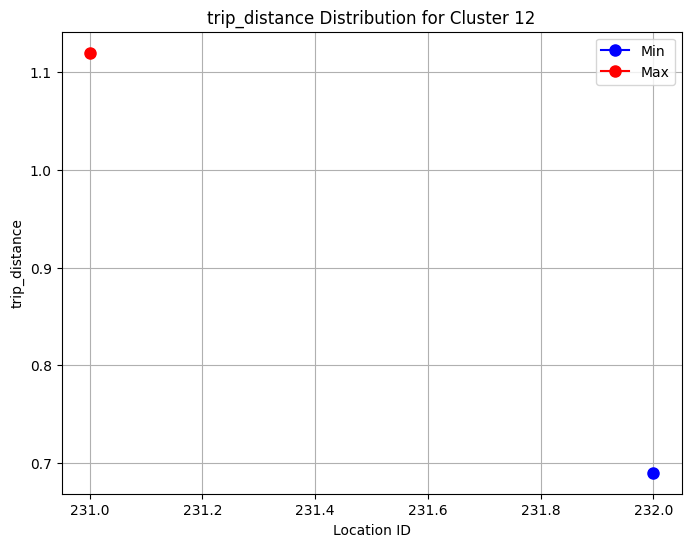

Cluster 13:
 Location ID of Minimum frequency : 237.0, Value: 0.38
 Location ID of Maximum frequency : 225.0, Value: 1.1


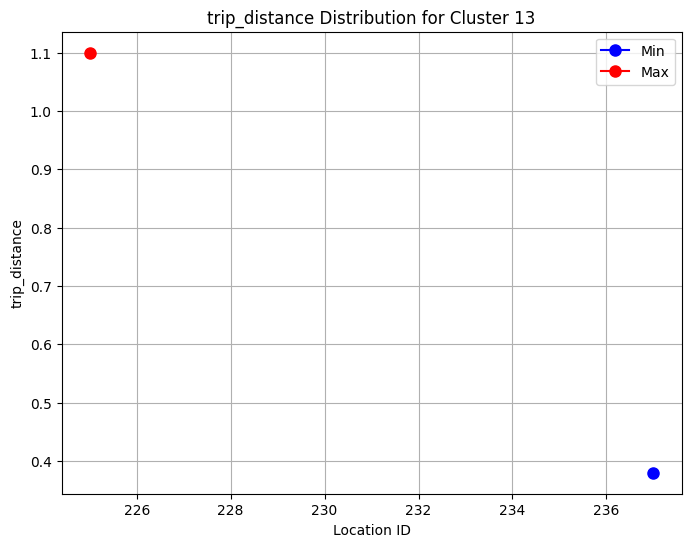

Cluster 14:
 Location ID of Minimum frequency : 207.0, Value: 0.29
 Location ID of Maximum frequency : 161.0, Value: 0.48


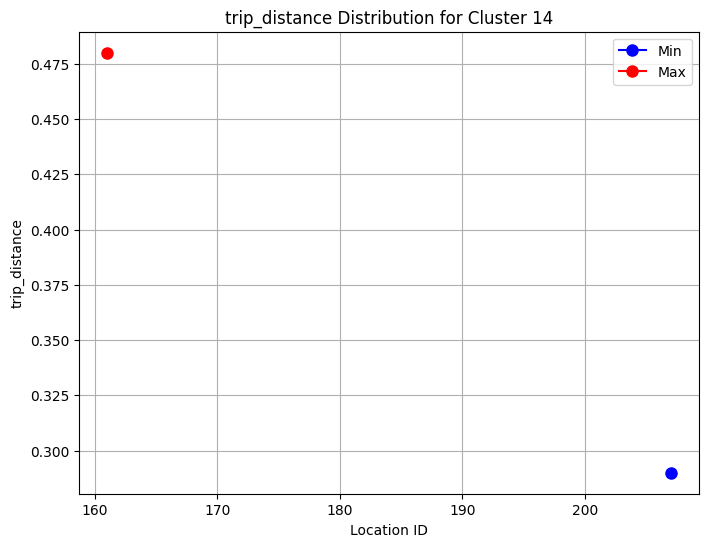

Cluster 15:
 Location ID of Minimum frequency : 198.0, Value: 1.9
 Location ID of Maximum frequency : 120.0, Value: 2.73


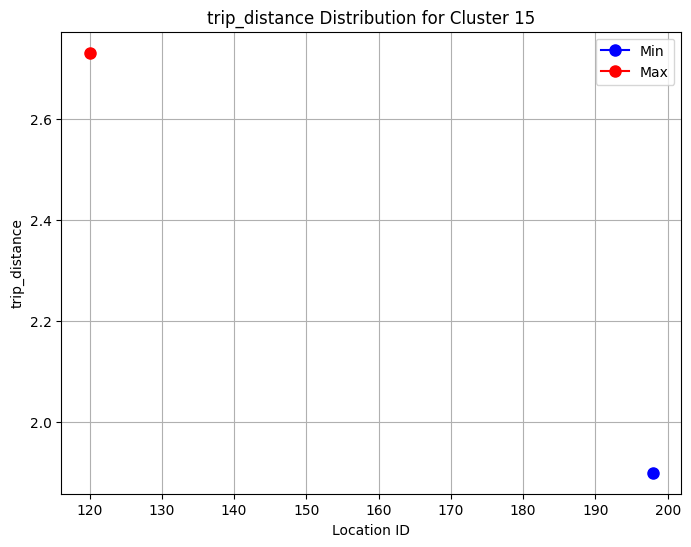

Cluster 16:
 Location ID of Minimum frequency : 97.0, Value: 0.08
 Location ID of Maximum frequency : 97.0, Value: 0.08


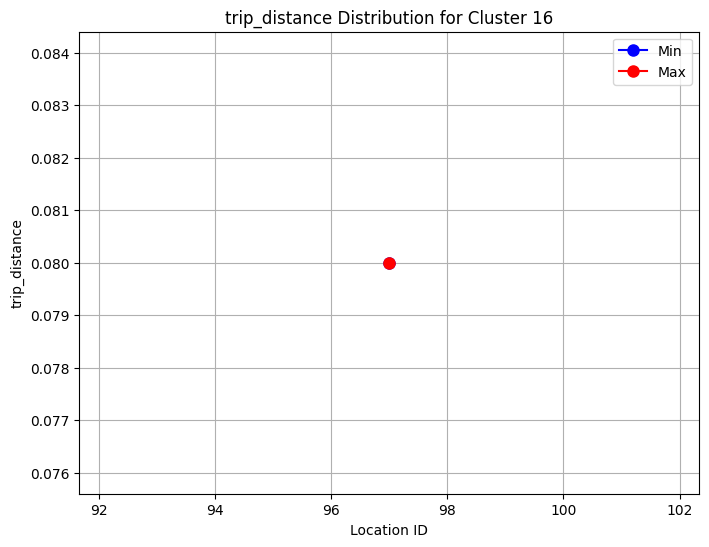

Cluster 17:
 Location ID of Minimum frequency : 51.0, Value: 2.4
 Location ID of Maximum frequency : 131.0, Value: 3.07


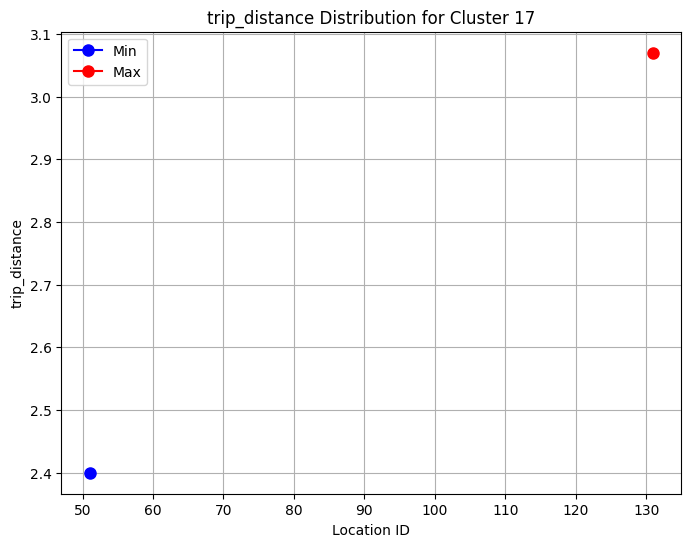

Feature: fare_amount
Cluster -1:
 Location ID of Minimum frequency : 139.0, Value: -5.1
 Location ID of Maximum frequency : 233.0, Value: 82.8


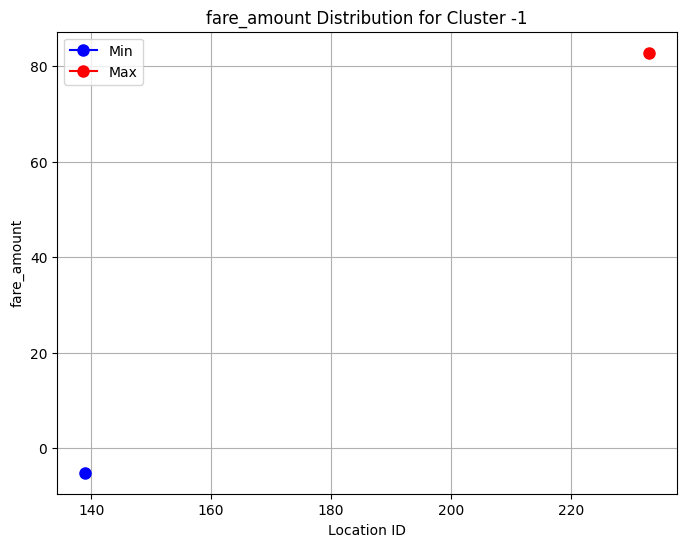

Cluster 0:
 Location ID of Minimum frequency : 1.0, Value: 9.3
 Location ID of Maximum frequency : 1.0, Value: 9.3


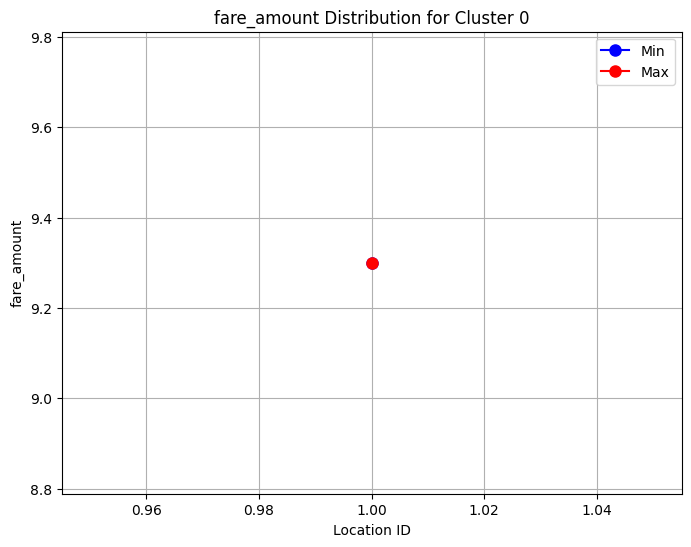

Cluster 1:
 Location ID of Minimum frequency : 2.0, Value: 7.9
 Location ID of Maximum frequency : 2.0, Value: 7.9


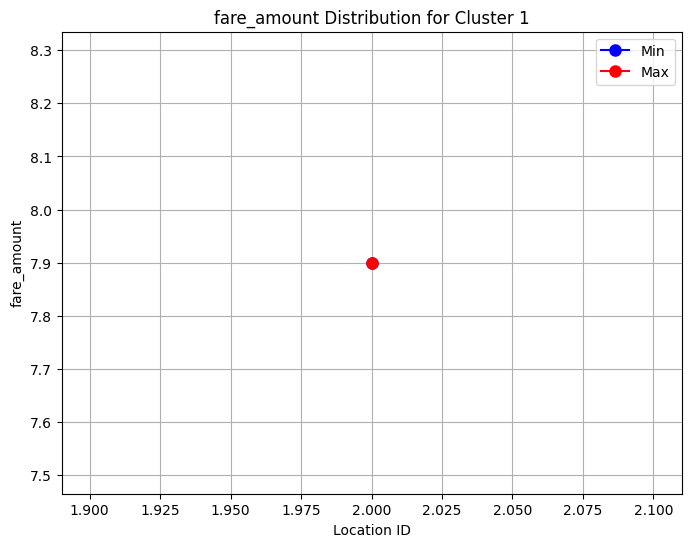

Cluster 2:
 Location ID of Minimum frequency : 3.0, Value: 14.9
 Location ID of Maximum frequency : 3.0, Value: 14.9


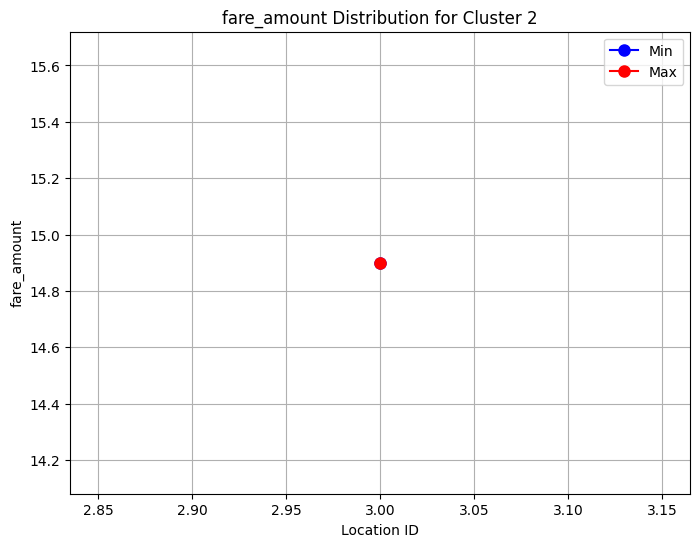

Cluster 3:
 Location ID of Minimum frequency : 4.0, Value: 12.1
 Location ID of Maximum frequency : 4.0, Value: 12.1


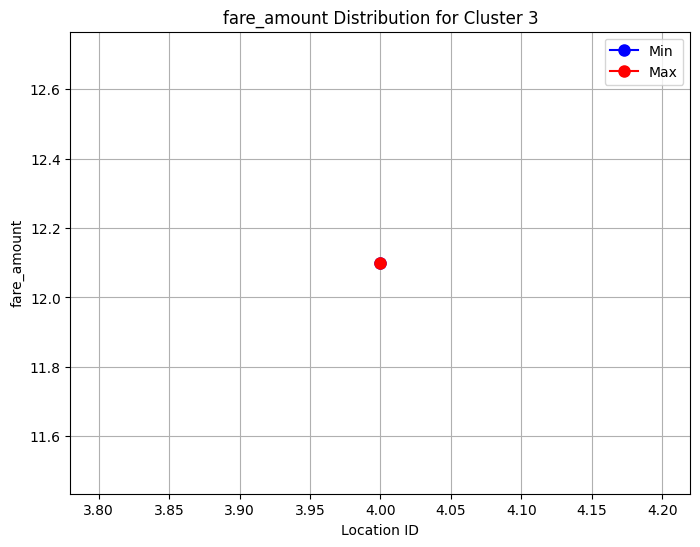

Cluster 4:
 Location ID of Minimum frequency : 5.0, Value: 11.4
 Location ID of Maximum frequency : 5.0, Value: 11.4


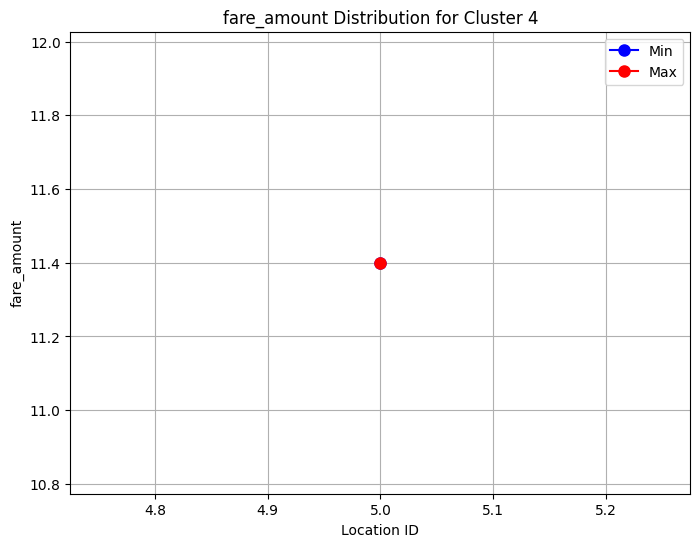

Cluster 5:
 Location ID of Minimum frequency : 6.0, Value: 12.8
 Location ID of Maximum frequency : 6.0, Value: 12.8


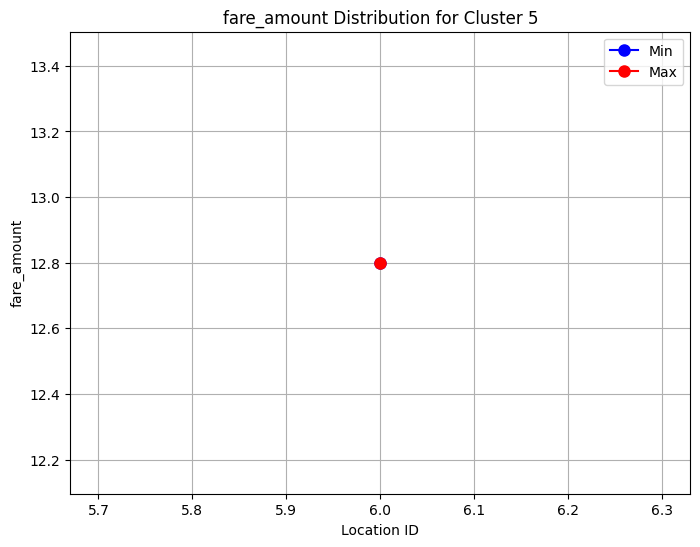

Cluster 6:
 Location ID of Minimum frequency : 16.0, Value: 10.0
 Location ID of Maximum frequency : 16.0, Value: 10.0


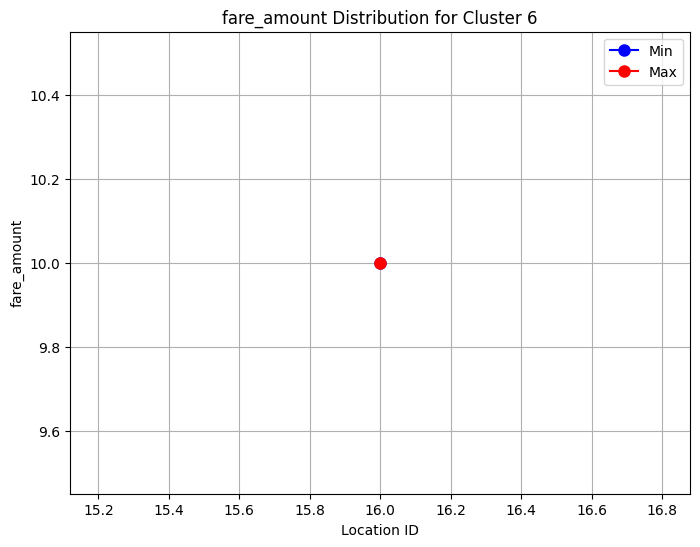

Cluster 7:
 Location ID of Minimum frequency : 19.0, Value: 8.6
 Location ID of Maximum frequency : 19.0, Value: 8.6


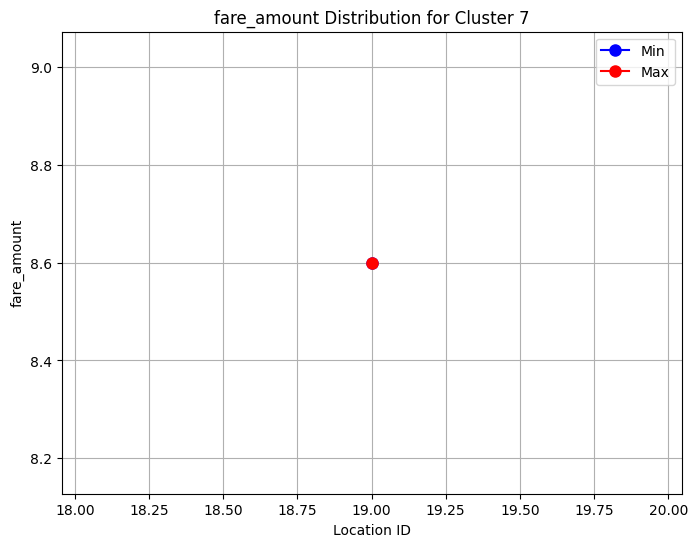

Cluster 8:
 Location ID of Minimum frequency : 29.0, Value: 5.1
 Location ID of Maximum frequency : 29.0, Value: 5.1


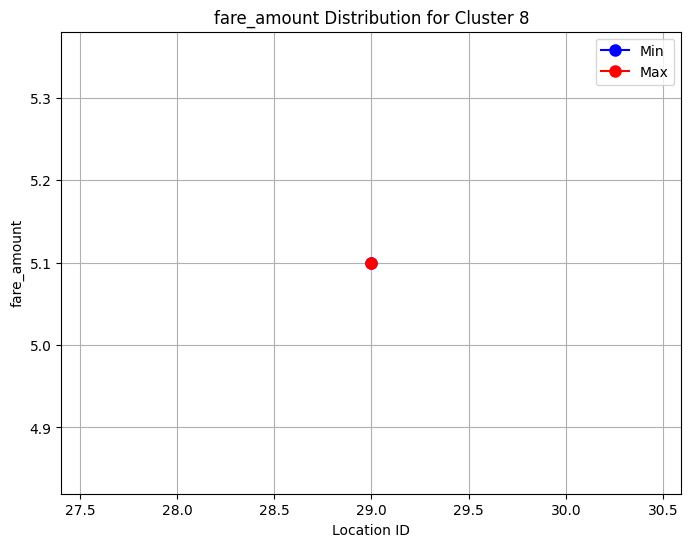

Cluster 9:
 Location ID of Minimum frequency : 41.0, Value: 10.7
 Location ID of Maximum frequency : 41.0, Value: 10.7


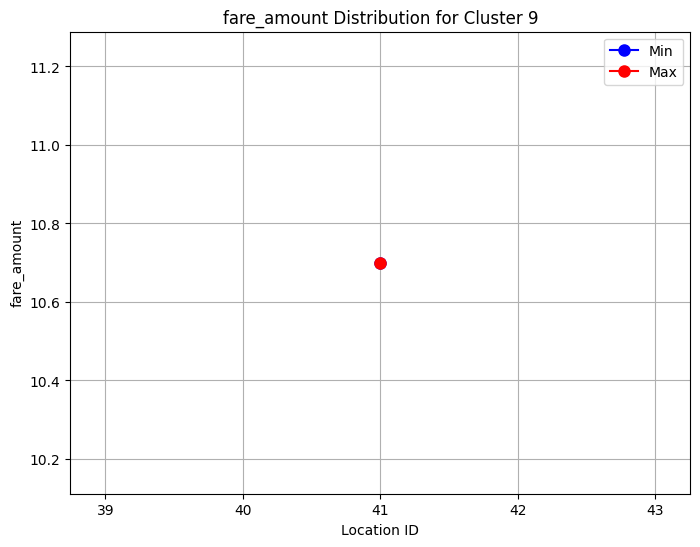

Cluster 10:
 Location ID of Minimum frequency : 44.0, Value: 5.8
 Location ID of Maximum frequency : 44.0, Value: 5.8


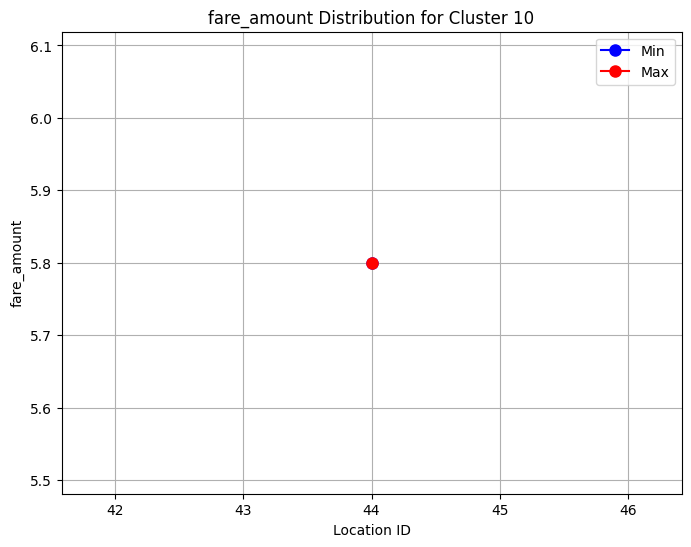

Cluster 11:
 Location ID of Minimum frequency : 28.0, Value: 13.5
 Location ID of Maximum frequency : 28.0, Value: 13.5


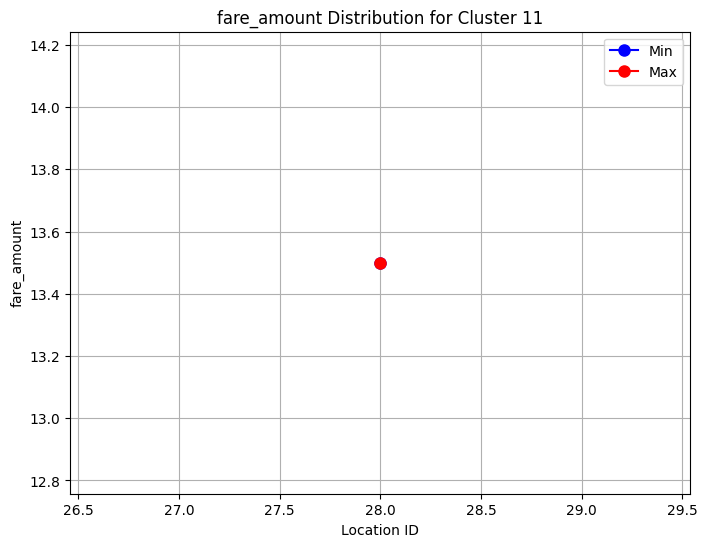

Cluster 12:
 Location ID of Minimum frequency : 59.0, Value: 7.2
 Location ID of Maximum frequency : 59.0, Value: 7.2


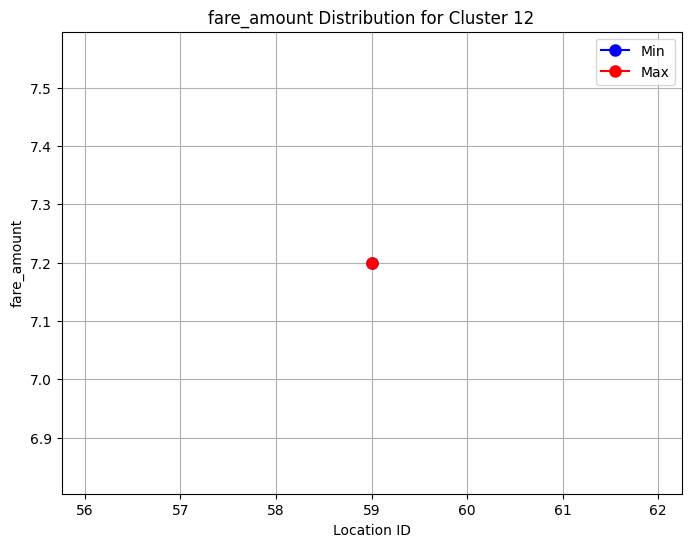

Cluster 13:
 Location ID of Minimum frequency : 69.0, Value: 6.5
 Location ID of Maximum frequency : 69.0, Value: 6.5


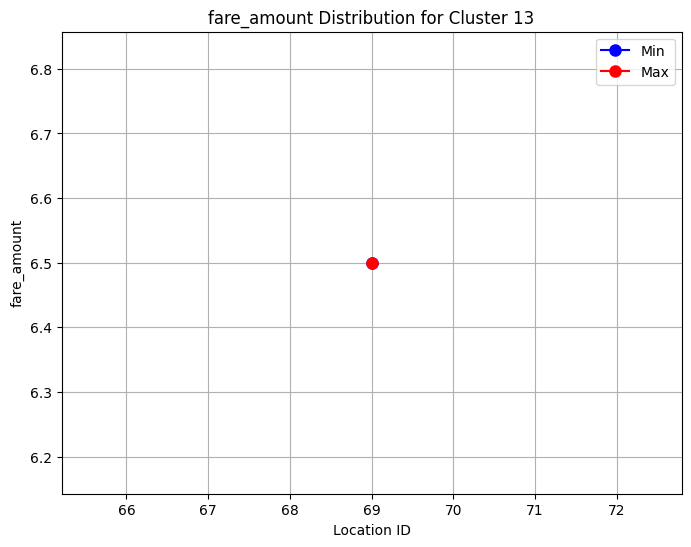

Cluster 14:
 Location ID of Minimum frequency : 72.0, Value: 4.4
 Location ID of Maximum frequency : 72.0, Value: 4.4


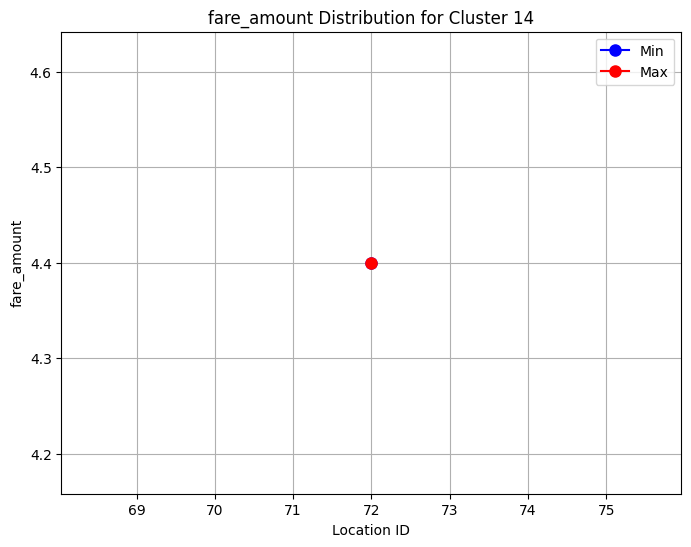

Cluster 15:
 Location ID of Minimum frequency : 120.0, Value: 14.2
 Location ID of Maximum frequency : 120.0, Value: 14.2


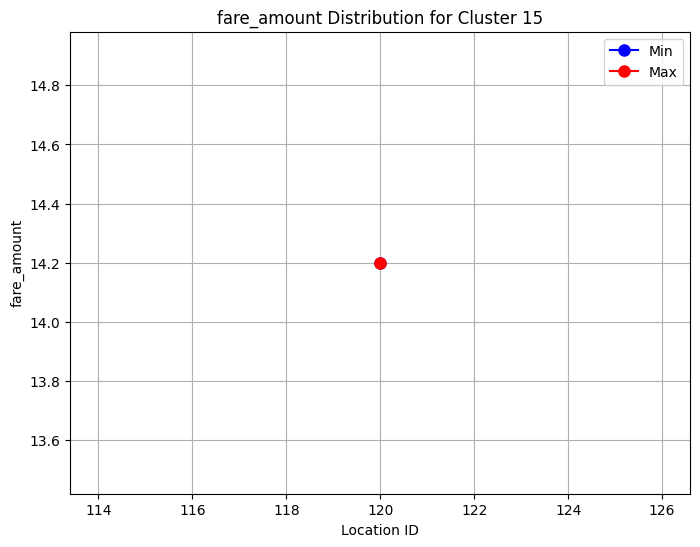

Cluster 16:
 Location ID of Minimum frequency : 97.0, Value: 3.0
 Location ID of Maximum frequency : 97.0, Value: 3.0


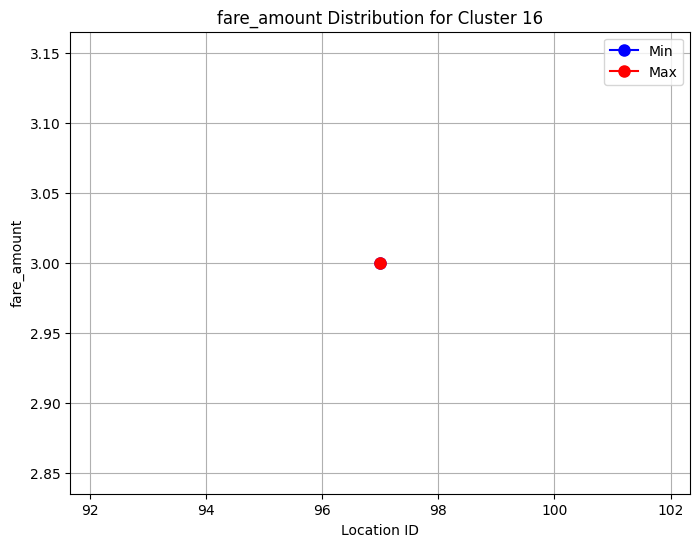

Cluster 17:
 Location ID of Minimum frequency : 51.0, Value: 15.6
 Location ID of Maximum frequency : 51.0, Value: 15.6


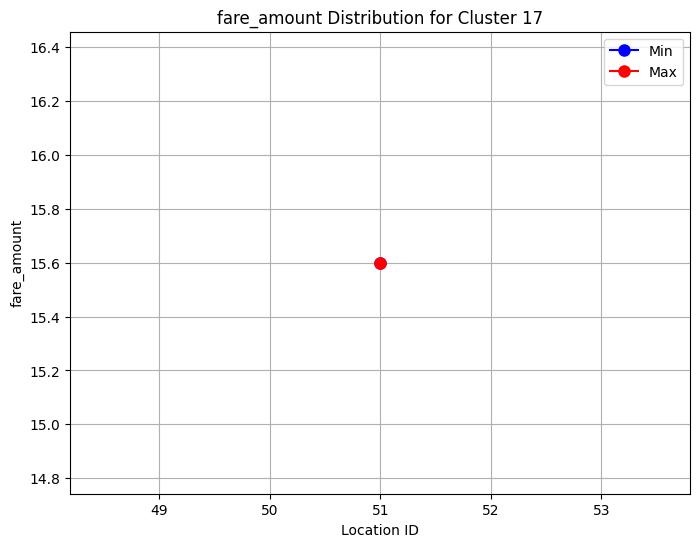

Feature: trip_duration_minutes
Cluster -1:
 Location ID of Minimum frequency : 62.0, Value: 0.85
 Location ID of Maximum frequency : 60.0, Value: 68.1


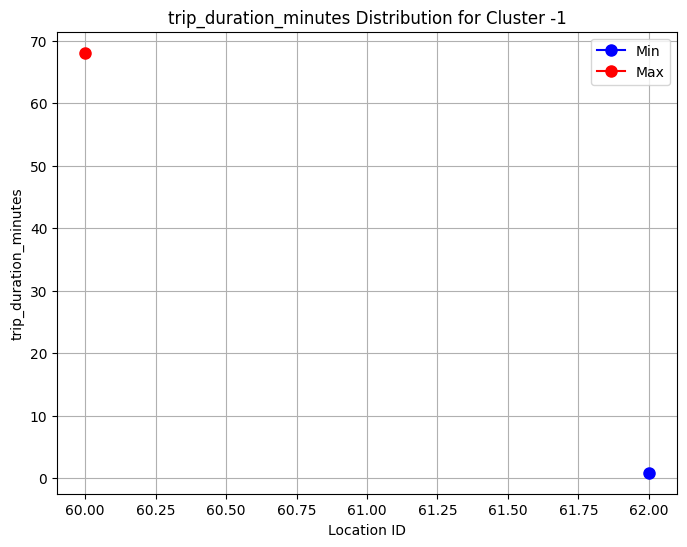

Cluster 0:
 Location ID of Minimum frequency : 21.0, Value: 6.55
 Location ID of Maximum frequency : 1.0, Value: 8.433333333333334


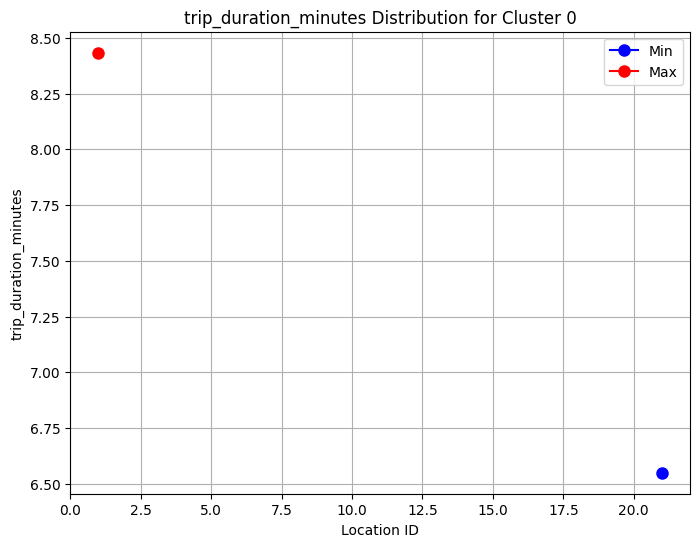

Cluster 1:
 Location ID of Minimum frequency : 94.0, Value: 4.533333333333333
 Location ID of Maximum frequency : 163.0, Value: 6.983333333333333


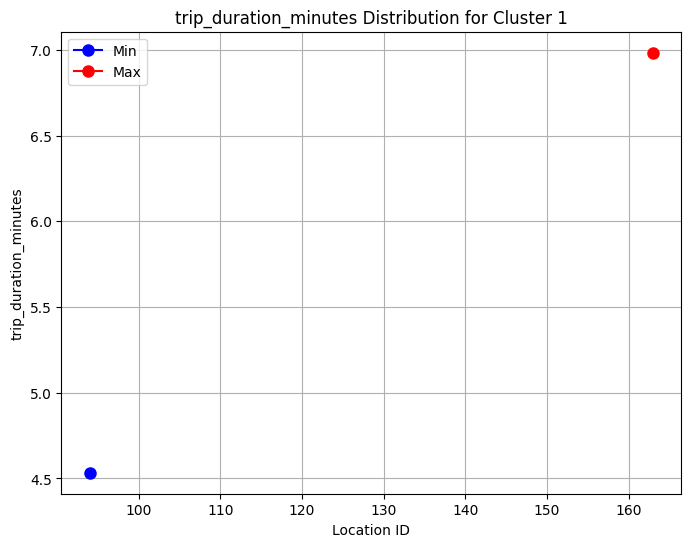

Cluster 2:
 Location ID of Minimum frequency : 3.0, Value: 12.75
 Location ID of Maximum frequency : 74.0, Value: 12.816666666666666


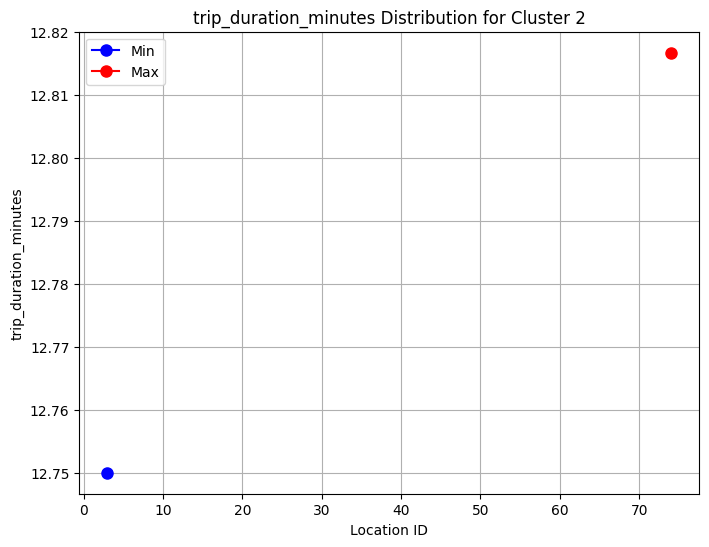

Cluster 3:
 Location ID of Minimum frequency : 195.0, Value: 9.0
 Location ID of Maximum frequency : 63.0, Value: 11.85


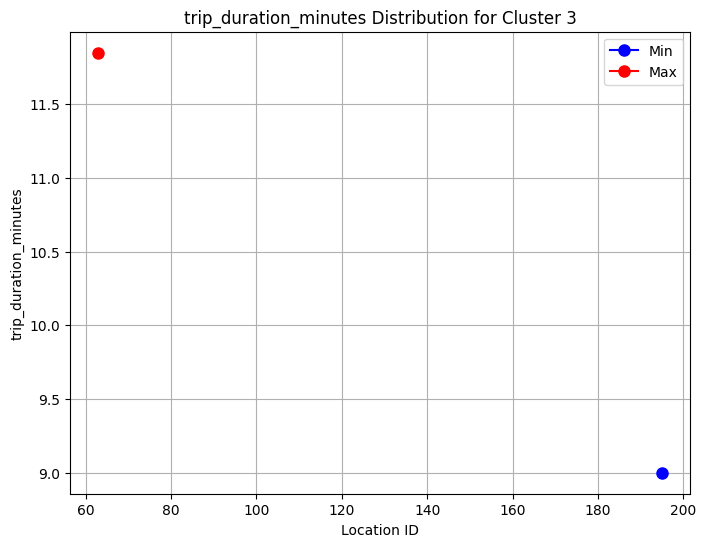

Cluster 4:
 Location ID of Minimum frequency : 148.0, Value: 8.316666666666666
 Location ID of Maximum frequency : 182.0, Value: 10.883333333333333


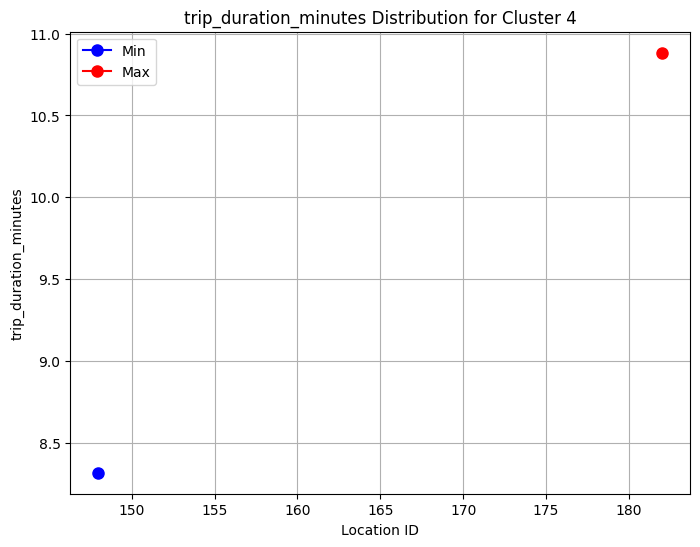

Cluster 5:
 Location ID of Minimum frequency : 260.0, Value: 11.25
 Location ID of Maximum frequency : 6.0, Value: 12.3


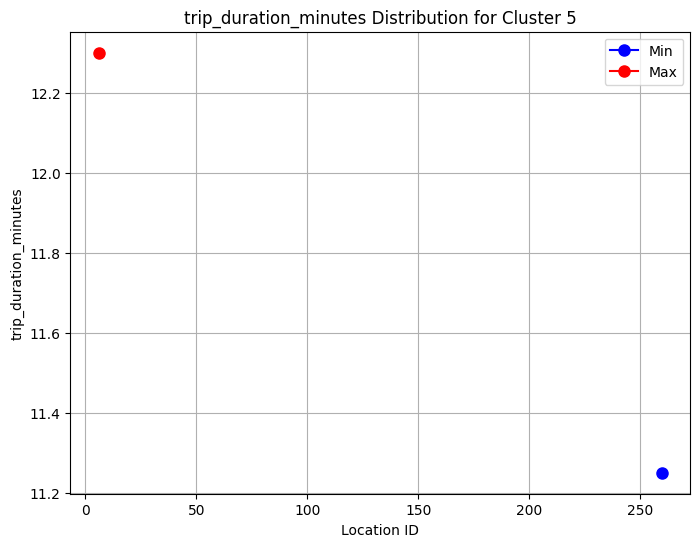

Cluster 6:
 Location ID of Minimum frequency : 255.0, Value: 6.4
 Location ID of Maximum frequency : 184.0, Value: 9.766666666666667


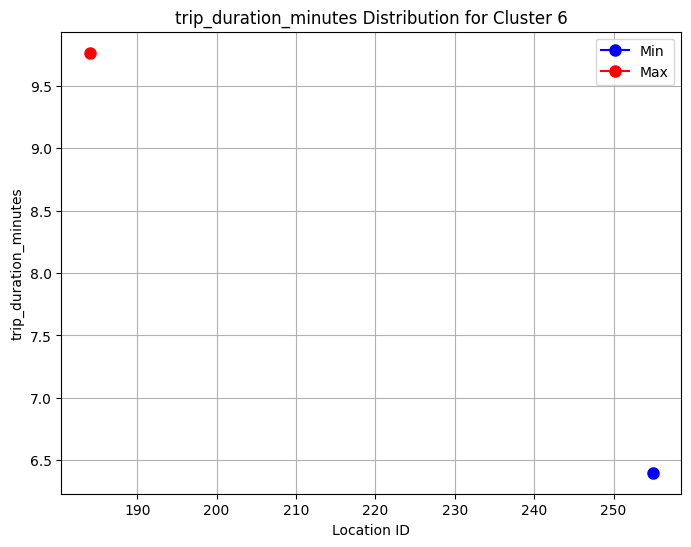

Cluster 7:
 Location ID of Minimum frequency : 171.0, Value: 5.283333333333333
 Location ID of Maximum frequency : 227.0, Value: 7.816666666666666


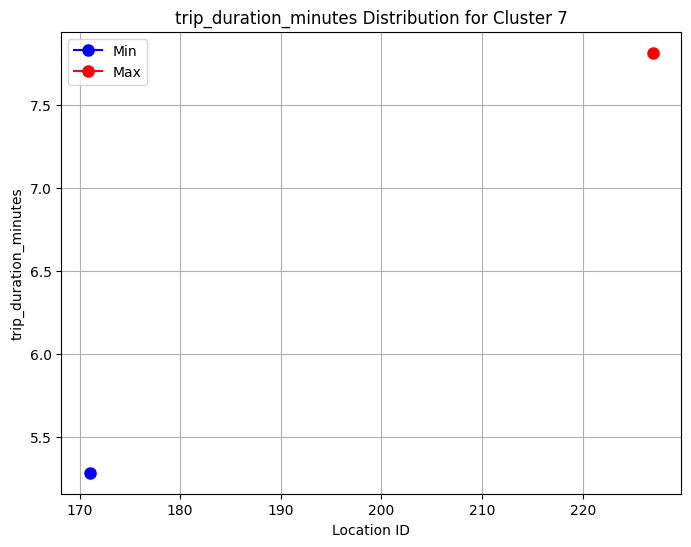

Cluster 8:
 Location ID of Minimum frequency : 78.0, Value: 2.066666666666667
 Location ID of Maximum frequency : 50.0, Value: 3.5


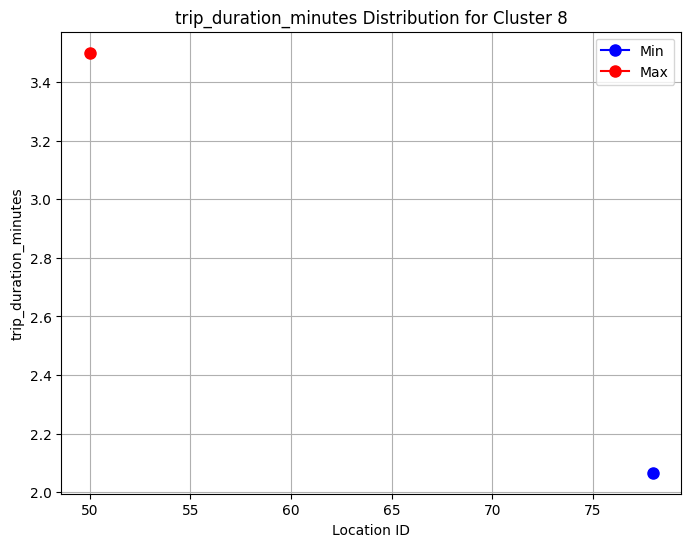

Cluster 9:
 Location ID of Minimum frequency : 242.0, Value: 7.05
 Location ID of Maximum frequency : 209.0, Value: 10.416666666666666


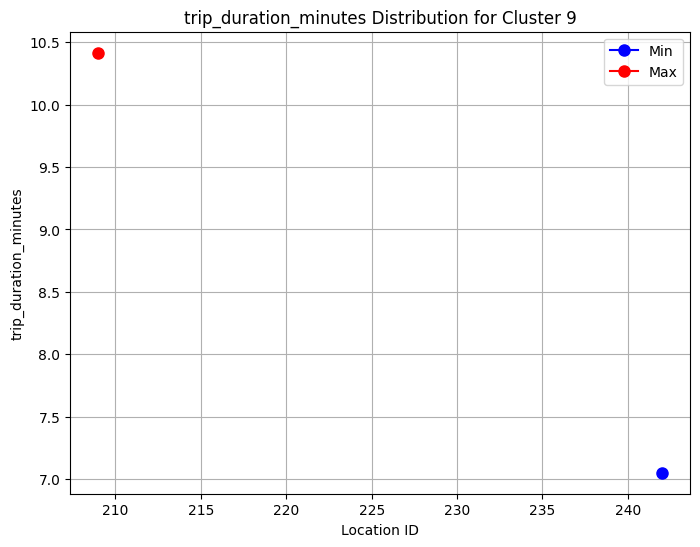

Cluster 10:
 Location ID of Minimum frequency : 261.0, Value: 2.683333333333333
 Location ID of Maximum frequency : 137.0, Value: 4.183333333333334


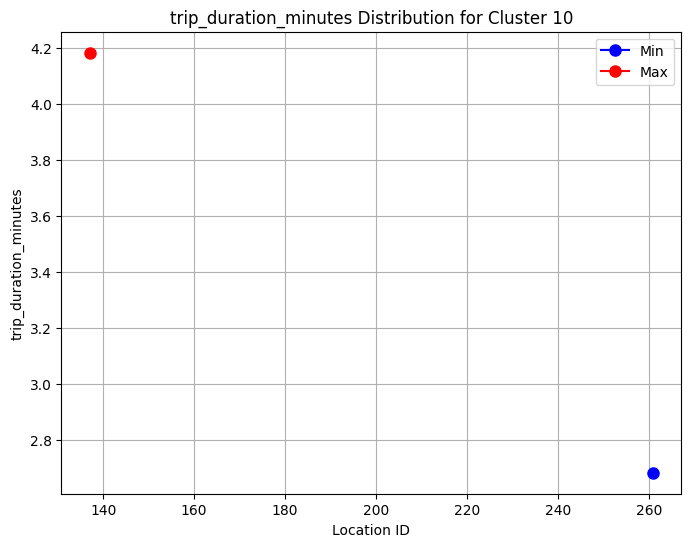

Cluster 11:
 Location ID of Minimum frequency : 56.0, Value: 10.383333333333333
 Location ID of Maximum frequency : 28.0, Value: 12.783333333333333


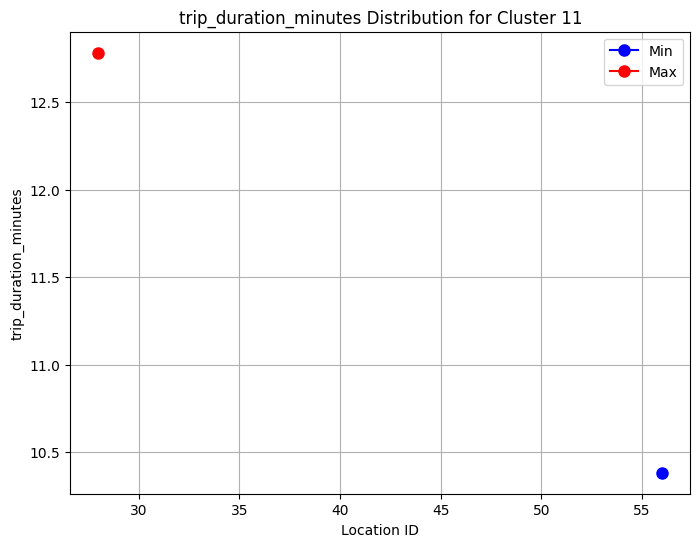

Cluster 12:
 Location ID of Minimum frequency : 95.0, Value: 3.8833333333333333
 Location ID of Maximum frequency : 187.0, Value: 6.416666666666667


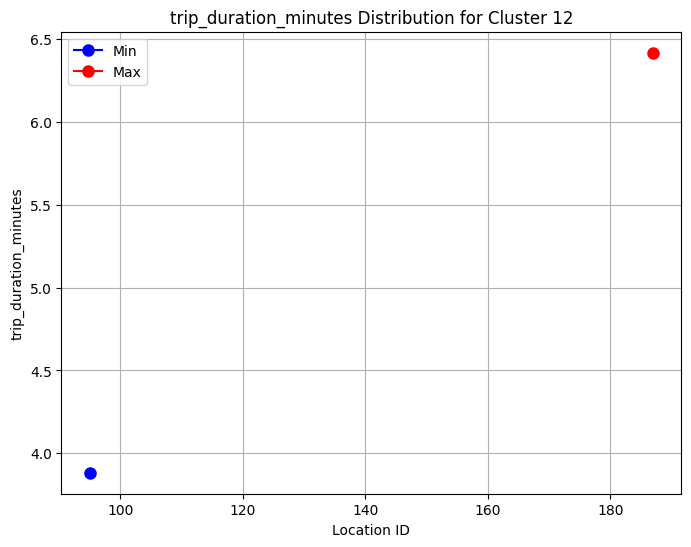

Cluster 13:
 Location ID of Minimum frequency : 166.0, Value: 2.8833333333333333
 Location ID of Maximum frequency : 237.0, Value: 5.6


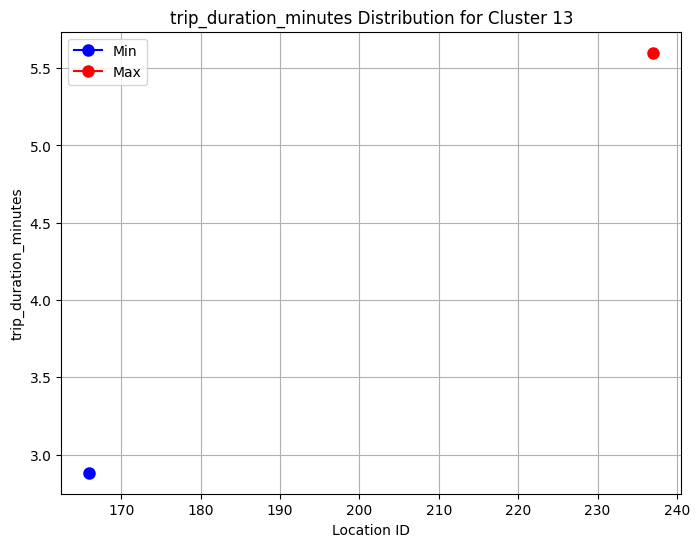

Cluster 14:
 Location ID of Minimum frequency : 167.0, Value: 1.6
 Location ID of Maximum frequency : 207.0, Value: 2.683333333333333


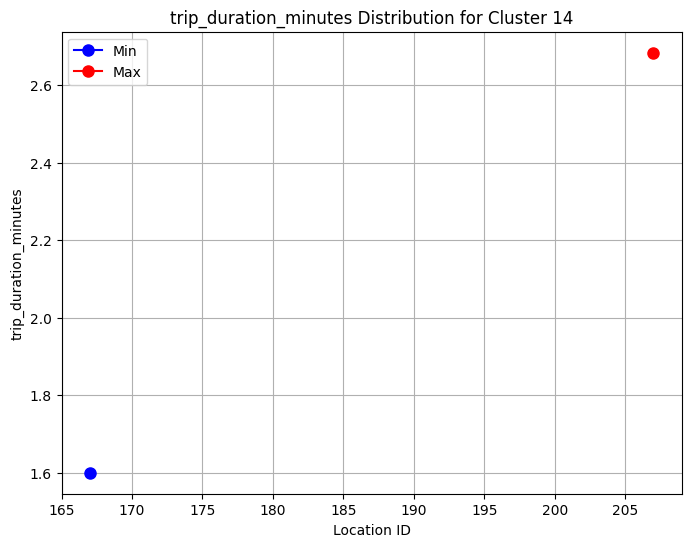

Cluster 15:
 Location ID of Minimum frequency : 120.0, Value: 11.35
 Location ID of Maximum frequency : 198.0, Value: 13.383333333333333


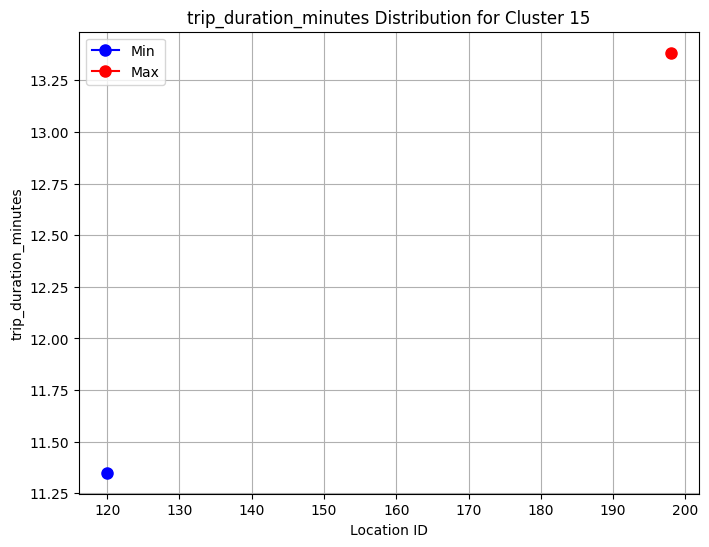

Cluster 16:
 Location ID of Minimum frequency : 97.0, Value: 0.8
 Location ID of Maximum frequency : 97.0, Value: 0.8


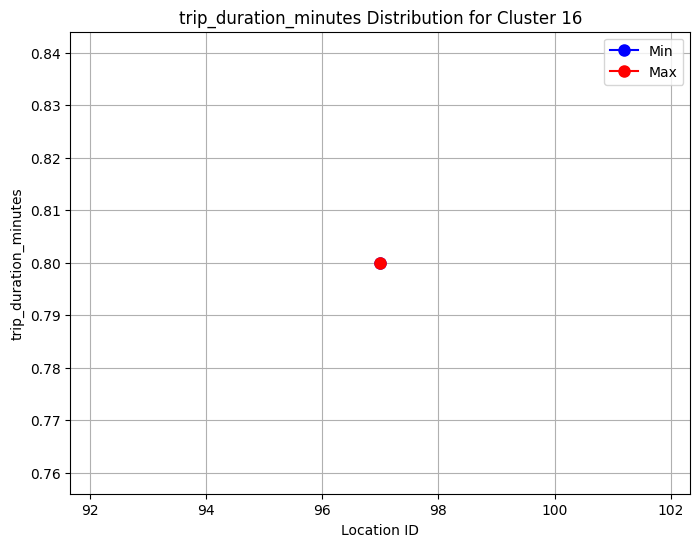

Cluster 17:
 Location ID of Minimum frequency : 52.0, Value: 13.083333333333334
 Location ID of Maximum frequency : 51.0, Value: 14.033333333333333


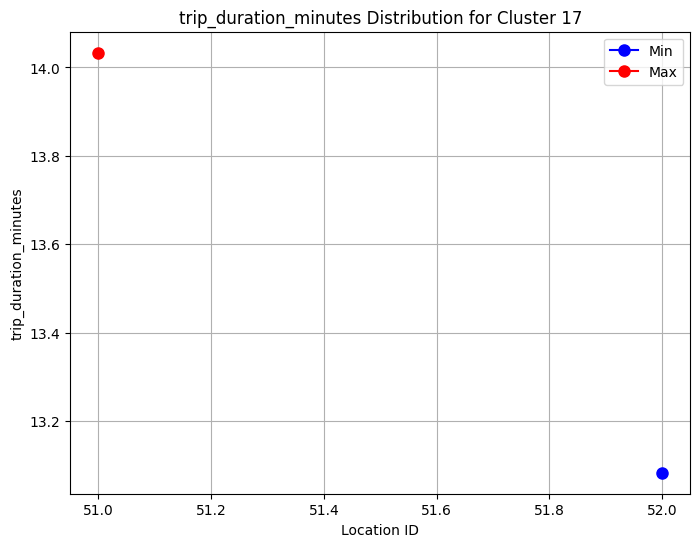

In [31]:
# Performing the analysis for each cluster
for feature, values in min_max_values.items():
    print(f"Feature: {feature}")
    for cluster, min_max in values.items():
        min_location_id, min_value = min_max['min']
        max_location_id, max_value = min_max['max']
        print(f"Cluster {cluster}:")
        print(f" Location ID of Minimum frequency : {min_location_id}, Value: {min_value}")
        print(f" Location ID of Maximum frequency : {max_location_id}, Value: {max_value}")
        print("="*50)

        # Plotting scatter plot for each cluster to show max-min values of each features.
        plt.figure(figsize=(8, 6))
        plt.plot(min_location_id, min_value, marker='o', markersize=8, label='Min', color='blue')
        plt.plot(max_location_id, max_value, marker='o', markersize=8, label='Max', color='red')
        plt.title(f'{feature} Distribution for Cluster {cluster}')
        plt.xlabel('Location ID')
        plt.ylabel(feature)
        plt.grid(True)
        plt.legend()
        plt.show()



# INSIGHTS
**SHOWING MAXIMUM AND MINIMUM VALUES OF FEATURES ACROSS ALL CITIES
BASED ON FEATURES AS PASSENGER_COUNT', 'TRIP_DISTANCE', 'FARE_AMOUNT', 'TIP_AMOUNT' -**

**ALSO SHOWING FREQUENCIES OF EACH FEATURES**


In [38]:
import geopandas as gpd
import pandas as pd
# Initialize min_max_values dictionary with keys for min and max values of each feature
min_max_values = {
    'passenger_count': {'min': {'value': float('inf'), 'location': None}, 'max': {'value': float('-inf'), 'location': None}},
    'trip_distance': {'min': {'value': float('inf'), 'location': None}, 'max': {'value': float('-inf'), 'location': None}},
    'fare_amount': {'min': {'value': float('inf'), 'location': None}, 'max': {'value': float('-inf'), 'location': None}},
    'trip_duration_minutes': {'min': {'value': float('inf'), 'location': None}, 'max': {'value': float('-inf'), 'location': None}}
}

# Compute minimum and maximum values for each feature in each cluster
for cluster, location_ids in clusters.items():
    cluster_data = subset_parquet_df_read[subset_parquet_df_read['ULocationID'].isin(location_ids)]
    for feature in min_max_values.keys():
        min_value = cluster_data[feature].min()
        max_value = cluster_data[feature].max()
        if min_value < min_max_values[feature]['min']['value']:
            min_max_values[feature]['min']['value'] = min_value
            min_max_values[feature]['min']['location'] = cluster_data.loc[cluster_data[feature].idxmin(), 'ULocationID']
        if max_value > min_max_values[feature]['max']['value']:
            min_max_values[feature]['max']['value'] = max_value
            min_max_values[feature]['max']['location'] = cluster_data.loc[cluster_data[feature].idxmax(), 'ULocationID']

# Printing the maximum and minimum values for each feature among all clusters
for feature, values in min_max_values.items():
    max_location_id = values['max']['location']
    min_location_id = values['min']['location']
    max_city_name = map_of_india [map_of_india ['LocationID'] == max_location_id]['zone'].iloc[0]  # Assuming 'zone' contains the city name
    min_city_name = map_of_india [map_of_india ['LocationID'] == min_location_id]['zone'].iloc[0]  # Assuming 'zone' contains the city name
    print(f"Feature: {feature}")
    print(f"Maximum Value: Location ID: {max_location_id}, Value: {values['max']['value']}, City Name: {max_city_name}")
    print(f"Minimum Value: Location ID: {min_location_id}, Value: {values['min']['value']}, City Name: {min_city_name}")
    print("="*50)

# Calculating  average of all features
average_values = {feature: [] for feature in ['passenger_count','trip_distance', 'fare_amount', 'trip_duration_minutes']}
for cluster, location_ids in clusters.items():
    cluster_data = subset_parquet_df_read[subset_parquet_df_read['ULocationID'].isin(location_ids)]
    for feature in average_values.keys():
        average_values[feature].append(cluster_data[feature].mean())

# Printing result
print("Average Values:")
for feature, values in average_values.items():
    print(f"{feature}: {sum(values)/len(values)}")
print("="*50)


Feature: passenger_count
Maximum Value: Location ID: 212.0, Value: 6.0, City Name: Soundview/Bruckner
Minimum Value: Location ID: 4.0, Value: 0.0, City Name: Alphabet City
Feature: trip_distance
Maximum Value: Location ID: 176.0, Value: 20.37, City Name: Oakwood
Minimum Value: Location ID: 62.0, Value: 0.03, City Name: Crown Heights South
Feature: fare_amount
Maximum Value: Location ID: 233.0, Value: 82.8, City Name: UN/Turtle Bay South
Minimum Value: Location ID: 139.0, Value: -5.1, City Name: Laurelton
Feature: trip_duration_minutes
Maximum Value: Location ID: 60.0, Value: 68.1, City Name: Crotona Park East
Minimum Value: Location ID: 97.0, Value: 0.8, City Name: Fort Greene
Average Values:
passenger_count: 1.3270822566393812
trip_distance: 1.5836243380068797
fare_amount: 10.397732135216089
trip_duration_minutes: 8.333421846838085


**PLOTTING INSIGHTS ON MAPS WITH THEIR FEATURES**

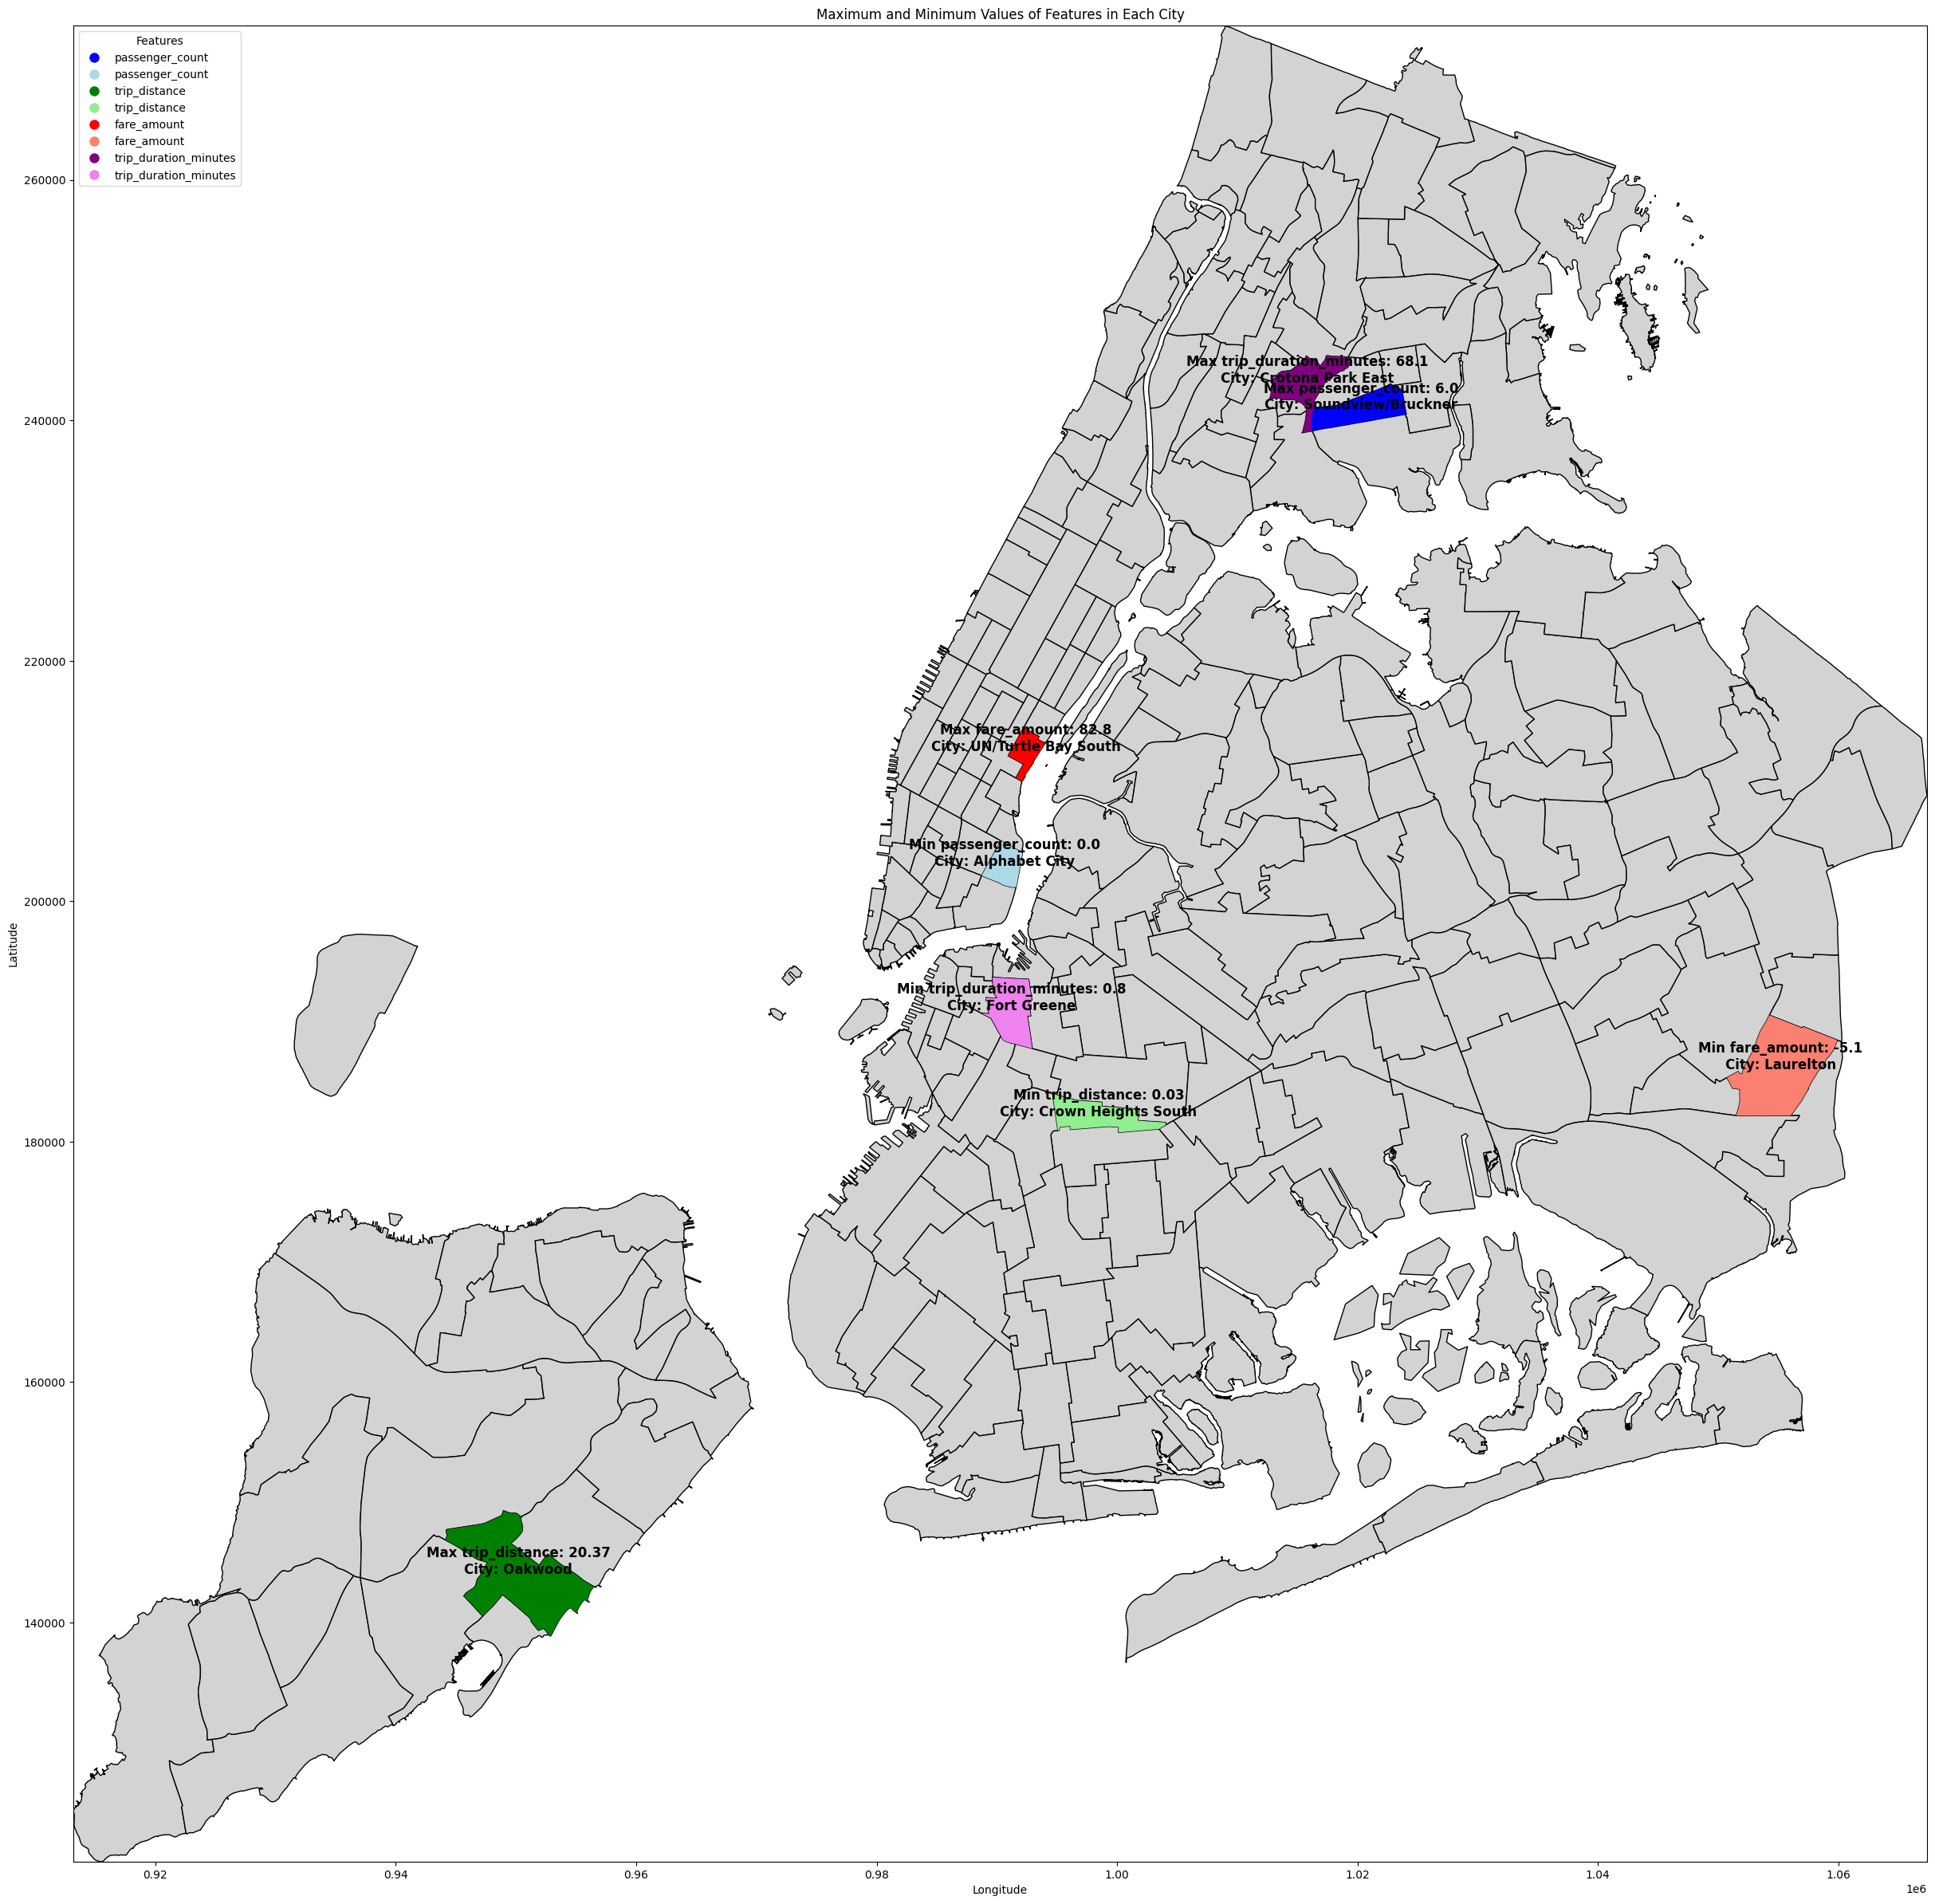

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.font_manager as fm


features = ['passenger_count', 'trip_distance', 'fare_amount', 'trip_duration_minutes']

# Initialize a dictionary to store the colors for features
feature_colors = {
    'passenger_count': ['blue', 'lightblue'],
    'trip_distance': ['green', 'lightgreen'],
    'fare_amount': ['red', 'salmon'],
    'trip_duration_minutes': ['purple', 'violet']
}

# Plotting  cities with light grey color other cities other than the unique_features.
ax = map_of_india .plot(figsize=(30, 30), edgecolor='k', color='lightgrey')

# Iterate over each feature and mark its maximum and minimum values on the map
for feature in features:
    max_location_id = min_max_values[feature]['max']['location']
    min_location_id = min_max_values[feature]['min']['location']

    max_city_name = map_of_india [map_of_india ['LocationID'] == max_location_id]['zone'].iloc[0]
    min_city_name = map_of_india [map_of_india ['LocationID'] == min_location_id]['zone'].iloc[0]

    max_value = min_max_values[feature]['max']['value']
    min_value = min_max_values[feature]['min']['value']

    # Get the geometry (centroid) of the city
    max_city_geometry = map_of_india [map_of_india ['LocationID'] == max_location_id]['geometry'].iloc[0]
    min_city_geometry = map_of_india [map_of_india ['LocationID'] == min_location_id]['geometry'].iloc[0]

    # Plot maximum and minimum values on the map with unique colors
    map_of_india[map_of_india ['LocationID'] == max_location_id].plot(color=feature_colors[feature][0], ax=ax)
    map_of_india [map_of_india ['LocationID'] == min_location_id].plot(color=feature_colors[feature][1], ax=ax)

    # Annotate cities with their respective data using black font color
    plt.text(max_city_geometry.centroid.x, max_city_geometry.centroid.y,
             f"Max {feature}: {max_value}\nCity: {max_city_name}", fontsize=12, ha='center', color='black', fontweight='bold')
    plt.text(min_city_geometry.centroid.x, min_city_geometry.centroid.y,
             f"Min {feature}: {min_value}\nCity: {min_city_name}", fontsize=12, ha='center', color='black', fontweight='bold')

# Set axis limits with padding
ax.set_xlim(map_of_india .total_bounds[0] - 0.1, map_of_india .total_bounds[2] + 0.1)
ax.set_ylim(map_of_india .total_bounds[1] - 0.1, map_of_india .total_bounds[3] + 0.1)

# Setting names for plot title and labels
plt.title('Maximum and Minimum Values of Features in Each City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Creating  legend for feature colors
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'{feature}',
                          markerfacecolor=color, markersize=10) for feature, colors in feature_colors.items() for color in colors]
plt.legend(handles=legend_elements, title='Features', loc='upper left')

# Displaying the result on map
plt.show()




**Passenger Count Analysis:**
The analysis shows that the largest passenger count of 6 was recorded in Soundview/Bruckner, indicating the possibility of group travel or shared transportation. In contrast, Alphabet City had a minimum passenger count of zero, which could indicate empty or solo flights. This finding indicates an opportunity to target specific groups of travelers or execute tactics to boost passenger occupancy.


**Travel Distance Insights:**
Oakwood reported a maximum journey distance of 20.37 miles, indicating long-distance travel, maybe to suburban areas or airports. Crown Heights South, on the other hand, had a minimum journey distance of 0.03 miles, indicating that people traveled short distances within cities. This emphasizes the wide range of trip lengths and the need of accommodating both short and long-distance travelers.

**Fare Amount Analysis:** UN/Turtle Bay South had the highest fare of $82.8, maybe because to greater distances or premium services. In contrast, Laurelton had a negative fare amount, which could indicate data errors or abnormalities. This understanding underscores the importance of rigorous data validation and quality control procedures.

**Observations Regarding Trip Duration:**
Crotona Park East had the greatest trip duration (68.1 minutes), indicating potentially crowded routes or higher travel distances. In contrast, Fort Greene had the smallest journey duration of 0.8 minutes, indicating relatively short excursions or quick transfers. Understanding such variances in journey duration might assist optimize routes and increase overall service efficiency.

**Average Value Overview:**
Each ride had an average of 1 passenger, covered 1.58 miles, cost $10.40, and lasted 8.33 minutes. These average numbers provide a broad picture of the cab trip landscape, shedding light on normal passenger behavior and trip characteristics. Businesses can use these averages to compare their performance and identify areas for development or innovation.


**INSIGHTS RELATED TO CERTAIN CITIES AND THEIR TRAVEL BEHAVIORS FOR IMPROVING ECONOMY.**

1. Encourage group travel in Soundview/Bruckner:
   - Soundview/Bruckner has the most passengers, indicating a possibility for group travel or shared transportation.
   - Launch marketing efforts that promote group discounts or incentives for group bookings in order to encourage more people to travel together.
   - Work with event organizers or tourism attractions to create group packages that will bring more tourists to the area.

2. **Encourage Long-Distance Travel from Oakwood**: - Oakwood has the longest travel distance, showing a preference for long-distance trips.
   - Create infrastructure and services for long-distance travelers, such as express lines or shuttle buses to airports and suburban areas.
   - Partner with travel agents- Work with travel companies and tour operators to promote Oakwood as a starting point for visiting local tourist attractions.

3. **Improve Accessibility in Crown Heights South**: - Crown Heights South has the smallest journey distance, indicating that residents commute short distances inside the city.
   - Expand public transit choices, including last-mile connectivity solutions such as bike-sharing and ride-hailing services, to make it easier for citizens to get around the city.
   - Invest in urban design efforts that promote walkability and lessen the demand for short-distance car usage.

4. **Optimize Fare Pricing for UN/Turtle Bay South**
   - UN/Turtle Bay South has the highest fare, indicating lengthier travel or premium services.
   - Conduct market research to better understand consumer preferences and willingness to pay for various forms of transportation services.
   
5. **Improve Efficiency and Service in Crotona Park East and Fort Greene**: - Crotona Park East has the greatest trip duration, which may indicate congested routes or longer travel distances.
   - Fort Greene has the shortest trip duration, indicating brief excursions or rapid transfers.
   - Conduct route optimization studies to streamline routes, minimize traffic congestion, and boost overall service efficiency.
   - Invest in technology and infrastructure enhancements to improve real-time monitoring and management of transportation services, assuring consistent and timely service delivery.

By applying these tailored tactics based on specific travel behaviors observed in various locations, we may improve transportation services, stimulate economic activity, and contribute to the country's overall economic growth and development.


**ANALYSIS OF TRIPS  BELONGING TO THE DIFFERENT CLUSTERS BY COMPARING THEM USING FEATURES AS-PASSENGER_COUNT', 'TRIP_DISTANCE', 'FARE_AMOUNT',**

<ipython-input-40-7e5c61e35af2>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_df, x='Cluster', y='Average Fare', palette='viridis')
<ipython-input-40-7e5c61e35af2>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_df, x='Cluster', y='Average Distance', palette='viridis')
<ipython-input-40-7e5c61e35af2>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_df, x='Cluster', y='Average Passenger Count', palette='viridis')


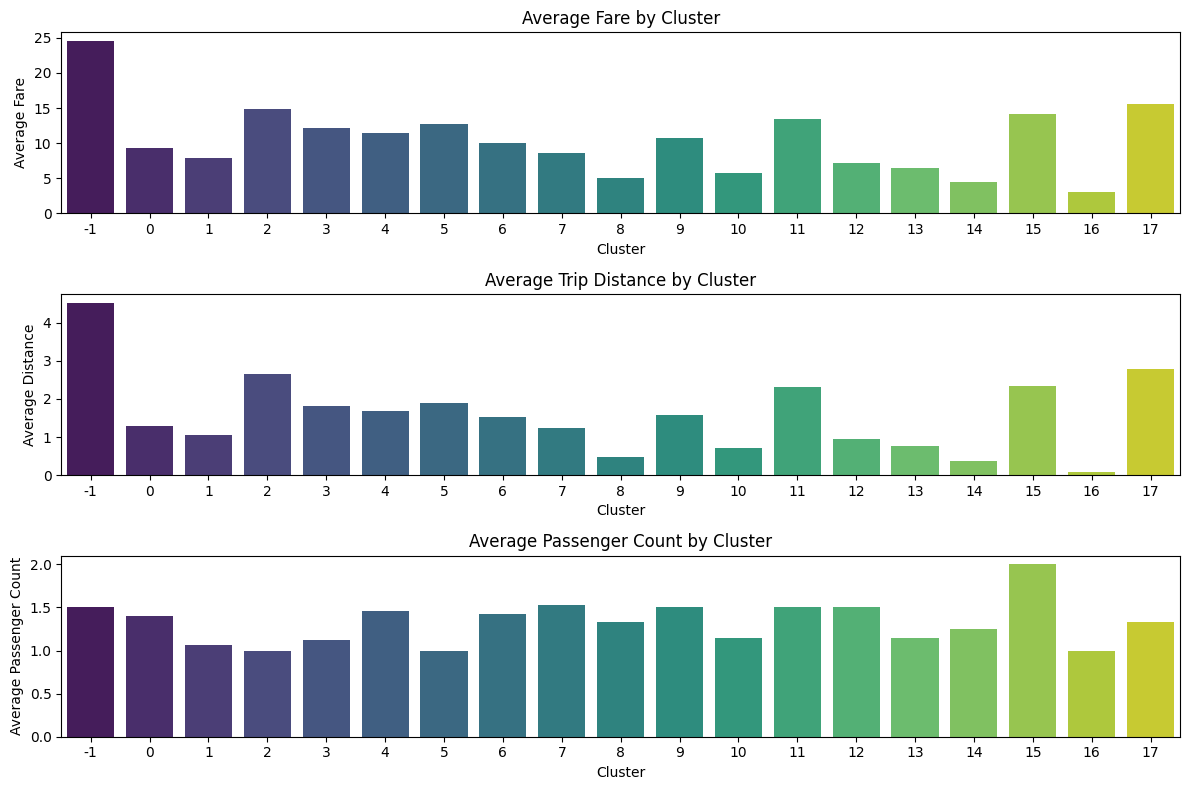

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define function to compute average fare amount, trip distance, and passenger count for each cluster
def compute_metrics(cluster_data):
    avg_fare = cluster_data['fare_amount'].mean()
    avg_distance = cluster_data['trip_distance'].mean()
    avg_passenger_count = cluster_data['passenger_count'].mean()
    return avg_fare, avg_distance, avg_passenger_count

# Initialize lists to store metrics for each cluster
fare_data = []
distance_data = []
passenger_count_data = []

# Compute metrics for each cluster and store in lists
for cluster, location_ids in clusters.items():
    cluster_data = subset_parquet_df_read[subset_parquet_df_read['ULocationID'].isin(location_ids)]
    avg_fare, avg_distance, avg_passenger_count = compute_metrics(cluster_data)
    fare_data.append(avg_fare)
    distance_data.append(avg_distance)
    passenger_count_data.append(avg_passenger_count)

# Create DataFrame for visualization
cluster_df = pd.DataFrame({'Cluster': clusters.keys(), 'Average Fare': fare_data, 'Average Distance': distance_data, 'Average Passenger Count': passenger_count_data})

# Plotting
plt.figure(figsize=(12, 8))

# Plotting Average Fare
plt.subplot(3, 1, 1)
sns.barplot(data=cluster_df, x='Cluster', y='Average Fare', palette='viridis')
plt.title('Average Fare by Cluster')

# Plotting Average Trip Distance
plt.subplot(3, 1, 2)
sns.barplot(data=cluster_df, x='Cluster', y='Average Distance', palette='viridis')
plt.title('Average Trip Distance by Cluster')

# Plotting Average Passenger Count
plt.subplot(3, 1, 3)
sns.barplot(data=cluster_df, x='Cluster', y='Average Passenger Count', palette='viridis')
plt.title('Average Passenger Count by Cluster')

plt.tight_layout()
plt.show()



**PART -3 : Also, divide a day in 1-hour slot and show a time of day based analysis of each cluster**

**IT SHOWS THE NUMBER OF TRIPS MADE IN EACH HOUR OF THE DAY FOR EACH CLUSTER.**

**ROWS:** EACH ROW REPRESENTS AN HOUR OF THE DAY, RANGING FROM 0 TO 23.

**COLUMNS:** EACH COLUMN REPRESENTS A CLUSTER, LABELED FROM 0 TO 17.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
filename = "/content/drive/MyDrive/yellow_tripdata_subset.parquet"
data = pd.read_parquet(filename)

# Define the clusters
clusters = {
  -1: [8.0, 9.0, 10.0, 12.0, 13.0, 14.0, 15.0, 17.0, 18.0, 20.0, 22.0, 25.0, 26.0, 27.0, 31.0, 32.0, 33.0, 34.0, 35.0, 37.0, 38.0, 39.0, 42.0, 43.0, 48.0, 49.0, 53.0, 54.0, 55.0, 57.0, 60.0, 61.0, 62.0, 65.0, 66.0, 67.0, 68.0, 70.0, 71.0, 75.0, 80.0, 82.0, 83.0, 87.0, 89.0, 91.0, 92.0, 93.0, 98.0, 100.0, 107.0, 109.0, 111.0, 112.0, 116.0, 117.0, 121.0, 122.0, 123.0, 124.0, 125.0, 127.0, 129.0, 132.0, 133.0, 134.0, 138.0, 139.0, 142.0, 143.0, 144.0, 145.0, 152.0, 153.0, 157.0, 158.0, 159.0, 160.0, 164.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 183.0, 185.0, 186.0, 193.0, 197.0, 200.0, 201.0, 202.0, 203.0, 211.0, 212.0, 213.0, 214.0, 215.0, 216.0, 220.0, 221.0, 223.0, 224.0, 228.0, 233.0, 235.0, 236.0, 239.0, 240.0, 241.0, 243.0, 245.0, 248.0, 249.0, 250.0, 251.0, 252.0, 254.0, 257.0, 259.0, 263.0, 264.0],
 0: [1.0, 262.0, 21.0, 217.0, 90.0],
1: [2.0, 163.0, 230.0, 40.0, 168.0, 169.0, 77.0, 178.0, 85.0, 246.0, 247.0, 94.0, 58.0, 30.0, 191.0],
 2: [74.0, 3.0],
 3: [195.0, 4.0, 7.0, 79.0, 147.0, 151.0, 218.0, 63.0],
 4: [96.0, 5.0, 102.0, 11.0, 76.0, 210.0, 148.0, 182.0, 24.0, 88.0, 190.0],
 5: [113.0, 150.0, 260.0, 6.0],
 6: [165.0, 205.0, 47.0, 16.0, 244.0, 184.0, 255.0],
 7: [256.0, 258.0, 227.0, 229.0, 106.0, 171.0, 108.0, 19.0, 119.0, 179.0, 86.0, 23.0, 118.0, 154.0, 155.0],
8: [36.0, 140.0, 78.0, 50.0, 188.0, 29.0],
 9: [128.0, 101.0, 135.0, 136.0, 73.0, 41.0, 265.0, 141.0, 238.0, 209.0, 242.0, 180.0],
10: [130.0, 162.0, 261.0, 137.0, 44.0, 46.0, 146.0],
 11: [64.0, 192.0, 28.0, 45.0, 181.0, 56.0, 219.0, 156.0],
 12: [194.0, 231.0, 232.0, 234.0, 187.0, 59.0, 222.0, 95.0],
 13: [225.0, 226.0, 196.0, 69.0, 166.0, 237.0, 206.0, 208.0, 81.0, 114.0, 115.0, 149.0, 189.0, 126.0],
 14: [72.0, 161.0, 207.0, 167.0],
 15: [120.0, 170.0, 253.0, 198.0],
 16: [97.0],
17: [51.0, 52.0, 131.0]
}

# Extract the hour component from the pickup datetime
data['Pickup_hour'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.hour

# Create a DataFrame to store time-of-day analysis for each cluster
cluster_analysis = pd.DataFrame(index=range(24), columns=np.unique(list(clusters.keys())))

# Compute the number of trips in each hour of the day for each cluster
for cluster_label, location_ids in clusters.items():
    cluster_data = data[data['PULocationID'].isin(location_ids)]
    hour_counts = cluster_data['Pickup_hour'].value_counts().sort_index()
    cluster_analysis[cluster_label] = hour_counts

print(cluster_analysis)



     -1    0    1    2    3    4    5    6    7    8    9    10   11   12  \
0   3027  181  249   14  398  187   68    7  159  148  370  265   11  317   
1   2667  141  279   16  422  204   44   30  198  186  433  316   23  272   
2   2189  117  271    8  396  187   55   32  161  173  318  267   28  240   
3   1706  107  313   10  400  183   63   16   96  125  152  194   16  170   
4   1181   98  242   13  263  138   28   10   54   75  102  110    6  108   
5    775   52  133    5   63   44   14    9   30   35   51   59    3   35   
6    945   55  101    9   65   23   18    7   41   31   87   75    3   27   
7   1231   73  139   14   78   24   17    7   44   49  121  104    7   37   
8   1472   79  179    7   80   30   27    4   62   87  162  129    3   52   
9   2065  145  316   13   93   56   27    4   95  155  234  199    7  103   
10  3126  166  467   20  183   60   46    8  131  177  326  288    8  141   
11  3524  204  575   22  177   88   51    6  161  180  384  372   14  217   

<ipython-input-42-c161f364e605>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cluster_label, cluster_hour_counts in cluster_analysis.iteritems():


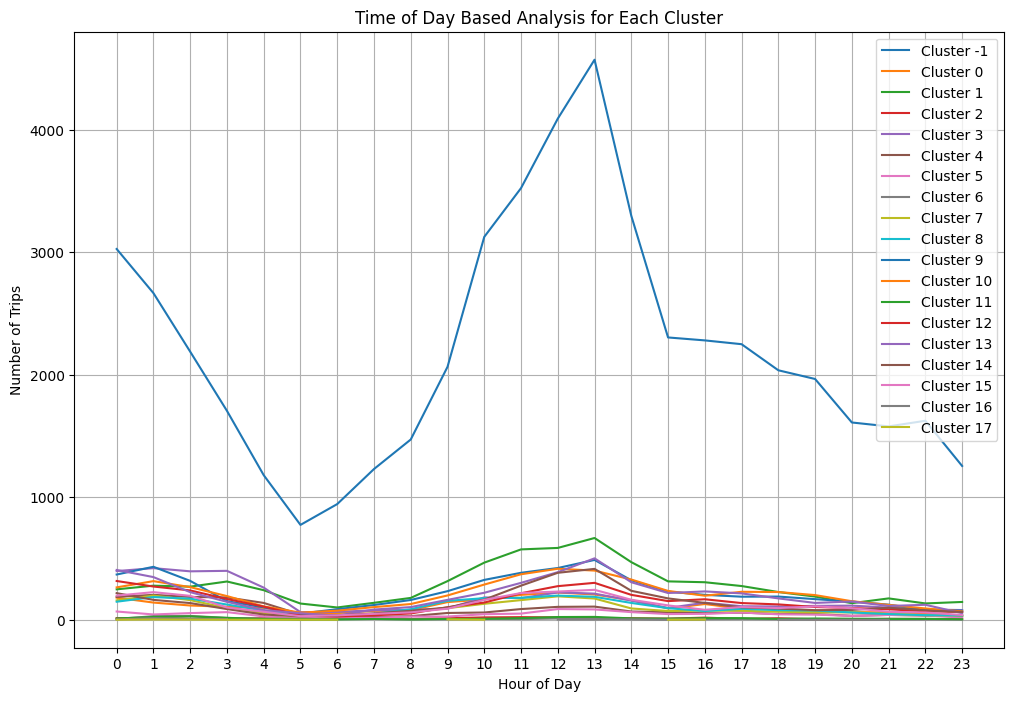

In [42]:
# Plotting
plt.figure(figsize=(12, 8))
for cluster_label, cluster_hour_counts in cluster_analysis.iteritems():
    plt.plot(cluster_hour_counts, label=f'Cluster {cluster_label}')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Time of Day Based Analysis for Each Cluster')
plt.xticks(np.arange(24))
plt.legend()
plt.grid(True)
plt.show()


**OBSERVATION**

In [43]:
import geopandas as gpd

# Load the shapefile
shapefile_path = "/content/drive/MyDrive/taxi_zones/taxi_zones.shp"
taxi_zones = gpd.read_file(shapefile_path)

# Compute the sum of trips for each hour across all clusters
hourly_sum = cluster_analysis.sum(axis=1)

# Find the hour with the maximum number of trips and its corresponding number of trips
max_hour = hourly_sum.idxmax()
max_trips = hourly_sum[max_hour]

# Find the hour with the minimum number of trips and its corresponding number of trips
min_hour = hourly_sum.idxmin()
min_trips = hourly_sum[min_hour]

# Obtain the corresponding city names from the shapefile
max_hour_city = taxi_zones.loc[taxi_zones['LocationID'] == max_hour, 'zone'].values[0]
min_hour_city = taxi_zones.loc[taxi_zones['LocationID'] == min_hour, 'zone'].values[0]

# Print the results
print(f"The hour with the maximum number of trips is {max_hour}, corresponding to {max_hour_city}, with {max_trips} trips.")
print(f"The hour with the minimum number of trips is {min_hour}, corresponding to {min_hour_city}, with {min_trips} trips.")


The hour with the maximum number of trips is 13, corresponding to Battery Park City, with 8625.0 trips.
The hour with the minimum number of trips is 5, corresponding to Arden Heights, with 1422.0 trips.
